### Importando bibliotecas e data base

In [1]:
#!pip install seaborn
#!pip install plotpy

In [2]:
import pandas as pd
import numpy as np
import os

from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PoissonRegressor
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [3]:
path = './dataset/'
print(os.listdir(path))

['field-4.csv', 'field-1.csv', 'field-20.csv', 'field-16.csv', 'field-18.csv', 'test.csv', 'field-24.csv', 'field-7.csv', 'field-26.csv', 'field-6.csv', 'train.csv', 'field-11.csv', 'field-10.csv', 'field-25.csv', 'field-22.csv', 'field-23.csv', 'field-3.csv', 'field-0.csv', 'field-14.csv', 'sample-submission.csv', 'field-21.csv', 'field-2.csv', 'field-5.csv', 'field-15.csv', 'soil_data.csv', 'field-12.csv', 'field-27.csv', 'field-9.csv', 'field-13.csv', 'field-8.csv', 'field-17.csv', 'field-19.csv']


In [4]:
ds_train = pd.read_csv(path+'train.csv')
ds_test = pd.read_csv(path+'test.csv')
ds_all = pd.concat([ds_train, ds_test])

print(ds_train.shape, ds_test.shape, ds_all.shape)
ds_all.head()

(5243, 7) (4110, 6) (9353, 7)


,Id,field,age,type,harvest_year,harvest_month,production
0,0,0,19,5,2004,1,0.064071
1,1,0,19,5,2004,2,0.047658
2,2,0,19,5,2004,3,0.016866
3,3,0,19,5,2004,4,0.025525
4,4,0,19,5,2004,5,0.047690


In [5]:
def to_date(ds):
    return pd.to_datetime((ds.harvest_year*10000+ds.harvest_month*100+1)\
                                  .apply(str),format='%Y%m%d') 
for d in [ds_train, ds_test, ds_all]:
    d['date'] = to_date(d)


In [6]:
field_0_df = pd.read_csv('dataset/field-0.csv')
field_1_df = pd.read_csv('dataset/field-1.csv')
field_2_df = pd.read_csv('dataset/field-2.csv')
field_3_df = pd.read_csv('dataset/field-3.csv')
field_4_df = pd.read_csv('dataset/field-4.csv')
field_5_df = pd.read_csv('dataset/field-5.csv')
field_6_df = pd.read_csv('dataset/field-6.csv')
field_7_df = pd.read_csv('dataset/field-7.csv')
field_8_df = pd.read_csv('dataset/field-8.csv')
field_9_df = pd.read_csv('dataset/field-9.csv')
field_10_df = pd.read_csv('dataset/field-10.csv')
field_11_df = pd.read_csv('dataset/field-11.csv')
field_12_df = pd.read_csv('dataset/field-12.csv')
field_13_df = pd.read_csv('dataset/field-13.csv')
field_14_df = pd.read_csv('dataset/field-14.csv')
field_15_df = pd.read_csv('dataset/field-15.csv')
field_16_df = pd.read_csv('dataset/field-16.csv')
field_17_df = pd.read_csv('dataset/field-17.csv')
field_18_df = pd.read_csv('dataset/field-18.csv')
field_19_df = pd.read_csv('dataset/field-19.csv')
field_20_df = pd.read_csv('dataset/field-20.csv')
field_21_df = pd.read_csv('dataset/field-21.csv')
field_22_df = pd.read_csv('dataset/field-22.csv')
field_23_df = pd.read_csv('dataset/field-23.csv')
field_24_df = pd.read_csv('dataset/field-24.csv')
field_25_df = pd.read_csv('dataset/field-25.csv')
field_26_df = pd.read_csv('dataset/field-26.csv')
field_27_df = pd.read_csv('dataset/field-27.csv')
soil_data_df = pd.read_csv('dataset/soil_data.csv')
pd.set_option('display.max_columns', None)

### Analisando gráficos

<Axes: xlabel='production', ylabel='Density'>

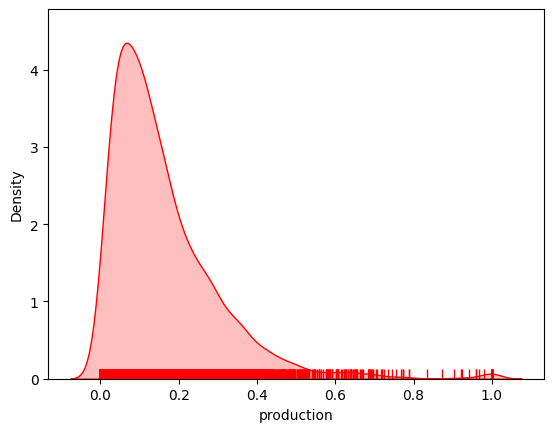

In [7]:
sns.distplot(ds_all.production, hist=False, color="r", rug=True, kde_kws={"shade": True})

In [8]:
print("Mean: ", ds_all.production.mean())

Mean:  0.16145932341328453


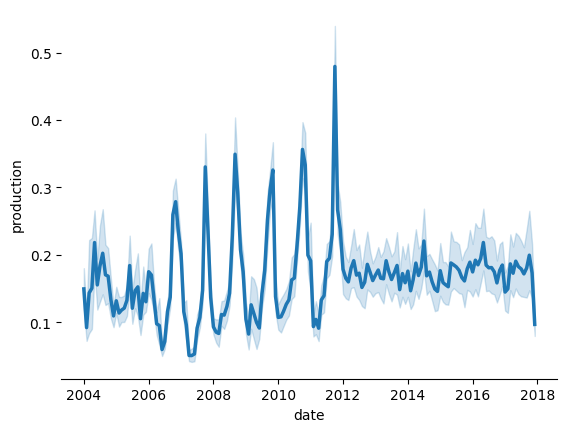

In [9]:
ax = plt.subplot(autoscale_on= True)
sns.lineplot(x='date', y='production', data=ds_all, palette="tab10", linewidth=2.5)

sns.despine(left=True)

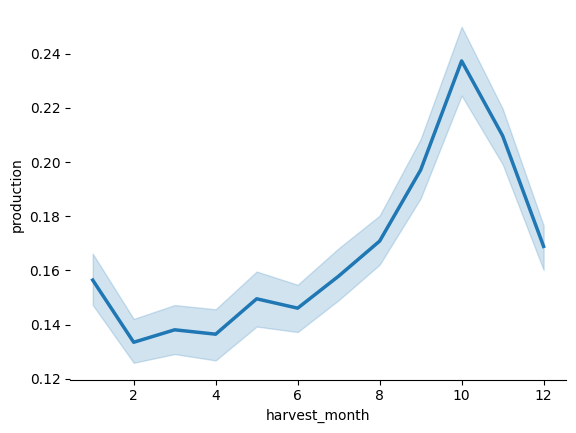

In [10]:
ax = plt.subplot(autoscale_on= True)
sns.lineplot(x='harvest_month', y='production', data=ds_all, palette="tab10", linewidth=2.5)

sns.despine(left=True)

<Axes: xlabel='type', ylabel='production'>

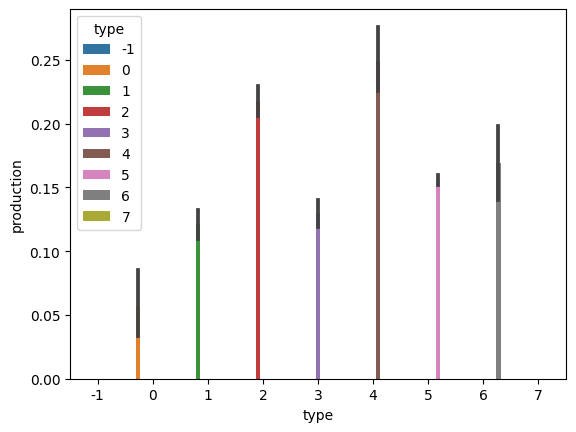

In [11]:
sns.barplot(x='type', y='production', hue='type', data=ds_all)

### Tratando os dados

In [12]:
x_train = ds_train.drop(columns=['production'], axis=1)
y_train = ds_train[['production']]

In [13]:
x_test = ds_test.drop(columns=['Id'], axis=1)

In [14]:
train = ds_train.copy()
train.columns

Index(['Id', 'field', 'age', 'type', 'harvest_year', 'harvest_month',
       'production', 'date'],
      dtype='object')

In [15]:
# train['date'] = train['date'].to_string()

In [16]:
train['day'] = train['date'].apply(lambda x: str(x).split('-')[2])
train['month'] = train['date'].apply(lambda x: str(x).split('-')[1])
train['year'] = train['date'].apply(lambda x: str(x).split('-')[0])

In [17]:
names = ['field', 'age', 'type', 'harvest_year', 'harvest_month', 'production']

train2 = train[names]
inputs = train2.columns[0:]

In [18]:
soil_data_col = soil_data_df.columns

In [19]:
for col in soil_data_df:
    field_0_df[col] = soil_data_df[soil_data_df['field'] == 0][col].values.item()
    field_1_df[col] = soil_data_df[soil_data_df['field'] == 1][col].values.item()
    field_2_df[col] = soil_data_df[soil_data_df['field'] == 2][col].values.item()
    field_3_df[col] = soil_data_df[soil_data_df['field'] == 3][col].values.item()
    field_4_df[col] = soil_data_df[soil_data_df['field'] == 4][col].values.item()
    field_5_df[col] = soil_data_df[soil_data_df['field'] == 5][col].values.item()
    field_6_df[col] = soil_data_df[soil_data_df['field'] == 6][col].values.item()
    field_7_df[col] = soil_data_df[soil_data_df['field'] == 7][col].values.item()
    field_8_df[col] = soil_data_df[soil_data_df['field'] == 8][col].values.item()
    field_9_df[col] = soil_data_df[soil_data_df['field'] == 9][col].values.item()
    field_10_df[col] = soil_data_df[soil_data_df['field'] == 10][col].values.item()
    field_11_df[col] = soil_data_df[soil_data_df['field'] == 11][col].values.item()
    field_12_df[col] = soil_data_df[soil_data_df['field'] == 12][col].values.item()
    field_13_df[col] = soil_data_df[soil_data_df['field'] == 13][col].values.item()
    field_14_df[col] = soil_data_df[soil_data_df['field'] == 14][col].values.item()
    field_15_df[col] = soil_data_df[soil_data_df['field'] == 15][col].values.item()
    field_16_df[col] = soil_data_df[soil_data_df['field'] == 16][col].values.item()
    field_17_df[col] = soil_data_df[soil_data_df['field'] == 17][col].values.item()
    field_18_df[col] = soil_data_df[soil_data_df['field'] == 18][col].values.item()
    field_19_df[col] = soil_data_df[soil_data_df['field'] == 19][col].values.item()
    field_20_df[col] = soil_data_df[soil_data_df['field'] == 20][col].values.item()
    field_21_df[col] = soil_data_df[soil_data_df['field'] == 21][col].values.item()
    field_22_df[col] = soil_data_df[soil_data_df['field'] == 22][col].values.item()
    field_23_df[col] = soil_data_df[soil_data_df['field'] == 23][col].values.item()
    field_24_df[col] = soil_data_df[soil_data_df['field'] == 24][col].values.item()
    field_25_df[col] = soil_data_df[soil_data_df['field'] == 25][col].values.item()
    field_26_df[col] = soil_data_df[soil_data_df['field'] == 26][col].values.item()
    field_27_df[col] = soil_data_df[soil_data_df['field'] == 27][col].values.item()

In [20]:
full_data = pd.concat([field_0_df, field_1_df, field_2_df, field_3_df, field_4_df, field_5_df, field_6_df, field_7_df, field_8_df, field_9_df, field_10_df, field_11_df, field_12_df, field_13_df, field_14_df, field_15_df, field_16_df, field_17_df, field_18_df, field_19_df, field_20_df, field_21_df, field_22_df, field_23_df, field_24_df, field_25_df, field_26_df, field_27_df])

In [21]:
data_test = {'month': [0], 'year': [0], 'temperature': [0], 'dewpoint': [0], 'windspeed': [0], 'Soilwater_L1': [0],
       'Soilwater_L2': [0], 'Soilwater_L3': [0], 'Soilwater_L4': [0], 'Precipitation': [0],
       'field': [0], 'BDRICM_BDRICM_M': [0], 'BDRLOG_BDRLOG_M': [0], 'BDTICM_BDTICM_M': [0],
       'BLDFIE_sl1': [0], 'BLDFIE_sl2': [0], 'BLDFIE_sl3': [0], 'BLDFIE_sl4': [0], 'BLDFIE_sl5': [0],
       'BLDFIE_sl6': [0], 'BLDFIE_sl7': [0], 'CECSOL_sl1': [0], 'CECSOL_sl2': [0], 'CECSOL_sl3': [0],
       'CECSOL_sl4': [0], 'CECSOL_sl5': [0], 'CECSOL_sl6': [0], 'CECSOL_sl7': [0], 'CLYPPT_sl1': [0],
       'CLYPPT_sl2': [0], 'CLYPPT_sl3': [0], 'CLYPPT_sl4': [0], 'CLYPPT_sl5': [0], 'CLYPPT_sl6': [0],
       'CLYPPT_sl7': [0], 'CRFVOL_sl1': [0], 'CRFVOL_sl2': [0], 'CRFVOL_sl3': [0], 'CRFVOL_sl4': [0],
       'CRFVOL_sl5': [0], 'CRFVOL_sl6': [0], 'CRFVOL_sl7': [0], 'OCSTHA_sd1': [0], 'OCSTHA_sd2': [0],
       'OCSTHA_sd3': [0], 'OCSTHA_sd4': [0], 'OCSTHA_sd5': [0], 'OCSTHA_sd6': [0], 'ORCDRC_sl1': [0],
       'ORCDRC_sl2': [0], 'ORCDRC_sl3': [0], 'ORCDRC_sl4': [0], 'ORCDRC_sl5': [0], 'ORCDRC_sl6': [0],
       'ORCDRC_sl7': [0], 'PHIHOX_sl1': [0], 'PHIHOX_sl2': [0], 'PHIHOX_sl3': [0], 'PHIHOX_sl4': [0],
       'PHIHOX_sl5': [0], 'PHIHOX_sl6': [0], 'PHIHOX_sl7': [0], 'PHIKCL_sl1': [0], 'PHIKCL_sl2': [0],
       'PHIKCL_sl3': [0], 'PHIKCL_sl4': [0], 'PHIKCL_sl5': [0], 'PHIKCL_sl6': [0], 'PHIKCL_sl7': [0],
       'SLTPPT_sl1': [0], 'SLTPPT_sl2': [0], 'SLTPPT_sl3': [0], 'SLTPPT_sl4': [0], 'SLTPPT_sl5': [0],
       'SLTPPT_sl6': [0], 'SLTPPT_sl7': [0], 'SNDPPT_sl1': [0], 'SNDPPT_sl2': [0], 'SNDPPT_sl3': [0],
       'SNDPPT_sl4': [0], 'SNDPPT_sl5': [0], 'SNDPPT_sl6': [0], 'SNDPPT_sl7': [0]}

In [22]:
full_data_test = full_data.copy()

In [23]:
#full_data = full_data.drop(full_data[full_data['year']> 2011].index)
#full_data_test = full_data_test.drop(full_data_test[full_data_test['year']< 2012].index)


for col in full_data:
        full_data_test[col] = full_data[full_data['year'] == 2012][col].values.item()
        full_data_test[col] = full_data[full_data['year'] == 2013][col].values.item()
        full_data_test[col] = full_data[full_data['year'] == 2014][col].values.item()
        full_data_test[col] = full_data[full_data['year'] == 2015][col].values.item()
        full_data_test[col] = full_data[full_data['year'] == 2016][col].values.item()
        full_data_test[col] = full_data[full_data['year'] == 2017][col].values.item()

In [24]:
data_all = pd.concat([ds_train, ds_test])

In [25]:
full_train_data = pd.merge(train, full_data, on='field', how='inner')
print(full_train_data.shape)
full_train_data.head()

(1006656, 93)


,Id,field,age,type,harvest_year,harvest_month,production,date,day,month_x,year_x,month_y,year_y,temperature,dewpoint,windspeed,Soilwater_L1,Soilwater_L2,Soilwater_L3,Soilwater_L4,Precipitation,BDRICM_BDRICM_M,BDRLOG_BDRLOG_M,BDTICM_BDTICM_M,BLDFIE_sl1,BLDFIE_sl2,BLDFIE_sl3,BLDFIE_sl4,BLDFIE_sl5,BLDFIE_sl6,BLDFIE_sl7,CECSOL_sl1,CECSOL_sl2,CECSOL_sl3,CECSOL_sl4,CECSOL_sl5,CECSOL_sl6,CECSOL_sl7,CLYPPT_sl1,CLYPPT_sl2,CLYPPT_sl3,CLYPPT_sl4,CLYPPT_sl5,CLYPPT_sl6,CLYPPT_sl7,CRFVOL_sl1,CRFVOL_sl2,CRFVOL_sl3,CRFVOL_sl4,CRFVOL_sl5,CRFVOL_sl6,CRFVOL_sl7,OCSTHA_sd1,OCSTHA_sd2,OCSTHA_sd3,OCSTHA_sd4,OCSTHA_sd5,OCSTHA_sd6,ORCDRC_sl1,ORCDRC_sl2,ORCDRC_sl3,ORCDRC_sl4,ORCDRC_sl5,ORCDRC_sl6,ORCDRC_sl7,PHIHOX_sl1,PHIHOX_sl2,PHIHOX_sl3,PHIHOX_sl4,PHIHOX_sl5,PHIHOX_sl6,PHIHOX_sl7,PHIKCL_sl1,PHIKCL_sl2,PHIKCL_sl3,PHIKCL_sl4,PHIKCL_sl5,PHIKCL_sl6,PHIKCL_sl7,SLTPPT_sl1,SLTPPT_sl2,SLTPPT_sl3,SLTPPT_sl4,SLTPPT_sl5,SLTPPT_sl6,SLTPPT_sl7,SNDPPT_sl1,SNDPPT_sl2,SNDPPT_sl3,SNDPPT_sl4,SNDPPT_sl5,SNDPPT_sl6,SNDPPT_sl7
0,0,0,19,5,2004,1,0.064071,2004-01-01,01 00:00:00,01,2004,1,2002,26.008,24.434,1.8453,0.32984,0.32597,0.31477,0.29513,361.55,200,8,7885,1317,1298,1365,1443,1499,1522,1535,18,17,14,11,10,9,9,31,31,33,38,41,41,41,1,1,1,2,2,2,4,15,31,38,57,64,146,17,24,21,18,14,13,12,47,46,46,47,48,49,51,44,42,42,42,42,43,44,25,23,23,23,22,22,23,44,45,44,39,38,37,36
1,0,0,19,5,2004,1,0.064071,2004-01-01,01 00:00:00,01,2004,2,2002,25.774,24.734,1.9875,0.35884,0.35812,0.35536,0.34368,289.28,200,8,7885,1317,1298,1365,1443,1499,1522,1535,18,17,14,11,10,9,9,31,31,33,38,41,41,41,1,1,1,2,2,2,4,15,31,38,57,64,146,17,24,21,18,14,13,12,47,46,46,47,48,49,51,44,42,42,42,42,43,44,25,23,23,23,22,22,23,44,45,44,39,38,37,36
2,0,0,19,5,2004,1,0.064071,2004-01-01,01 00:00:00,01,2004,3,2002,25.777,24.609,1.7504,0.35886,0.35896,0.35898,0.36199,492.05,200,8,7885,1317,1298,1365,1443,1499,1522,1535,18,17,14,11,10,9,9,31,31,33,38,41,41,41,1,1,1,2,2,2,4,15,31,38,57,64,146,17,24,21,18,14,13,12,47,46,46,47,48,49,51,44,42,42,42,42,43,44,25,23,23,23,22,22,23,44,45,44,39,38,37,36
3,0,0,19,5,2004,1,0.064071,2004-01-01,01 00:00:00,01,2004,4,2002,25.890,24.904,1.4950,0.36013,0.35991,0.35997,0.36043,461.84,200,8,7885,1317,1298,1365,1443,1499,1522,1535,18,17,14,11,10,9,9,31,31,33,38,41,41,41,1,1,1,2,2,2,4,15,31,38,57,64,146,17,24,21,18,14,13,12,47,46,46,47,48,49,51,44,42,42,42,42,43,44,25,23,23,23,22,22,23,44,45,44,39,38,37,36
4,0,0,19,5,2004,1,0.064071,2004-01-01,01 00:00:00,01,2004,5,2002,26.182,24.826,1.8062,0.35567,0.35541,0.35536,0.35894,282.69,200,8,7885,1317,1298,1365,1443,1499,1522,1535,18,17,14,11,10,9,9,31,31,33,38,41,41,41,1,1,1,2,2,2,4,15,31,38,57,64,146,17,24,21,18,14,13,12,47,46,46,47,48,49,51,44,42,42,42,42,43,44,25,23,23,23,22,22,23,44,45,44,39,38,37,36


In [26]:
full_train_data = full_train_data.drop(columns=['date', 'day', 'month_x', 'month_y', 'year_x', 'year_y'])

In [27]:
full_soil_data_df = pd.merge(data_all, soil_data_df, on='field', how='inner')
print(soil_data_df.shape)
full_soil_data_df.head()

(28, 73)


,Id,field,age,type,harvest_year,harvest_month,production,date,BDRICM_BDRICM_M,BDRLOG_BDRLOG_M,BDTICM_BDTICM_M,BLDFIE_sl1,BLDFIE_sl2,BLDFIE_sl3,BLDFIE_sl4,BLDFIE_sl5,BLDFIE_sl6,BLDFIE_sl7,CECSOL_sl1,CECSOL_sl2,CECSOL_sl3,CECSOL_sl4,CECSOL_sl5,CECSOL_sl6,CECSOL_sl7,CLYPPT_sl1,CLYPPT_sl2,CLYPPT_sl3,CLYPPT_sl4,CLYPPT_sl5,CLYPPT_sl6,CLYPPT_sl7,CRFVOL_sl1,CRFVOL_sl2,CRFVOL_sl3,CRFVOL_sl4,CRFVOL_sl5,CRFVOL_sl6,CRFVOL_sl7,OCSTHA_sd1,OCSTHA_sd2,OCSTHA_sd3,OCSTHA_sd4,OCSTHA_sd5,OCSTHA_sd6,ORCDRC_sl1,ORCDRC_sl2,ORCDRC_sl3,ORCDRC_sl4,ORCDRC_sl5,ORCDRC_sl6,ORCDRC_sl7,PHIHOX_sl1,PHIHOX_sl2,PHIHOX_sl3,PHIHOX_sl4,PHIHOX_sl5,PHIHOX_sl6,PHIHOX_sl7,PHIKCL_sl1,PHIKCL_sl2,PHIKCL_sl3,PHIKCL_sl4,PHIKCL_sl5,PHIKCL_sl6,PHIKCL_sl7,SLTPPT_sl1,SLTPPT_sl2,SLTPPT_sl3,SLTPPT_sl4,SLTPPT_sl5,SLTPPT_sl6,SLTPPT_sl7,SNDPPT_sl1,SNDPPT_sl2,SNDPPT_sl3,SNDPPT_sl4,SNDPPT_sl5,SNDPPT_sl6,SNDPPT_sl7
0,0,0,19,5,2004,1,0.064071,2004-01-01,200,8,7885,1317,1298,1365,1443,1499,1522,1535,18,17,14,11,10,9,9,31,31,33,38,41,41,41,1,1,1,2,2,2,4,15,31,38,57,64,146,17,24,21,18,14,13,12,47,46,46,47,48,49,51,44,42,42,42,42,43,44,25,23,23,23,22,22,23,44,45,44,39,38,37,36
1,1,0,19,5,2004,2,0.047658,2004-02-01,200,8,7885,1317,1298,1365,1443,1499,1522,1535,18,17,14,11,10,9,9,31,31,33,38,41,41,41,1,1,1,2,2,2,4,15,31,38,57,64,146,17,24,21,18,14,13,12,47,46,46,47,48,49,51,44,42,42,42,42,43,44,25,23,23,23,22,22,23,44,45,44,39,38,37,36
2,2,0,19,5,2004,3,0.016866,2004-03-01,200,8,7885,1317,1298,1365,1443,1499,1522,1535,18,17,14,11,10,9,9,31,31,33,38,41,41,41,1,1,1,2,2,2,4,15,31,38,57,64,146,17,24,21,18,14,13,12,47,46,46,47,48,49,51,44,42,42,42,42,43,44,25,23,23,23,22,22,23,44,45,44,39,38,37,36
3,3,0,19,5,2004,4,0.025525,2004-04-01,200,8,7885,1317,1298,1365,1443,1499,1522,1535,18,17,14,11,10,9,9,31,31,33,38,41,41,41,1,1,1,2,2,2,4,15,31,38,57,64,146,17,24,21,18,14,13,12,47,46,46,47,48,49,51,44,42,42,42,42,43,44,25,23,23,23,22,22,23,44,45,44,39,38,37,36
4,4,0,19,5,2004,5,0.047690,2004-05-01,200,8,7885,1317,1298,1365,1443,1499,1522,1535,18,17,14,11,10,9,9,31,31,33,38,41,41,41,1,1,1,2,2,2,4,15,31,38,57,64,146,17,24,21,18,14,13,12,47,46,46,47,48,49,51,44,42,42,42,42,43,44,25,23,23,23,22,22,23,44,45,44,39,38,37,36


In [84]:
full_train_data.head()

,Id,field,age,type,harvest_year,harvest_month,production,temperature,dewpoint,windspeed,Soilwater_L1,Soilwater_L2,Soilwater_L3,Soilwater_L4,Precipitation,BDRICM_BDRICM_M,BDRLOG_BDRLOG_M,BDTICM_BDTICM_M,BLDFIE_sl1,BLDFIE_sl2,BLDFIE_sl3,BLDFIE_sl4,BLDFIE_sl5,BLDFIE_sl6,BLDFIE_sl7,CECSOL_sl1,CECSOL_sl2,CECSOL_sl3,CECSOL_sl4,CECSOL_sl5,CECSOL_sl6,CECSOL_sl7,CLYPPT_sl1,CLYPPT_sl2,CLYPPT_sl3,CLYPPT_sl4,CLYPPT_sl5,CLYPPT_sl6,CLYPPT_sl7,CRFVOL_sl1,CRFVOL_sl2,CRFVOL_sl3,CRFVOL_sl4,CRFVOL_sl5,CRFVOL_sl6,CRFVOL_sl7,OCSTHA_sd1,OCSTHA_sd2,OCSTHA_sd3,OCSTHA_sd4,OCSTHA_sd5,OCSTHA_sd6,ORCDRC_sl1,ORCDRC_sl2,ORCDRC_sl3,ORCDRC_sl4,ORCDRC_sl5,ORCDRC_sl6,ORCDRC_sl7,PHIHOX_sl1,PHIHOX_sl2,PHIHOX_sl3,PHIHOX_sl4,PHIHOX_sl5,PHIHOX_sl6,PHIHOX_sl7,PHIKCL_sl1,PHIKCL_sl2,PHIKCL_sl3,PHIKCL_sl4,PHIKCL_sl5,PHIKCL_sl6,PHIKCL_sl7,SLTPPT_sl1,SLTPPT_sl2,SLTPPT_sl3,SLTPPT_sl4,SLTPPT_sl5,SLTPPT_sl6,SLTPPT_sl7,SNDPPT_sl1,SNDPPT_sl2,SNDPPT_sl3,SNDPPT_sl4,SNDPPT_sl5,SNDPPT_sl6,SNDPPT_sl7
0,0,0,19,5,2004,1,0.064071,26.008,24.434,1.8453,0.32984,0.32597,0.31477,0.29513,361.55,200,8,7885,1317,1298,1365,1443,1499,1522,1535,18,17,14,11,10,9,9,31,31,33,38,41,41,41,1,1,1,2,2,2,4,15,31,38,57,64,146,17,24,21,18,14,13,12,47,46,46,47,48,49,51,44,42,42,42,42,43,44,25,23,23,23,22,22,23,44,45,44,39,38,37,36
1,0,0,19,5,2004,1,0.064071,25.774,24.734,1.9875,0.35884,0.35812,0.35536,0.34368,289.28,200,8,7885,1317,1298,1365,1443,1499,1522,1535,18,17,14,11,10,9,9,31,31,33,38,41,41,41,1,1,1,2,2,2,4,15,31,38,57,64,146,17,24,21,18,14,13,12,47,46,46,47,48,49,51,44,42,42,42,42,43,44,25,23,23,23,22,22,23,44,45,44,39,38,37,36
2,0,0,19,5,2004,1,0.064071,25.777,24.609,1.7504,0.35886,0.35896,0.35898,0.36199,492.05,200,8,7885,1317,1298,1365,1443,1499,1522,1535,18,17,14,11,10,9,9,31,31,33,38,41,41,41,1,1,1,2,2,2,4,15,31,38,57,64,146,17,24,21,18,14,13,12,47,46,46,47,48,49,51,44,42,42,42,42,43,44,25,23,23,23,22,22,23,44,45,44,39,38,37,36
3,0,0,19,5,2004,1,0.064071,25.890,24.904,1.4950,0.36013,0.35991,0.35997,0.36043,461.84,200,8,7885,1317,1298,1365,1443,1499,1522,1535,18,17,14,11,10,9,9,31,31,33,38,41,41,41,1,1,1,2,2,2,4,15,31,38,57,64,146,17,24,21,18,14,13,12,47,46,46,47,48,49,51,44,42,42,42,42,43,44,25,23,23,23,22,22,23,44,45,44,39,38,37,36
4,0,0,19,5,2004,1,0.064071,26.182,24.826,1.8062,0.35567,0.35541,0.35536,0.35894,282.69,200,8,7885,1317,1298,1365,1443,1499,1522,1535,18,17,14,11,10,9,9,31,31,33,38,41,41,41,1,1,1,2,2,2,4,15,31,38,57,64,146,17,24,21,18,14,13,12,47,46,46,47,48,49,51,44,42,42,42,42,43,44,25,23,23,23,22,22,23,44,45,44,39,38,37,36


In [28]:
test = ds_test

In [29]:
test['day'] = test['date'].apply(lambda x: str(x).split('-')[2])
test['month'] = test['date'].apply(lambda x: str(x).split('-')[1])
test['year'] = test['date'].apply(lambda x: str(x).split('-')[0])

In [30]:
x = train.drop(columns=['date', 'day'], axis=1)
y = test.drop(columns=['date', 'day'], axis=1)

In [31]:
x['year'] = x['year'].astype('int')
x['month'] = x['month'].astype('int')

In [32]:
x

,Id,field,age,type,harvest_year,harvest_month,production,month,year
0,0,0,19,5,2004,1,0.064071,1,2004
1,1,0,19,5,2004,2,0.047658,2,2004
2,2,0,19,5,2004,3,0.016866,3,2004
3,3,0,19,5,2004,4,0.025525,4,2004
4,4,0,19,5,2004,5,0.047690,5,2004
...,...,...,...,...,...,...,...,...,...
5238,5238,9,3,0,2011,8,0.042023,8,2011
5239,5239,9,3,0,2011,9,0.067315,9,2011
5240,5240,9,3,0,2011,10,0.072633,10,2011
5241,5241,9,3,0,2011,11,0.217639,11,2011


In [33]:
    x['year'] = x['year'].replace(2004, 4)
    x['year'] = x['year'].replace(2005, 5)
    x['year'] = x['year'].replace(2006, 6)
    x['year'] = x['year'].replace(2007, 7)
    x['year'] = x['year'].replace(2008, 8)
    x['year'] = x['year'].replace(2009, 9)
    x['year'] = x['year'].replace(2010, 10)
    x['year'] = x['year'].replace(2011, 11)

In [34]:
x = x.drop(columns=['harvest_year', 'harvest_month'])

In [35]:
x_train, y_test= train_test_split(x, test_size=0.2, random_state=5)

In [85]:
full_train_data = full_train_data.dropna()

In [86]:
full_train_data.head()

,Id,field,age,type,harvest_year,harvest_month,production,temperature,dewpoint,windspeed,Soilwater_L1,Soilwater_L2,Soilwater_L3,Soilwater_L4,Precipitation,BDRICM_BDRICM_M,BDRLOG_BDRLOG_M,BDTICM_BDTICM_M,BLDFIE_sl1,BLDFIE_sl2,BLDFIE_sl3,BLDFIE_sl4,BLDFIE_sl5,BLDFIE_sl6,BLDFIE_sl7,CECSOL_sl1,CECSOL_sl2,CECSOL_sl3,CECSOL_sl4,CECSOL_sl5,CECSOL_sl6,CECSOL_sl7,CLYPPT_sl1,CLYPPT_sl2,CLYPPT_sl3,CLYPPT_sl4,CLYPPT_sl5,CLYPPT_sl6,CLYPPT_sl7,CRFVOL_sl1,CRFVOL_sl2,CRFVOL_sl3,CRFVOL_sl4,CRFVOL_sl5,CRFVOL_sl6,CRFVOL_sl7,OCSTHA_sd1,OCSTHA_sd2,OCSTHA_sd3,OCSTHA_sd4,OCSTHA_sd5,OCSTHA_sd6,ORCDRC_sl1,ORCDRC_sl2,ORCDRC_sl3,ORCDRC_sl4,ORCDRC_sl5,ORCDRC_sl6,ORCDRC_sl7,PHIHOX_sl1,PHIHOX_sl2,PHIHOX_sl3,PHIHOX_sl4,PHIHOX_sl5,PHIHOX_sl6,PHIHOX_sl7,PHIKCL_sl1,PHIKCL_sl2,PHIKCL_sl3,PHIKCL_sl4,PHIKCL_sl5,PHIKCL_sl6,PHIKCL_sl7,SLTPPT_sl1,SLTPPT_sl2,SLTPPT_sl3,SLTPPT_sl4,SLTPPT_sl5,SLTPPT_sl6,SLTPPT_sl7,SNDPPT_sl1,SNDPPT_sl2,SNDPPT_sl3,SNDPPT_sl4,SNDPPT_sl5,SNDPPT_sl6,SNDPPT_sl7
0,0,0,19,5,2004,1,0.064071,26.008,24.434,1.8453,0.32984,0.32597,0.31477,0.29513,361.55,200,8,7885,1317,1298,1365,1443,1499,1522,1535,18,17,14,11,10,9,9,31,31,33,38,41,41,41,1,1,1,2,2,2,4,15,31,38,57,64,146,17,24,21,18,14,13,12,47,46,46,47,48,49,51,44,42,42,42,42,43,44,25,23,23,23,22,22,23,44,45,44,39,38,37,36
1,0,0,19,5,2004,1,0.064071,25.774,24.734,1.9875,0.35884,0.35812,0.35536,0.34368,289.28,200,8,7885,1317,1298,1365,1443,1499,1522,1535,18,17,14,11,10,9,9,31,31,33,38,41,41,41,1,1,1,2,2,2,4,15,31,38,57,64,146,17,24,21,18,14,13,12,47,46,46,47,48,49,51,44,42,42,42,42,43,44,25,23,23,23,22,22,23,44,45,44,39,38,37,36
2,0,0,19,5,2004,1,0.064071,25.777,24.609,1.7504,0.35886,0.35896,0.35898,0.36199,492.05,200,8,7885,1317,1298,1365,1443,1499,1522,1535,18,17,14,11,10,9,9,31,31,33,38,41,41,41,1,1,1,2,2,2,4,15,31,38,57,64,146,17,24,21,18,14,13,12,47,46,46,47,48,49,51,44,42,42,42,42,43,44,25,23,23,23,22,22,23,44,45,44,39,38,37,36
3,0,0,19,5,2004,1,0.064071,25.890,24.904,1.4950,0.36013,0.35991,0.35997,0.36043,461.84,200,8,7885,1317,1298,1365,1443,1499,1522,1535,18,17,14,11,10,9,9,31,31,33,38,41,41,41,1,1,1,2,2,2,4,15,31,38,57,64,146,17,24,21,18,14,13,12,47,46,46,47,48,49,51,44,42,42,42,42,43,44,25,23,23,23,22,22,23,44,45,44,39,38,37,36
4,0,0,19,5,2004,1,0.064071,26.182,24.826,1.8062,0.35567,0.35541,0.35536,0.35894,282.69,200,8,7885,1317,1298,1365,1443,1499,1522,1535,18,17,14,11,10,9,9,31,31,33,38,41,41,41,1,1,1,2,2,2,4,15,31,38,57,64,146,17,24,21,18,14,13,12,47,46,46,47,48,49,51,44,42,42,42,42,43,44,25,23,23,23,22,22,23,44,45,44,39,38,37,36


In [87]:
full_train_data['harvest_year'] = full_train_data['harvest_year'].replace(2004, 4)
full_train_data['harvest_year'] = full_train_data['harvest_year'].replace(2005, 5)
full_train_data['harvest_year'] = full_train_data['harvest_year'].replace(2006, 6)
full_train_data['harvest_year'] = full_train_data['harvest_year'].replace(2007, 7)
full_train_data['harvest_year'] = full_train_data['harvest_year'].replace(2008, 8)
full_train_data['harvest_year'] = full_train_data['harvest_year'].replace(2009, 9)
full_train_data['harvest_year'] = full_train_data['harvest_year'].replace(2010, 10)
full_train_data['harvest_year'] = full_train_data['harvest_year'].replace(2011, 11)

In [88]:
x_train, y_test = train_test_split(full_train_data, test_size=0.2, random_state=5)

### Analisando Datasets

In [43]:
ds_all.shape

(9353, 8)

In [44]:
train['harvest_year'].unique()

array([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011])

In [45]:
train['type'].unique()

array([5, 6, 2, 1, 4, 3, 0])

In [46]:
full_data['year'].unique()

array([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017])

In [47]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5243 entries, 0 to 5242
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   field          5243 non-null   int64  
 1   age            5243 non-null   int64  
 2   type           5243 non-null   int64  
 3   harvest_year   5243 non-null   int64  
 4   harvest_month  5243 non-null   int64  
 5   production     5243 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 245.9 KB


In [48]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5376 entries, 0 to 191
Data columns (total 83 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   month            5376 non-null   int64  
 1   year             5376 non-null   int64  
 2   temperature      5376 non-null   float64
 3   dewpoint         5376 non-null   float64
 4   windspeed        5376 non-null   float64
 5   Soilwater_L1     5376 non-null   float64
 6   Soilwater_L2     5376 non-null   float64
 7   Soilwater_L3     5376 non-null   float64
 8   Soilwater_L4     5376 non-null   float64
 9   Precipitation    5376 non-null   float64
 10  field            5376 non-null   int64  
 11  BDRICM_BDRICM_M  5376 non-null   int64  
 12  BDRLOG_BDRLOG_M  5376 non-null   int64  
 13  BDTICM_BDTICM_M  5376 non-null   int64  
 14  BLDFIE_sl1       5376 non-null   int64  
 15  BLDFIE_sl2       5376 non-null   int64  
 16  BLDFIE_sl3       5376 non-null   int64  
 17  BLDFIE_sl4       537

In [49]:
ds_train.head()

,Id,field,age,type,harvest_year,harvest_month,production,date
0,0,0,19,5,2004,1,0.064071,2004-01-01
1,1,0,19,5,2004,2,0.047658,2004-02-01
2,2,0,19,5,2004,3,0.016866,2004-03-01
3,3,0,19,5,2004,4,0.025525,2004-04-01
4,4,0,19,5,2004,5,0.047690,2004-05-01


In [50]:
ds_test

,Id,field,age,type,harvest_year,harvest_month,date,day,month,year
0,5243,0,27,5,2012,1,2012-01-01,01 00:00:00,01,2012
1,5244,0,27,5,2012,2,2012-02-01,01 00:00:00,02,2012
2,5245,0,27,5,2012,3,2012-03-01,01 00:00:00,03,2012
3,5246,0,27,5,2012,4,2012-04-01,01 00:00:00,04,2012
4,5247,0,27,5,2012,5,2012-05-01,01 00:00:00,05,2012
...,...,...,...,...,...,...,...,...,...,...
4105,9348,9,9,0,2017,7,2017-07-01,01 00:00:00,07,2017
4106,9349,9,9,0,2017,8,2017-08-01,01 00:00:00,08,2017
4107,9350,9,9,0,2017,9,2017-09-01,01 00:00:00,09,2017
4108,9351,9,9,0,2017,10,2017-10-01,01 00:00:00,10,2017


In [51]:
x_train

,Id,harvest_month,age,harvest_year,production,BLDFIE_sl7,CECSOL_sl2,BLDFIE_sl6,CECSOL_sl1,CECSOL_sl3,CECSOL_sl7,CECSOL_sl6,CECSOL_sl4,BLDFIE_sl4,OCSTHA_sd2,ORCDRC_sl7,field,BLDFIE_sl5,OCSTHA_sd3,OCSTHA_sd6,OCSTHA_sd5,BDRLOG_BDRLOG_M,ORCDRC_sl6,SLTPPT_sl7,CECSOL_sl5,ORCDRC_sl2,SLTPPT_sl3,ORCDRC_sl1,CLYPPT_sl5,PHIKCL_sl3,SLTPPT_sl5,SLTPPT_sl4,PHIHOX_sl4
8965,4160,5,7,2008,0.053130,1506,17,501,17,13,8,8,10,1416,29,13,27,1478,37,129,53,11,13,22,10,24,23,9,38,39,22,23,46
7336,5110,12,8,2009,0.083907,1524,19,511,20,14,10,10,12,1421,30,14,8,1481,35,127,55,9,14,22,11,30,26,15,36,40,23,25,46
4327,969,2,17,2005,0.139329,1505,14,494,15,10,8,8,9,1411,29,12,12,1471,35,117,51,8,12,21,9,29,23,29,40,40,22,22,46
6728,2641,6,7,2008,0.255265,1503,14,491,15,10,7,7,9,1387,28,10,2,1463,34,113,50,7,11,22,8,23,21,14,39,40,21,21,47
7325,5099,1,8,2009,0.039238,1524,19,511,20,14,10,10,12,1421,30,14,8,1481,35,127,55,9,14,22,11,30,26,15,36,40,23,25,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3061,7,6,2007,0.113223,1519,15,512,17,11,7,7,9,1424,26,10,14,1496,33,116,50,9,11,21,8,21,22,7,44,39,20,22,47
3163,4903,2,8,2008,0.100181,1524,16,510,18,13,9,9,11,1438,30,15,7,1497,36,137,60,8,15,22,10,29,24,26,40,41,22,23,46
7229,1874,10,11,2008,0.130755,1524,19,511,20,14,10,10,12,1421,30,14,8,1481,35,127,55,9,14,22,11,30,26,15,36,40,23,25,46
4009,876,5,17,2005,0.264631,1506,15,494,15,11,8,8,9,1405,32,17,11,1472,40,155,65,11,17,22,9,32,24,34,38,42,23,23,46


In [52]:
y_train

,production
0,0.064071
1,0.047658
2,0.016866
3,0.025525
4,0.047690
...,...
5238,0.042023
5239,0.067315
5240,0.072633
5241,0.217639


In [53]:
train.describe()

,Id,field,age,type,harvest_year,harvest_month,production,date
count,5243.000000,5243.000000,5243.000000,5243.000000,5243.000000,5243.000000,5243.000000,5243
mean,2621.000000,10.453748,11.910929,4.620446,2007.644478,6.546634,0.161459,2008-02-08 15:22:00.389090048
min,0.000000,0.000000,3.000000,0.000000,2004.000000,1.000000,0.000000,2004-01-01 00:00:00
25%,1310.500000,4.000000,7.000000,5.000000,2006.000000,4.000000,0.064168,2006-03-01 00:00:00
50%,2621.000000,10.000000,10.000000,5.000000,2008.000000,7.000000,0.122880,2008-02-01 00:00:00
75%,3931.500000,16.000000,18.000000,5.000000,2010.000000,10.000000,0.217869,2010-02-01 00:00:00
max,5242.000000,27.000000,26.000000,6.000000,2011.000000,12.000000,1.000000,2011-12-01 00:00:00
std,1513.668061,7.725394,6.464020,0.991060,2.240641,3.463368,0.140394,NaN


In [54]:
soil_data_df.head()

,field,BDRICM_BDRICM_M,BDRLOG_BDRLOG_M,BDTICM_BDTICM_M,BLDFIE_sl1,BLDFIE_sl2,BLDFIE_sl3,BLDFIE_sl4,BLDFIE_sl5,BLDFIE_sl6,BLDFIE_sl7,CECSOL_sl1,CECSOL_sl2,CECSOL_sl3,CECSOL_sl4,CECSOL_sl5,CECSOL_sl6,CECSOL_sl7,CLYPPT_sl1,CLYPPT_sl2,CLYPPT_sl3,CLYPPT_sl4,CLYPPT_sl5,CLYPPT_sl6,CLYPPT_sl7,CRFVOL_sl1,CRFVOL_sl2,CRFVOL_sl3,CRFVOL_sl4,CRFVOL_sl5,CRFVOL_sl6,CRFVOL_sl7,OCSTHA_sd1,OCSTHA_sd2,OCSTHA_sd3,OCSTHA_sd4,OCSTHA_sd5,OCSTHA_sd6,ORCDRC_sl1,ORCDRC_sl2,ORCDRC_sl3,ORCDRC_sl4,ORCDRC_sl5,ORCDRC_sl6,ORCDRC_sl7,PHIHOX_sl1,PHIHOX_sl2,PHIHOX_sl3,PHIHOX_sl4,PHIHOX_sl5,PHIHOX_sl6,PHIHOX_sl7,PHIKCL_sl1,PHIKCL_sl2,PHIKCL_sl3,PHIKCL_sl4,PHIKCL_sl5,PHIKCL_sl6,PHIKCL_sl7,SLTPPT_sl1,SLTPPT_sl2,SLTPPT_sl3,SLTPPT_sl4,SLTPPT_sl5,SLTPPT_sl6,SLTPPT_sl7,SNDPPT_sl1,SNDPPT_sl2,SNDPPT_sl3,SNDPPT_sl4,SNDPPT_sl5,SNDPPT_sl6,SNDPPT_sl7
0,4,200,7,6973,1345,1308,1361,1413,1486,1503,1513,15,15,12,10,8,8,8,31,31,32,39,40,40,41,0,1,1,1,1,1,4,15,28,35,55,56,129,19,21,19,19,14,12,12,46,46,46,48,48,49,51,43,41,41,41,41,42,43,22,21,21,20,21,19,20,47,48,47,42,40,40,39
1,3,200,9,7272,1297,1287,1323,1428,1492,1508,1521,17,16,13,11,10,9,9,32,32,35,39,41,41,42,1,1,2,2,2,2,4,17,27,33,50,54,123,30,20,18,17,13,11,11,46,46,46,48,48,49,51,43,40,40,41,41,42,43,24,23,22,22,23,22,22,44,45,43,40,36,37,36
2,2,200,7,7281,1266,1249,1310,1387,1463,1491,1503,15,14,10,9,8,7,7,32,32,34,38,39,40,40,0,0,0,0,0,1,3,13,28,34,47,50,113,14,23,24,16,12,11,10,46,45,45,47,48,48,49,44,40,40,40,40,41,42,22,22,21,21,21,21,22,46,46,45,40,39,39,39
3,1,200,6,7457,1297,1277,1345,1409,1480,1506,1518,16,15,11,9,9,8,8,31,30,32,37,38,39,39,1,1,1,2,1,2,3,14,27,33,45,45,104,17,21,18,15,10,9,9,46,46,46,47,48,48,50,46,42,42,43,43,43,45,23,23,22,21,21,21,21,46,47,46,42,40,40,40
4,7,200,8,6771,1305,1289,1333,1438,1497,1510,1524,18,16,13,11,10,9,9,31,31,32,37,40,40,41,1,1,2,2,1,2,4,16,30,36,56,60,137,26,29,24,21,17,15,15,45,44,44,46,46,47,47,44,41,41,41,41,42,42,25,24,24,23,22,21,22,44,45,44,40,38,38,37


In [55]:
field_0_df.head()

,month,year,temperature,dewpoint,windspeed,Soilwater_L1,Soilwater_L2,Soilwater_L3,Soilwater_L4,Precipitation,field,BDRICM_BDRICM_M,BDRLOG_BDRLOG_M,BDTICM_BDTICM_M,BLDFIE_sl1,BLDFIE_sl2,BLDFIE_sl3,BLDFIE_sl4,BLDFIE_sl5,BLDFIE_sl6,BLDFIE_sl7,CECSOL_sl1,CECSOL_sl2,CECSOL_sl3,CECSOL_sl4,CECSOL_sl5,CECSOL_sl6,CECSOL_sl7,CLYPPT_sl1,CLYPPT_sl2,CLYPPT_sl3,CLYPPT_sl4,CLYPPT_sl5,CLYPPT_sl6,CLYPPT_sl7,CRFVOL_sl1,CRFVOL_sl2,CRFVOL_sl3,CRFVOL_sl4,CRFVOL_sl5,CRFVOL_sl6,CRFVOL_sl7,OCSTHA_sd1,OCSTHA_sd2,OCSTHA_sd3,OCSTHA_sd4,OCSTHA_sd5,OCSTHA_sd6,ORCDRC_sl1,ORCDRC_sl2,ORCDRC_sl3,ORCDRC_sl4,ORCDRC_sl5,ORCDRC_sl6,ORCDRC_sl7,PHIHOX_sl1,PHIHOX_sl2,PHIHOX_sl3,PHIHOX_sl4,PHIHOX_sl5,PHIHOX_sl6,PHIHOX_sl7,PHIKCL_sl1,PHIKCL_sl2,PHIKCL_sl3,PHIKCL_sl4,PHIKCL_sl5,PHIKCL_sl6,PHIKCL_sl7,SLTPPT_sl1,SLTPPT_sl2,SLTPPT_sl3,SLTPPT_sl4,SLTPPT_sl5,SLTPPT_sl6,SLTPPT_sl7,SNDPPT_sl1,SNDPPT_sl2,SNDPPT_sl3,SNDPPT_sl4,SNDPPT_sl5,SNDPPT_sl6,SNDPPT_sl7
0,1,2002,26.008,24.434,1.8453,0.32984,0.32597,0.31477,0.29513,361.55,0,200,8,7885,1317,1298,1365,1443,1499,1522,1535,18,17,14,11,10,9,9,31,31,33,38,41,41,41,1,1,1,2,2,2,4,15,31,38,57,64,146,17,24,21,18,14,13,12,47,46,46,47,48,49,51,44,42,42,42,42,43,44,25,23,23,23,22,22,23,44,45,44,39,38,37,36
1,2,2002,25.774,24.734,1.9875,0.35884,0.35812,0.35536,0.34368,289.28,0,200,8,7885,1317,1298,1365,1443,1499,1522,1535,18,17,14,11,10,9,9,31,31,33,38,41,41,41,1,1,1,2,2,2,4,15,31,38,57,64,146,17,24,21,18,14,13,12,47,46,46,47,48,49,51,44,42,42,42,42,43,44,25,23,23,23,22,22,23,44,45,44,39,38,37,36
2,3,2002,25.777,24.609,1.7504,0.35886,0.35896,0.35898,0.36199,492.05,0,200,8,7885,1317,1298,1365,1443,1499,1522,1535,18,17,14,11,10,9,9,31,31,33,38,41,41,41,1,1,1,2,2,2,4,15,31,38,57,64,146,17,24,21,18,14,13,12,47,46,46,47,48,49,51,44,42,42,42,42,43,44,25,23,23,23,22,22,23,44,45,44,39,38,37,36
3,4,2002,25.890,24.904,1.4950,0.36013,0.35991,0.35997,0.36043,461.84,0,200,8,7885,1317,1298,1365,1443,1499,1522,1535,18,17,14,11,10,9,9,31,31,33,38,41,41,41,1,1,1,2,2,2,4,15,31,38,57,64,146,17,24,21,18,14,13,12,47,46,46,47,48,49,51,44,42,42,42,42,43,44,25,23,23,23,22,22,23,44,45,44,39,38,37,36
4,5,2002,26.182,24.826,1.8062,0.35567,0.35541,0.35536,0.35894,282.69,0,200,8,7885,1317,1298,1365,1443,1499,1522,1535,18,17,14,11,10,9,9,31,31,33,38,41,41,41,1,1,1,2,2,2,4,15,31,38,57,64,146,17,24,21,18,14,13,12,47,46,46,47,48,49,51,44,42,42,42,42,43,44,25,23,23,23,22,22,23,44,45,44,39,38,37,36


In [56]:
full_data.head()

,month,year,temperature,dewpoint,windspeed,Soilwater_L1,Soilwater_L2,Soilwater_L3,Soilwater_L4,Precipitation,field,BDRICM_BDRICM_M,BDRLOG_BDRLOG_M,BDTICM_BDTICM_M,BLDFIE_sl1,BLDFIE_sl2,BLDFIE_sl3,BLDFIE_sl4,BLDFIE_sl5,BLDFIE_sl6,BLDFIE_sl7,CECSOL_sl1,CECSOL_sl2,CECSOL_sl3,CECSOL_sl4,CECSOL_sl5,CECSOL_sl6,CECSOL_sl7,CLYPPT_sl1,CLYPPT_sl2,CLYPPT_sl3,CLYPPT_sl4,CLYPPT_sl5,CLYPPT_sl6,CLYPPT_sl7,CRFVOL_sl1,CRFVOL_sl2,CRFVOL_sl3,CRFVOL_sl4,CRFVOL_sl5,CRFVOL_sl6,CRFVOL_sl7,OCSTHA_sd1,OCSTHA_sd2,OCSTHA_sd3,OCSTHA_sd4,OCSTHA_sd5,OCSTHA_sd6,ORCDRC_sl1,ORCDRC_sl2,ORCDRC_sl3,ORCDRC_sl4,ORCDRC_sl5,ORCDRC_sl6,ORCDRC_sl7,PHIHOX_sl1,PHIHOX_sl2,PHIHOX_sl3,PHIHOX_sl4,PHIHOX_sl5,PHIHOX_sl6,PHIHOX_sl7,PHIKCL_sl1,PHIKCL_sl2,PHIKCL_sl3,PHIKCL_sl4,PHIKCL_sl5,PHIKCL_sl6,PHIKCL_sl7,SLTPPT_sl1,SLTPPT_sl2,SLTPPT_sl3,SLTPPT_sl4,SLTPPT_sl5,SLTPPT_sl6,SLTPPT_sl7,SNDPPT_sl1,SNDPPT_sl2,SNDPPT_sl3,SNDPPT_sl4,SNDPPT_sl5,SNDPPT_sl6,SNDPPT_sl7
0,1,2002,26.008,24.434,1.8453,0.32984,0.32597,0.31477,0.29513,361.55,0,200,8,7885,1317,1298,1365,1443,1499,1522,1535,18,17,14,11,10,9,9,31,31,33,38,41,41,41,1,1,1,2,2,2,4,15,31,38,57,64,146,17,24,21,18,14,13,12,47,46,46,47,48,49,51,44,42,42,42,42,43,44,25,23,23,23,22,22,23,44,45,44,39,38,37,36
1,2,2002,25.774,24.734,1.9875,0.35884,0.35812,0.35536,0.34368,289.28,0,200,8,7885,1317,1298,1365,1443,1499,1522,1535,18,17,14,11,10,9,9,31,31,33,38,41,41,41,1,1,1,2,2,2,4,15,31,38,57,64,146,17,24,21,18,14,13,12,47,46,46,47,48,49,51,44,42,42,42,42,43,44,25,23,23,23,22,22,23,44,45,44,39,38,37,36
2,3,2002,25.777,24.609,1.7504,0.35886,0.35896,0.35898,0.36199,492.05,0,200,8,7885,1317,1298,1365,1443,1499,1522,1535,18,17,14,11,10,9,9,31,31,33,38,41,41,41,1,1,1,2,2,2,4,15,31,38,57,64,146,17,24,21,18,14,13,12,47,46,46,47,48,49,51,44,42,42,42,42,43,44,25,23,23,23,22,22,23,44,45,44,39,38,37,36
3,4,2002,25.890,24.904,1.4950,0.36013,0.35991,0.35997,0.36043,461.84,0,200,8,7885,1317,1298,1365,1443,1499,1522,1535,18,17,14,11,10,9,9,31,31,33,38,41,41,41,1,1,1,2,2,2,4,15,31,38,57,64,146,17,24,21,18,14,13,12,47,46,46,47,48,49,51,44,42,42,42,42,43,44,25,23,23,23,22,22,23,44,45,44,39,38,37,36
4,5,2002,26.182,24.826,1.8062,0.35567,0.35541,0.35536,0.35894,282.69,0,200,8,7885,1317,1298,1365,1443,1499,1522,1535,18,17,14,11,10,9,9,31,31,33,38,41,41,41,1,1,1,2,2,2,4,15,31,38,57,64,146,17,24,21,18,14,13,12,47,46,46,47,48,49,51,44,42,42,42,42,43,44,25,23,23,23,22,22,23,44,45,44,39,38,37,36


In [57]:
full_data_test.head()

,month,year,temperature,dewpoint,windspeed,Soilwater_L1,Soilwater_L2,Soilwater_L3,Soilwater_L4,Precipitation,field,BDRICM_BDRICM_M,BDRLOG_BDRLOG_M,BDTICM_BDTICM_M,BLDFIE_sl1,BLDFIE_sl2,BLDFIE_sl3,BLDFIE_sl4,BLDFIE_sl5,BLDFIE_sl6,BLDFIE_sl7,CECSOL_sl1,CECSOL_sl2,CECSOL_sl3,CECSOL_sl4,CECSOL_sl5,CECSOL_sl6,CECSOL_sl7,CLYPPT_sl1,CLYPPT_sl2,CLYPPT_sl3,CLYPPT_sl4,CLYPPT_sl5,CLYPPT_sl6,CLYPPT_sl7,CRFVOL_sl1,CRFVOL_sl2,CRFVOL_sl3,CRFVOL_sl4,CRFVOL_sl5,CRFVOL_sl6,CRFVOL_sl7,OCSTHA_sd1,OCSTHA_sd2,OCSTHA_sd3,OCSTHA_sd4,OCSTHA_sd5,OCSTHA_sd6,ORCDRC_sl1,ORCDRC_sl2,ORCDRC_sl3,ORCDRC_sl4,ORCDRC_sl5,ORCDRC_sl6,ORCDRC_sl7,PHIHOX_sl1,PHIHOX_sl2,PHIHOX_sl3,PHIHOX_sl4,PHIHOX_sl5,PHIHOX_sl6,PHIHOX_sl7,PHIKCL_sl1,PHIKCL_sl2,PHIKCL_sl3,PHIKCL_sl4,PHIKCL_sl5,PHIKCL_sl6,PHIKCL_sl7,SLTPPT_sl1,SLTPPT_sl2,SLTPPT_sl3,SLTPPT_sl4,SLTPPT_sl5,SLTPPT_sl6,SLTPPT_sl7,SNDPPT_sl1,SNDPPT_sl2,SNDPPT_sl3,SNDPPT_sl4,SNDPPT_sl5,SNDPPT_sl6,SNDPPT_sl7
0,1,2002,26.008,24.434,1.8453,0.32984,0.32597,0.31477,0.29513,361.55,0,200,8,7885,1317,1298,1365,1443,1499,1522,1535,18,17,14,11,10,9,9,31,31,33,38,41,41,41,1,1,1,2,2,2,4,15,31,38,57,64,146,17,24,21,18,14,13,12,47,46,46,47,48,49,51,44,42,42,42,42,43,44,25,23,23,23,22,22,23,44,45,44,39,38,37,36
1,2,2002,25.774,24.734,1.9875,0.35884,0.35812,0.35536,0.34368,289.28,0,200,8,7885,1317,1298,1365,1443,1499,1522,1535,18,17,14,11,10,9,9,31,31,33,38,41,41,41,1,1,1,2,2,2,4,15,31,38,57,64,146,17,24,21,18,14,13,12,47,46,46,47,48,49,51,44,42,42,42,42,43,44,25,23,23,23,22,22,23,44,45,44,39,38,37,36
2,3,2002,25.777,24.609,1.7504,0.35886,0.35896,0.35898,0.36199,492.05,0,200,8,7885,1317,1298,1365,1443,1499,1522,1535,18,17,14,11,10,9,9,31,31,33,38,41,41,41,1,1,1,2,2,2,4,15,31,38,57,64,146,17,24,21,18,14,13,12,47,46,46,47,48,49,51,44,42,42,42,42,43,44,25,23,23,23,22,22,23,44,45,44,39,38,37,36
3,4,2002,25.890,24.904,1.4950,0.36013,0.35991,0.35997,0.36043,461.84,0,200,8,7885,1317,1298,1365,1443,1499,1522,1535,18,17,14,11,10,9,9,31,31,33,38,41,41,41,1,1,1,2,2,2,4,15,31,38,57,64,146,17,24,21,18,14,13,12,47,46,46,47,48,49,51,44,42,42,42,42,43,44,25,23,23,23,22,22,23,44,45,44,39,38,37,36
4,5,2002,26.182,24.826,1.8062,0.35567,0.35541,0.35536,0.35894,282.69,0,200,8,7885,1317,1298,1365,1443,1499,1522,1535,18,17,14,11,10,9,9,31,31,33,38,41,41,41,1,1,1,2,2,2,4,15,31,38,57,64,146,17,24,21,18,14,13,12,47,46,46,47,48,49,51,44,42,42,42,42,43,44,25,23,23,23,22,22,23,44,45,44,39,38,37,36


In [58]:
soil_data_df.head()

,field,BDRICM_BDRICM_M,BDRLOG_BDRLOG_M,BDTICM_BDTICM_M,BLDFIE_sl1,BLDFIE_sl2,BLDFIE_sl3,BLDFIE_sl4,BLDFIE_sl5,BLDFIE_sl6,BLDFIE_sl7,CECSOL_sl1,CECSOL_sl2,CECSOL_sl3,CECSOL_sl4,CECSOL_sl5,CECSOL_sl6,CECSOL_sl7,CLYPPT_sl1,CLYPPT_sl2,CLYPPT_sl3,CLYPPT_sl4,CLYPPT_sl5,CLYPPT_sl6,CLYPPT_sl7,CRFVOL_sl1,CRFVOL_sl2,CRFVOL_sl3,CRFVOL_sl4,CRFVOL_sl5,CRFVOL_sl6,CRFVOL_sl7,OCSTHA_sd1,OCSTHA_sd2,OCSTHA_sd3,OCSTHA_sd4,OCSTHA_sd5,OCSTHA_sd6,ORCDRC_sl1,ORCDRC_sl2,ORCDRC_sl3,ORCDRC_sl4,ORCDRC_sl5,ORCDRC_sl6,ORCDRC_sl7,PHIHOX_sl1,PHIHOX_sl2,PHIHOX_sl3,PHIHOX_sl4,PHIHOX_sl5,PHIHOX_sl6,PHIHOX_sl7,PHIKCL_sl1,PHIKCL_sl2,PHIKCL_sl3,PHIKCL_sl4,PHIKCL_sl5,PHIKCL_sl6,PHIKCL_sl7,SLTPPT_sl1,SLTPPT_sl2,SLTPPT_sl3,SLTPPT_sl4,SLTPPT_sl5,SLTPPT_sl6,SLTPPT_sl7,SNDPPT_sl1,SNDPPT_sl2,SNDPPT_sl3,SNDPPT_sl4,SNDPPT_sl5,SNDPPT_sl6,SNDPPT_sl7
0,4,200,7,6973,1345,1308,1361,1413,1486,1503,1513,15,15,12,10,8,8,8,31,31,32,39,40,40,41,0,1,1,1,1,1,4,15,28,35,55,56,129,19,21,19,19,14,12,12,46,46,46,48,48,49,51,43,41,41,41,41,42,43,22,21,21,20,21,19,20,47,48,47,42,40,40,39
1,3,200,9,7272,1297,1287,1323,1428,1492,1508,1521,17,16,13,11,10,9,9,32,32,35,39,41,41,42,1,1,2,2,2,2,4,17,27,33,50,54,123,30,20,18,17,13,11,11,46,46,46,48,48,49,51,43,40,40,41,41,42,43,24,23,22,22,23,22,22,44,45,43,40,36,37,36
2,2,200,7,7281,1266,1249,1310,1387,1463,1491,1503,15,14,10,9,8,7,7,32,32,34,38,39,40,40,0,0,0,0,0,1,3,13,28,34,47,50,113,14,23,24,16,12,11,10,46,45,45,47,48,48,49,44,40,40,40,40,41,42,22,22,21,21,21,21,22,46,46,45,40,39,39,39
3,1,200,6,7457,1297,1277,1345,1409,1480,1506,1518,16,15,11,9,9,8,8,31,30,32,37,38,39,39,1,1,1,2,1,2,3,14,27,33,45,45,104,17,21,18,15,10,9,9,46,46,46,47,48,48,50,46,42,42,43,43,43,45,23,23,22,21,21,21,21,46,47,46,42,40,40,40
4,7,200,8,6771,1305,1289,1333,1438,1497,1510,1524,18,16,13,11,10,9,9,31,31,32,37,40,40,41,1,1,2,2,1,2,4,16,30,36,56,60,137,26,29,24,21,17,15,15,45,44,44,46,46,47,47,44,41,41,41,41,42,42,25,24,24,23,22,21,22,44,45,44,40,38,38,37


In [59]:
train.head()

,Id,field,age,type,harvest_year,harvest_month,production,date,day,month,year
0,0,0,19,5,2004,1,0.064071,2004-01-01,01 00:00:00,01,2004
1,1,0,19,5,2004,2,0.047658,2004-02-01,01 00:00:00,02,2004
2,2,0,19,5,2004,3,0.016866,2004-03-01,01 00:00:00,03,2004
3,3,0,19,5,2004,4,0.025525,2004-04-01,01 00:00:00,04,2004
4,4,0,19,5,2004,5,0.047690,2004-05-01,01 00:00:00,05,2004


In [60]:
data_all.head()

,Id,field,age,type,harvest_year,harvest_month,production,date
0,0,0,19,5,2004,1,0.064071,2004-01-01
1,1,0,19,5,2004,2,0.047658,2004-02-01
2,2,0,19,5,2004,3,0.016866,2004-03-01
3,3,0,19,5,2004,4,0.025525,2004-04-01
4,4,0,19,5,2004,5,0.047690,2004-05-01


In [61]:
x.head()

,Id,field,age,type,production,month,year
0,0,0,19,5,0.064071,1,4
1,1,0,19,5,0.047658,2,4
2,2,0,19,5,0.016866,3,4
3,3,0,19,5,0.025525,4,4
4,4,0,19,5,0.047690,5,4


In [62]:
train.head()

,Id,field,age,type,harvest_year,harvest_month,production,date,day,month,year
0,0,0,19,5,2004,1,0.064071,2004-01-01,01 00:00:00,01,2004
1,1,0,19,5,2004,2,0.047658,2004-02-01,01 00:00:00,02,2004
2,2,0,19,5,2004,3,0.016866,2004-03-01,01 00:00:00,03,2004
3,3,0,19,5,2004,4,0.025525,2004-04-01,01 00:00:00,04,2004
4,4,0,19,5,2004,5,0.047690,2004-05-01,01 00:00:00,05,2004


In [63]:
test.head()

,Id,field,age,type,harvest_year,harvest_month,date,day,month,year
0,5243,0,27,5,2012,1,2012-01-01,01 00:00:00,01,2012
1,5244,0,27,5,2012,2,2012-02-01,01 00:00:00,02,2012
2,5245,0,27,5,2012,3,2012-03-01,01 00:00:00,03,2012
3,5246,0,27,5,2012,4,2012-04-01,01 00:00:00,04,2012
4,5247,0,27,5,2012,5,2012-05-01,01 00:00:00,05,2012


In [64]:
test.head()

,Id,field,age,type,harvest_year,harvest_month,date,day,month,year
0,5243,0,27,5,2012,1,2012-01-01,01 00:00:00,01,2012
1,5244,0,27,5,2012,2,2012-02-01,01 00:00:00,02,2012
2,5245,0,27,5,2012,3,2012-03-01,01 00:00:00,03,2012
3,5246,0,27,5,2012,4,2012-04-01,01 00:00:00,04,2012
4,5247,0,27,5,2012,5,2012-05-01,01 00:00:00,05,2012


In [65]:
x.head()

,Id,field,age,type,production,month,year
0,0,0,19,5,0.064071,1,4
1,1,0,19,5,0.047658,2,4
2,2,0,19,5,0.016866,3,4
3,3,0,19,5,0.025525,4,4
4,4,0,19,5,0.047690,5,4


In [66]:
y.head()

,Id,field,age,type,harvest_year,harvest_month,month,year
0,5243,0,27,5,2012,1,01,2012
1,5244,0,27,5,2012,2,02,2012
2,5245,0,27,5,2012,3,03,2012
3,5246,0,27,5,2012,4,04,2012
4,5247,0,27,5,2012,5,05,2012


In [67]:
x_train

,Id,harvest_month,age,harvest_year,production,BLDFIE_sl7,CECSOL_sl2,BLDFIE_sl6,CECSOL_sl1,CECSOL_sl3,CECSOL_sl7,CECSOL_sl6,CECSOL_sl4,BLDFIE_sl4,OCSTHA_sd2,ORCDRC_sl7,field,BLDFIE_sl5,OCSTHA_sd3,OCSTHA_sd6,OCSTHA_sd5,BDRLOG_BDRLOG_M,ORCDRC_sl6,SLTPPT_sl7,CECSOL_sl5,ORCDRC_sl2,SLTPPT_sl3,ORCDRC_sl1,CLYPPT_sl5,PHIKCL_sl3,SLTPPT_sl5,SLTPPT_sl4,PHIHOX_sl4
8965,4160,5,7,2008,0.053130,1506,17,501,17,13,8,8,10,1416,29,13,27,1478,37,129,53,11,13,22,10,24,23,9,38,39,22,23,46
7336,5110,12,8,2009,0.083907,1524,19,511,20,14,10,10,12,1421,30,14,8,1481,35,127,55,9,14,22,11,30,26,15,36,40,23,25,46
4327,969,2,17,2005,0.139329,1505,14,494,15,10,8,8,9,1411,29,12,12,1471,35,117,51,8,12,21,9,29,23,29,40,40,22,22,46
6728,2641,6,7,2008,0.255265,1503,14,491,15,10,7,7,9,1387,28,10,2,1463,34,113,50,7,11,22,8,23,21,14,39,40,21,21,47
7325,5099,1,8,2009,0.039238,1524,19,511,20,14,10,10,12,1421,30,14,8,1481,35,127,55,9,14,22,11,30,26,15,36,40,23,25,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3061,7,6,2007,0.113223,1519,15,512,17,11,7,7,9,1424,26,10,14,1496,33,116,50,9,11,21,8,21,22,7,44,39,20,22,47
3163,4903,2,8,2008,0.100181,1524,16,510,18,13,9,9,11,1438,30,15,7,1497,36,137,60,8,15,22,10,29,24,26,40,41,22,23,46
7229,1874,10,11,2008,0.130755,1524,19,511,20,14,10,10,12,1421,30,14,8,1481,35,127,55,9,14,22,11,30,26,15,36,40,23,25,46
4009,876,5,17,2005,0.264631,1506,15,494,15,11,8,8,9,1405,32,17,11,1472,40,155,65,11,17,22,9,32,24,34,38,42,23,23,46


In [68]:
y_test

,Id,harvest_month,age,harvest_year,production,BLDFIE_sl7,CECSOL_sl2,BLDFIE_sl6,CECSOL_sl1,CECSOL_sl3,CECSOL_sl7,CECSOL_sl6,CECSOL_sl4,BLDFIE_sl4,OCSTHA_sd2,ORCDRC_sl7,field,BLDFIE_sl5,OCSTHA_sd3,OCSTHA_sd6,OCSTHA_sd5,BDRLOG_BDRLOG_M,ORCDRC_sl6,SLTPPT_sl7,CECSOL_sl5,ORCDRC_sl2,SLTPPT_sl3,ORCDRC_sl1,CLYPPT_sl5,PHIKCL_sl3,SLTPPT_sl5,SLTPPT_sl4,PHIHOX_sl4
8127,3536,8,4,2005,0.126277,1504,12,497,13,8,7,7,7,1411,24,5,20,1477,26,60,27,7,5,17,7,21,18,0,42,40,16,18,48
444,4287,2,11,2011,0.058571,1535,17,522,18,14,9,9,11,1443,31,12,0,1499,38,146,64,8,13,23,10,24,23,17,41,42,22,23,47
8709,3914,3,8,2009,0.044546,1498,16,490,16,13,8,8,10,1421,31,9,24,1481,34,100,44,11,9,19,9,30,21,22,41,39,20,20,49
4113,2794,10,5,2006,0.193366,1506,15,494,15,11,8,8,9,1405,32,17,11,1472,40,155,65,11,17,22,9,32,24,34,38,42,23,23,46
8066,3525,11,11,2011,0.219231,1503,13,494,14,8,6,6,8,1413,24,8,19,1468,28,89,39,9,9,16,6,20,18,19,43,41,17,17,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2750,496,9,19,2005,0.298103,1515,18,501,18,14,10,10,11,1422,34,16,6,1484,38,147,63,11,16,23,10,29,25,27,38,41,23,24,45
9141,5207,5,9,2010,0.113259,1513,18,500,20,14,9,9,10,1414,31,14,9,1475,36,124,53,8,14,26,10,28,27,15,38,39,25,26,47
4083,950,7,23,2011,0.131800,1506,15,494,15,11,8,8,9,1405,32,17,11,1472,40,155,65,11,17,22,9,32,24,34,38,42,23,23,46
9105,5171,3,6,2007,0.035304,1513,18,500,20,14,9,9,10,1414,31,14,9,1475,36,124,53,8,14,26,10,28,27,15,38,39,25,26,47


In [69]:
full_soil_data_df

,Id,harvest_month,age,harvest_year,production,BLDFIE_sl7,CECSOL_sl2,BLDFIE_sl6,CECSOL_sl1,CECSOL_sl3,CECSOL_sl7,CECSOL_sl6,CECSOL_sl4,BLDFIE_sl4,OCSTHA_sd2,ORCDRC_sl7,field,BLDFIE_sl5,OCSTHA_sd3,OCSTHA_sd6,OCSTHA_sd5,BDRLOG_BDRLOG_M,ORCDRC_sl6,SLTPPT_sl7,CECSOL_sl5,ORCDRC_sl2,SLTPPT_sl3,ORCDRC_sl1,CLYPPT_sl5,PHIKCL_sl3,SLTPPT_sl5,SLTPPT_sl4,PHIHOX_sl4
0,0,1,19,2004,0.064071,1535,17,522,18,14,9,9,11,1443,31,12,0,1499,38,146,64,8,13,23,10,24,23,17,41,42,22,23,47
1,1,2,19,2004,0.047658,1535,17,522,18,14,9,9,11,1443,31,12,0,1499,38,146,64,8,13,23,10,24,23,17,41,42,22,23,47
2,2,3,19,2004,0.016866,1535,17,522,18,14,9,9,11,1443,31,12,0,1499,38,146,64,8,13,23,10,24,23,17,41,42,22,23,47
3,3,4,19,2004,0.025525,1535,17,522,18,14,9,9,11,1443,31,12,0,1499,38,146,64,8,13,23,10,24,23,17,41,42,22,23,47
4,4,5,19,2004,0.047690,1535,17,522,18,14,9,9,11,1443,31,12,0,1499,38,146,64,8,13,23,10,24,23,17,41,42,22,23,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9164,5238,8,3,2011,0.042023,1513,18,500,20,14,9,9,10,1414,31,14,9,1475,36,124,53,8,14,26,10,28,27,15,38,39,25,26,47
9165,5239,9,3,2011,0.067315,1513,18,500,20,14,9,9,10,1414,31,14,9,1475,36,124,53,8,14,26,10,28,27,15,38,39,25,26,47
9166,5240,10,3,2011,0.072633,1513,18,500,20,14,9,9,10,1414,31,14,9,1475,36,124,53,8,14,26,10,28,27,15,38,39,25,26,47
9167,5241,11,3,2011,0.217639,1513,18,500,20,14,9,9,10,1414,31,14,9,1475,36,124,53,8,14,26,10,28,27,15,38,39,25,26,47


In [70]:
full_soil_data_df.corr()['production'].abs().sort_values(ascending=False)[:].index

Index(['production', 'harvest_month', 'age', 'Id', 'harvest_year',
       'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3',
       'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2',
       'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6',
       'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7',
       'CECSOL_sl5', 'ORCDRC_sl2', 'SLTPPT_sl3', 'ORCDRC_sl1', 'CLYPPT_sl5',
       'PHIKCL_sl3', 'SLTPPT_sl5', 'SLTPPT_sl4', 'PHIHOX_sl4'],
      dtype='object')

### Testando uma regressão linear multipla com OLS

In [ ]:
x = full_train_data[['harvest_month', 'age']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.629
Model:                            OLS   Adj. R-squared (uncentered):              0.629
Method:                 Least Squares   F-statistic:                          8.544e+05
Date:                Mon, 29 May 2023   Prob (F-statistic):                        0.00
Time:                        17:07:09   Log-Likelihood:                      6.2335e+05
No. Observations:             1006656   AIC:                                 -1.247e+06
Df Residuals:                 1006654   BIC:                                 -1.247e+06
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
harvest_month     0.0137   2.76e-05    497.363      0.000       0.014       0.014
age               0.0058   1.51e-05    385.294      0.000       0.006       0.006
==============================================================================
Omnibus:                   495110.385   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4537079.016
Skew:                           2.178   Prob(JB):                         0.00
Kurtosis:                      12.444   Cond. No.                         3.45
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.631
Model:                            OLS   Adj. R-squared (uncentered):              0.631
Method:                 Least Squares   F-statistic:                          5.726e+05
Date:                Mon, 29 May 2023   Prob (F-statistic):                        0.00
Time:                        17:07:09   Log-Likelihood:                      6.2501e+05
No. Observations:             1006656   AIC:                                 -1.250e+06
Df Residuals:                 1006653   BIC:                                 -1.250e+06
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
harvest_month     0.0122   3.74e-05    326.905      0.000       0.012       0.012
age               0.0050   2.01e-05    250.806      0.000       0.005       0.005
harvest_year   1.065e-05   1.84e-07     57.778      0.000    1.03e-05     1.1e-05
==============================================================================
Omnibus:                   505263.439   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4634276.513
Skew:                           2.236   Prob(JB):                         0.00
Kurtosis:                      12.513   Cond. No.                         580.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.637
Model:                            OLS   Adj. R-squared (uncentered):              0.637
Method:                 Least Squares   F-statistic:                          4.423e+05
Date:                Mon, 29 May 2023   Prob (F-statistic):                        0.00
Time:                        17:07:10   Log-Likelihood:                      6.3443e+05
No. Observations:             1006656   AIC:                                 -1.269e+06
Df Residuals:                 1006652   BIC:                                 -1.269e+06
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
harvest_month     0.0123   3.71e-05    330.431      0.000       0.012       0.012
age               0.0053   1.99e-05    263.308      0.000       0.005       0.005
harvest_year      0.0010   7.39e-06    139.308      0.000       0.001       0.001
BLDFIE_sl7       -0.0014   9.81e-06   -137.909      0.000      -0.001      -0.001
==============================================================================
Omnibus:                   512819.161   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4871583.498
Skew:                           2.265   Prob(JB):                         0.00
Kurtosis:                      12.778   Cond. No.                         726.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.638
Model:                            OLS   Adj. R-squared (uncentered):              0.638
Method:                 Least Squares   F-statistic:                          3.549e+05
Date:                Mon, 29 May 2023   Prob (F-statistic):                        0.00
Time:                        17:07:11   Log-Likelihood:                      6.3534e+05
No. Observations:             1006656   AIC:                                 -1.271e+06
Df Residuals:                 1006651   BIC:                                 -1.271e+06
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
harvest_month     0.0123   3.71e-05    330.883      0.000       0.012       0.012
age               0.0052      2e-05    259.696      0.000       0.005       0.005
harvest_year      0.0009   7.65e-06    123.587      0.000       0.001       0.001
BLDFIE_sl7       -0.0012   1.04e-05   -115.099      0.000      -0.001      -0.001
CECSOL_sl2       -0.0039   9.08e-05    -42.659      0.000      -0.004      -0.004
==============================================================================
Omnibus:                   507687.118   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4724961.729
Skew:                           2.244   Prob(JB):                         0.00
Kurtosis:                      12.618   Cond. No.                     1.78e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.78e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.639
Model:                            OLS   Adj. R-squared (uncentered):              0.639
Method:                 Least Squares   F-statistic:                          2.968e+05
Date:                Mon, 29 May 2023   Prob (F-statistic):                        0.00
Time:                        17:07:12   Log-Likelihood:                      6.3648e+05
No. Observations:             1006656   AIC:                                 -1.273e+06
Df Residuals:                 1006650   BIC:                                 -1.273e+06
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
harvest_month     0.0123    3.7e-05    331.186      0.000       0.012       0.012
age               0.0053   2.01e-05    263.326      0.000       0.005       0.005
harvest_year      0.0008      8e-06    103.834      0.000       0.001       0.001
BLDFIE_sl7       -0.0037   5.42e-05    -69.041      0.000      -0.004      -0.004
CECSOL_sl2       -0.0023   9.64e-05    -23.996      0.000      -0.003      -0.002
BLDFIE_sl6        0.0027   5.64e-05     47.783      0.000       0.003       0.003
==============================================================================
Omnibus:                   505476.586   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4635963.353
Skew:                           2.237   Prob(JB):                         0.00
Kurtosis:                      12.514   Cond. No.                     2.38e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.639
Model:                            OLS   Adj. R-squared (uncentered):              0.639
Method:                 Least Squares   F-statistic:                          2.548e+05
Date:                Mon, 29 May 2023   Prob (F-statistic):                        0.00
Time:                        17:07:15   Log-Likelihood:                      6.3703e+05
No. Observations:             1006656   AIC:                                 -1.274e+06
Df Residuals:                 1006649   BIC:                                 -1.274e+06
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
harvest_month     0.0123    3.7e-05    331.456      0.000       0.012       0.012
age               0.0053   2.01e-05    264.835      0.000       0.005       0.005
harvest_year      0.0009   8.07e-06    107.410      0.000       0.001       0.001
BLDFIE_sl7       -0.0039   5.45e-05    -72.190      0.000      -0.004      -0.004
CECSOL_sl2       -0.0074      0.000    -40.772      0.000      -0.008      -0.007
BLDFIE_sl6        0.0028   5.66e-05     49.996      0.000       0.003       0.003
CECSOL_sl1        0.0060      0.000     33.073      0.000       0.006       0.006
==============================================================================
Omnibus:                   501376.312   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4518076.128
Skew:                           2.220   Prob(JB):                         0.00
Kurtosis:                      12.381   Cond. No.                     5.64e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.640
Model:                            OLS   Adj. R-squared (uncentered):              0.640
Method:                 Least Squares   F-statistic:                          2.233e+05
Date:                Mon, 29 May 2023   Prob (F-statistic):                        0.00
Time:                        17:07:20   Log-Likelihood:                      6.3756e+05
No. Observations:             1006656   AIC:                                 -1.275e+06
Df Residuals:                 1006648   BIC:                                 -1.275e+06
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
harvest_month     0.0123    3.7e-05    331.831      0.000       0.012       0.012
age               0.0054   2.03e-05    266.693      0.000       0.005       0.005
harvest_year      0.0008   8.12e-06    103.246      0.000       0.001       0.001
BLDFIE_sl7       -0.0040   5.45e-05    -73.208      0.000      -0.004      -0.004
CECSOL_sl2       -0.0014      0.000     -5.205      0.000      -0.002      -0.001
BLDFIE_sl6        0.0029   5.66e-05     51.496      0.000       0.003       0.003
CECSOL_sl1        0.0049      0.000     26.829      0.000       0.005       0.005
CECSOL_sl3       -0.0055      0.000    -32.518      0.000      -0.006      -0.005
==============================================================================
Omnibus:                   497737.692   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4420769.643
Skew:                           2.205   Prob(JB):                         0.00
Kurtosis:                      12.271   Cond. No.                     7.28e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.640
Model:                            OLS   Adj. R-squared (uncentered):              0.640
Method:                 Least Squares   F-statistic:                          1.986e+05
Date:                Mon, 29 May 2023   Prob (F-statistic):                        0.00
Time:                        17:07:22   Log-Likelihood:                      6.3768e+05
No. Observations:             1006656   AIC:                                 -1.275e+06
Df Residuals:                 1006647   BIC:                                 -1.275e+06
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
harvest_month     0.0123    3.7e-05    331.921      0.000       0.012       0.012
age               0.0054   2.04e-05    267.154      0.000       0.005       0.005
harvest_year      0.0008   8.15e-06    104.247      0.000       0.001       0.001
BLDFIE_sl7       -0.0038   5.61e-05    -67.545      0.000      -0.004      -0.004
CECSOL_sl2       -0.0016      0.000     -5.975      0.000      -0.002      -0.001
BLDFIE_sl6        0.0027   5.82e-05     46.378      0.000       0.003       0.003
CECSOL_sl1        0.0051      0.000     27.739      0.000       0.005       0.005
CECSOL_sl3       -0.0039      0.000    -20.051      0.000      -0.004      -0.004
CECSOL_sl7       -0.0035      0.000    -15.558      0.000      -0.004      -0.003
==============================================================================
Omnibus:                   496945.715   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4396317.336
Skew:                           2.202   Prob(JB):                         0.00
Kurtosis:                      12.242   Cond. No.                     7.52e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.52e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.640
Model:                            OLS   Adj. R-squared (uncentered):              0.640
Method:                 Least Squares   F-statistic:                          1.986e+05
Date:                Mon, 29 May 2023   Prob (F-statistic):                        0.00
Time:                        17:07:24   Log-Likelihood:                      6.3768e+05
No. Observations:             1006656   AIC:                                 -1.275e+06
Df Residuals:                 1006647   BIC:                                 -1.275e+06
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
harvest_month     0.0123    3.7e-05    331.921      0.000       0.012       0.012
age               0.0054   2.04e-05    267.154      0.000       0.005       0.005
harvest_year      0.0008   8.15e-06    104.247      0.000       0.001       0.001
BLDFIE_sl7       -0.0038   5.61e-05    -67.545      0.000      -0.004      -0.004
CECSOL_sl2       -0.0016      0.000     -5.975      0.000      -0.002      -0.001
BLDFIE_sl6        0.0027   5.82e-05     46.378      0.000       0.003       0.003
CECSOL_sl1        0.0051      0.000     27.739      0.000       0.005       0.005
CECSOL_sl3       -0.0039      0.000    -20.051      0.000      -0.004      -0.004
CECSOL_sl7       -0.0018      0.000    -15.558      0.000      -0.002      -0.002
CECSOL_sl6       -0.0018      0.000    -15.558      0.000      -0.002      -0.002
==============================================================================
Omnibus:                   496945.715   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4396317.336
Skew:                           2.202   Prob(JB):                         0.00
Kurtosis:                      12.242   Cond. No.                     2.60e+18
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 1.28e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.640
Model:                            OLS   Adj. R-squared (uncentered):              0.640
Method:                 Least Squares   F-statistic:                          1.787e+05
Date:                Mon, 29 May 2023   Prob (F-statistic):                        0.00
Time:                        17:07:26   Log-Likelihood:                      6.3772e+05
No. Observations:             1006656   AIC:                                 -1.275e+06
Df Residuals:                 1006646   BIC:                                 -1.275e+06
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
harvest_month     0.0123    3.7e-05    331.940      0.000       0.012       0.012
age               0.0054   2.04e-05    267.020      0.000       0.005       0.005
harvest_year      0.0009   8.79e-06     99.849      0.000       0.001       0.001
BLDFIE_sl7       -0.0037   5.63e-05    -66.416      0.000      -0.004      -0.004
CECSOL_sl2       -0.0026      0.000     -8.989      0.000      -0.003      -0.002
BLDFIE_sl6        0.0026    5.9e-05     44.360      0.000       0.003       0.003
CECSOL_sl1        0.0061      0.000     28.138      0.000       0.006       0.006
CECSOL_sl3       -0.0028      0.000    -11.779      0.000      -0.003      -0.002
CECSOL_sl7       -0.0012      0.000     -9.317      0.000      -0.001      -0.001
CECSOL_sl6       -0.0012      0.000     -9.317      0.000      -0.001      -0.001
CECSOL_sl4       -0.0025      0.000     -8.522      0.000      -0.003      -0.002
==============================================================================
Omnibus:                   496782.312   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4390850.030
Skew:                           2.201   Prob(JB):                         0.00
Kurtosis:                      12.236   Cond. No.                     7.99e+18
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 1.35e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.641
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                          1.633e+05
Date:                Mon, 29 May 2023   Prob (F-statistic):                        0.00
Time:                        17:07:28   Log-Likelihood:                      6.3928e+05
No. Observations:             1006656   AIC:                                 -1.279e+06
Df Residuals:                 1006645   BIC:                                 -1.278e+06
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
harvest_month     0.0123   3.69e-05    332.839      0.000       0.012       0.012
age               0.0056   2.06e-05    273.011      0.000       0.006       0.006
harvest_year      0.0009    8.8e-06    103.812      0.000       0.001       0.001
BLDFIE_sl7       -0.0030   5.78e-05    -51.737      0.000      -0.003      -0.003
CECSOL_sl2        0.0022      0.000      7.420      0.000       0.002       0.003
BLDFIE_sl6        0.0009   6.62e-05     14.048      0.000       0.001       0.001
CECSOL_sl1        0.0058      0.000     26.711      0.000       0.005       0.006
CECSOL_sl3       -0.0060      0.000    -24.502      0.000      -0.006      -0.006
CECSOL_sl7       -0.0034      0.000    -25.294      0.000      -0.004      -0.003
CECSOL_sl6       -0.0034      0.000    -25.294      0.000      -0.004      -0.003
CECSOL_sl4       -0.0038      0.000    -12.619      0.000      -0.004      -0.003
BLDFIE_sl4        0.0009   1.69e-05     56.048      0.000       0.001       0.001
==============================================================================
Omnibus:                   492064.755   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4279767.212
Skew:                           2.181   Prob(JB):                         0.00
Kurtosis:                      12.111   Cond. No.                     1.00e+19
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 1.06e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.641
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                          1.498e+05
Date:                Mon, 29 May 2023   Prob (F-statistic):                        0.00
Time:                        17:07:30   Log-Likelihood:                      6.3956e+05
No. Observations:             1006656   AIC:                                 -1.279e+06
Df Residuals:                 1006644   BIC:                                 -1.279e+06
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
harvest_month     0.0123   3.69e-05    332.852      0.000       0.012       0.012
age               0.0056   2.06e-05    272.683      0.000       0.006       0.006
harvest_year      0.0010   8.97e-06    106.385      0.000       0.001       0.001
BLDFIE_sl7       -0.0033   5.91e-05    -55.453      0.000      -0.003      -0.003
CECSOL_sl2        0.0001      0.000      0.433      0.665      -0.000       0.001
BLDFIE_sl6        0.0011   6.66e-05     16.733      0.000       0.001       0.001
CECSOL_sl1        0.0072      0.000     32.016      0.000       0.007       0.008
CECSOL_sl3       -0.0063      0.000    -25.856      0.000      -0.007      -0.006
CECSOL_sl7       -0.0034      0.000    -24.690      0.000      -0.004      -0.003
CECSOL_sl6       -0.0034      0.000    -24.690      0.000      -0.004      -0.003
CECSOL_sl4       -0.0042      0.000    -13.984      0.000      -0.005      -0.004
BLDFIE_sl4        0.0010    1.7e-05     57.630      0.000       0.001       0.001
OCSTHA_sd2        0.0016   7.01e-05     23.312      0.000       0.001       0.002
==============================================================================
Omnibus:                   493064.514   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4303008.983
Skew:                           2.185   Prob(JB):                         0.00
Kurtosis:                      12.137   Cond. No.                     1.59e+19
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 4.22e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.642
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                          1.386e+05
Date:                Mon, 29 May 2023   Prob (F-statistic):                        0.00
Time:                        17:07:33   Log-Likelihood:                      6.4021e+05
No. Observations:             1006656   AIC:                                 -1.280e+06
Df Residuals:                 1006643   BIC:                                 -1.280e+06
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
harvest_month     0.0123   3.69e-05    333.093      0.000       0.012       0.012
age               0.0057   2.08e-05    275.262      0.000       0.006       0.006
harvest_year      0.0010   8.98e-06    108.429      0.000       0.001       0.001
BLDFIE_sl7       -0.0024   6.35e-05    -38.104      0.000      -0.003      -0.002
CECSOL_sl2       -0.0033      0.000    -10.273      0.000      -0.004      -0.003
BLDFIE_sl6        0.0004   6.97e-05      5.274      0.000       0.000       0.001
CECSOL_sl1        0.0092      0.000     39.861      0.000       0.009       0.010
CECSOL_sl3       -0.0044      0.000    -17.369      0.000      -0.005      -0.004
CECSOL_sl7       -0.0037      0.000    -27.023      0.000      -0.004      -0.003
CECSOL_sl6       -0.0037      0.000    -27.023      0.000      -0.004      -0.003
CECSOL_sl4       -0.0042      0.000    -14.113      0.000      -0.005      -0.004
BLDFIE_sl4        0.0008   1.76e-05     45.703      0.000       0.001       0.001
OCSTHA_sd2        0.0041   9.68e-05     41.933      0.000       0.004       0.004
ORCDRC_sl7       -0.0027   7.54e-05    -36.299      0.000      -0.003      -0.003
==============================================================================
Omnibus:                   497720.465   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4442081.633
Skew:                           2.203   Prob(JB):                         0.00
Kurtosis:                      12.300   Cond. No.                     3.27e+18
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 9.97e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.642
Model:                            OLS   Adj. R-squared (uncentered):              0.642
Method:                 Least Squares   F-statistic:                          1.289e+05
Date:                Mon, 29 May 2023   Prob (F-statistic):                        0.00
Time:                        17:07:36   Log-Likelihood:                      6.4083e+05
No. Observations:             1006656   AIC:                                 -1.282e+06
Df Residuals:                 1006642   BIC:                                 -1.281e+06
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
harvest_month     0.0123   3.69e-05    333.576      0.000       0.012       0.012
age               0.0056   2.09e-05    269.715      0.000       0.006       0.006
harvest_year      0.0013    1.2e-05    104.404      0.000       0.001       0.001
BLDFIE_sl7       -0.0044   8.42e-05    -51.771      0.000      -0.005      -0.004
CECSOL_sl2        0.0019      0.000      5.419      0.000       0.001       0.003
BLDFIE_sl6        0.0014   7.53e-05     18.221      0.000       0.001       0.002
CECSOL_sl1        0.0091      0.000     39.620      0.000       0.009       0.010
CECSOL_sl3       -0.0079      0.000    -29.238      0.000      -0.008      -0.007
CECSOL_sl7       -0.0032      0.000    -23.491      0.000      -0.003      -0.003
CECSOL_sl6       -0.0032      0.000    -23.491      0.000      -0.003      -0.003
CECSOL_sl4       -0.0069      0.000    -22.448      0.000      -0.008      -0.006
BLDFIE_sl4        0.0014   2.51e-05     57.070      0.000       0.001       0.001
OCSTHA_sd2        0.0029      0.000     28.791      0.000       0.003       0.003
ORCDRC_sl7       -0.0023   7.66e-05    -29.668      0.000      -0.002      -0.002
field            -0.0013   3.81e-05    -35.049      0.000      -0.001      -0.001
==============================================================================
Omnibus:                   496334.890   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4408826.232
Skew:                           2.197   Prob(JB):                         0.00
Kurtosis:                      12.263   Cond. No.                     3.03e+18
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 1.17e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.642
Model:                            OLS   Adj. R-squared (uncentered):              0.642
Method:                 Least Squares   F-statistic:                          1.203e+05
Date:                Mon, 29 May 2023   Prob (F-statistic):                        0.00
Time:                        17:07:38   Log-Likelihood:                      6.4084e+05
No. Observations:             1006656   AIC:                                 -1.282e+06
Df Residuals:                 1006641   BIC:                                 -1.281e+06
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
harvest_month     0.0123   3.69e-05    333.574      0.000       0.012       0.012
age               0.0056    2.1e-05    267.888      0.000       0.006       0.006
harvest_year      0.0012   1.38e-05     87.927      0.000       0.001       0.001
BLDFIE_sl7       -0.0042   8.87e-05    -47.501      0.000      -0.004      -0.004
CECSOL_sl2        0.0023      0.000      6.356      0.000       0.002       0.003
BLDFIE_sl6        0.0011   8.83e-05     12.795      0.000       0.001       0.001
CECSOL_sl1        0.0090      0.000     38.862      0.000       0.009       0.009
CECSOL_sl3       -0.0086      0.000    -28.453      0.000      -0.009      -0.008
CECSOL_sl7       -0.0031      0.000    -22.554      0.000      -0.003      -0.003
CECSOL_sl6       -0.0031      0.000    -22.554      0.000      -0.003      -0.003
CECSOL_sl4       -0.0068      0.000    -22.006      0.000      -0.007      -0.006
BLDFIE_sl4        0.0014   2.63e-05     52.691      0.000       0.001       0.001
OCSTHA_sd2        0.0031      0.000     29.235      0.000       0.003       0.003
ORCDRC_sl7       -0.0024   7.83e-05    -30.113      0.000      -0.003      -0.002
field            -0.0013   3.82e-05    -34.669      0.000      -0.001      -0.001
BLDFIE_sl5        0.0002   3.53e-05      5.260      0.000       0.000       0.000
==============================================================================
Omnibus:                   495916.697   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4397156.664
Skew:                           2.195   Prob(JB):                         0.00
Kurtosis:                      12.250   Cond. No.                     3.88e+18
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 8.57e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.643
Model:                            OLS   Adj. R-squared (uncentered):              0.643
Method:                 Least Squares   F-statistic:                          1.133e+05
Date:                Mon, 29 May 2023   Prob (F-statistic):                        0.00
Time:                        17:07:42   Log-Likelihood:                      6.4239e+05
No. Observations:             1006656   AIC:                                 -1.285e+06
Df Residuals:                 1006640   BIC:                                 -1.285e+06
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
harvest_month     0.0123   3.68e-05    334.133      0.000       0.012       0.012
age               0.0055   2.11e-05    261.243      0.000       0.005       0.006
harvest_year      0.0014   1.41e-05     97.642      0.000       0.001       0.001
BLDFIE_sl7       -0.0050   8.96e-05    -55.446      0.000      -0.005      -0.005
CECSOL_sl2        0.0070      0.000     18.614      0.000       0.006       0.008
BLDFIE_sl6        0.0008   8.84e-05      9.304      0.000       0.001       0.001
CECSOL_sl1        0.0102      0.000     43.773      0.000       0.010       0.011
CECSOL_sl3       -0.0149      0.000    -46.038      0.000      -0.015      -0.014
CECSOL_sl7       -0.0008      0.000     -5.401      0.000      -0.001      -0.000
CECSOL_sl6       -0.0008      0.000     -5.401      0.000      -0.001      -0.000
CECSOL_sl4       -0.0103      0.000    -32.745      0.000      -0.011      -0.010
BLDFIE_sl4        0.0019   2.76e-05     67.366      0.000       0.002       0.002
OCSTHA_sd2       -0.0029      0.000    -19.571      0.000      -0.003      -0.003
ORCDRC_sl7       -0.0056   9.76e-05    -57.560      0.000      -0.006      -0.005
field            -0.0016   3.84e-05    -41.602      0.000      -0.002      -0.002
BLDFIE_sl5        0.0005   3.58e-05     14.779      0.000       0.000       0.001
OCSTHA_sd3        0.0084      0.000     55.777      0.000       0.008       0.009
==============================================================================
Omnibus:                   493558.048   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4332200.289
Skew:                           2.186   Prob(JB):                         0.00
Kurtosis:                      12.175   Cond. No.                     3.40e+18
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 1.12e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.643
Model:                            OLS   Adj. R-squared (uncentered):              0.643
Method:                 Least Squares   F-statistic:                          1.069e+05
Date:                Mon, 29 May 2023   Prob (F-statistic):                        0.00
Time:                        17:07:47   Log-Likelihood:                      6.4297e+05
No. Observations:             1006656   AIC:                                 -1.286e+06
Df Residuals:                 1006639   BIC:                                 -1.286e+06
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
harvest_month     0.0123   3.68e-05    334.451      0.000       0.012       0.012
age               0.0055   2.11e-05    258.437      0.000       0.005       0.005
harvest_year      0.0015   1.44e-05    102.297      0.000       0.001       0.001
BLDFIE_sl7       -0.0051   8.96e-05    -56.525      0.000      -0.005      -0.005
CECSOL_sl2        0.0096      0.000     25.080      0.000       0.009       0.010
BLDFIE_sl6        0.0009   8.83e-05      9.692      0.000       0.001       0.001
CECSOL_sl1        0.0109      0.000     46.768      0.000       0.010       0.011
CECSOL_sl3       -0.0205      0.000    -56.538      0.000      -0.021      -0.020
CECSOL_sl7        0.0030      0.000     16.401      0.000       0.003       0.003
CECSOL_sl6        0.0030      0.000     16.401      0.000       0.003       0.003
CECSOL_sl4       -0.0140      0.000    -42.113      0.000      -0.015      -0.013
BLDFIE_sl4        0.0018   2.76e-05     66.912      0.000       0.002       0.002
OCSTHA_sd2       -0.0004      0.000     -2.177      0.029      -0.001   -3.65e-05
ORCDRC_sl7       -0.0111      0.000    -58.801      0.000      -0.012      -0.011
field            -0.0012   4.04e-05    -29.017      0.000      -0.001      -0.001
BLDFIE_sl5        0.0005   3.58e-05     13.378      0.000       0.000       0.001
OCSTHA_sd3        0.0035      0.000     16.640      0.000       0.003       0.004
OCSTHA_sd6        0.0013   3.74e-05     33.979      0.000       0.001       0.001
==============================================================================
Omnibus:                   492017.766   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4290936.402
Skew:                           2.179   Prob(JB):                         0.00
Kurtosis:                      12.127   Cond. No.                     1.37e+19
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 6.9e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.644
Model:                            OLS   Adj. R-squared (uncentered):              0.644
Method:                 Least Squares   F-statistic:                          1.013e+05
Date:                Mon, 29 May 2023   Prob (F-statistic):                        0.00
Time:                        17:07:50   Log-Likelihood:                      6.4408e+05
No. Observations:             1006656   AIC:                                 -1.288e+06
Df Residuals:                 1006638   BIC:                                 -1.288e+06
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
harvest_month     0.0123   3.67e-05    334.846      0.000       0.012       0.012
age               0.0055   2.11e-05    261.109      0.000       0.005       0.006
harvest_year      0.0013   1.46e-05     91.953      0.000       0.001       0.001
BLDFIE_sl7       -0.0055      9e-05    -61.371      0.000      -0.006      -0.005
CECSOL_sl2        0.0164      0.000     40.124      0.000       0.016       0.017
BLDFIE_sl6        0.0011   8.84e-05     12.707      0.000       0.001       0.001
CECSOL_sl1        0.0100      0.000     42.701      0.000       0.010       0.010
CECSOL_sl3       -0.0262      0.000    -68.543      0.000      -0.027      -0.025
CECSOL_sl7        0.0067      0.000     33.903      0.000       0.006       0.007
CECSOL_sl6        0.0067      0.000     33.903      0.000       0.006       0.007
CECSOL_sl4       -0.0189      0.000    -54.123      0.000      -0.020      -0.018
BLDFIE_sl4        0.0014   2.91e-05     48.819      0.000       0.001       0.001
OCSTHA_sd2       -0.0045      0.000    -23.966      0.000      -0.005      -0.004
ORCDRC_sl7       -0.0100      0.000    -52.260      0.000      -0.010      -0.010
field            -0.0006   4.21e-05    -14.198      0.000      -0.001      -0.001
BLDFIE_sl5        0.0012   3.88e-05     30.828      0.000       0.001       0.001
OCSTHA_sd3        0.0081      0.000     35.054      0.000       0.008       0.009
OCSTHA_sd6       -0.0030   9.71e-05    -30.466      0.000      -0.003      -0.003
OCSTHA_sd5        0.0097      0.000     47.180      0.000       0.009       0.010
==============================================================================
Omnibus:                   488114.885   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4172379.955
Skew:                           2.165   Prob(JB):                         0.00
Kurtosis:                      11.985   Cond. No.                     8.77e+18
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 1.68e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.644
Model:                            OLS   Adj. R-squared (uncentered):              0.644
Method:                 Least Squares   F-statistic:                          9.598e+04
Date:                Mon, 29 May 2023   Prob (F-statistic):                        0.00
Time:                        17:07:54   Log-Likelihood:                      6.4418e+05
No. Observations:             1006656   AIC:                                 -1.288e+06
Df Residuals:                 1006637   BIC:                                 -1.288e+06
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.67e-05    334.961      0.000       0.012       0.012
age                 0.0055   2.11e-05    261.242      0.000       0.005       0.006
harvest_year        0.0015   1.78e-05     83.303      0.000       0.001       0.002
BLDFIE_sl7         -0.0061   9.89e-05    -61.720      0.000      -0.006      -0.006
CECSOL_sl2          0.0208      0.001     40.423      0.000       0.020       0.022
BLDFIE_sl6          0.0012   8.85e-05     13.500      0.000       0.001       0.001
CECSOL_sl1          0.0101      0.000     43.385      0.000       0.010       0.011
CECSOL_sl3         -0.0306      0.000    -61.983      0.000      -0.032      -0.030
CECSOL_sl7          0.0072      0.000     35.769      0.000       0.007       0.008
CECSOL_sl6          0.0072      0.000     35.769      0.000       0.007       0.008
CECSOL_sl4         -0.0190      0.000    -54.452      0.000      -0.020      -0.018
BLDFIE_sl4          0.0017   3.59e-05     47.834      0.000       0.002       0.002
OCSTHA_sd2         -0.0046      0.000    -24.185      0.000      -0.005      -0.004
ORCDRC_sl7         -0.0109      0.000    -54.056      0.000      -0.011      -0.010
field              -0.0005   4.26e-05    -12.095      0.000      -0.001      -0.000
BLDFIE_sl5          0.0012   3.89e-05     31.545      0.000       0.001       0.001
OCSTHA_sd3          0.0077      0.000     33.064      0.000       0.007       0.008
OCSTHA_sd6         -0.0027   9.89e-05    -27.295      0.000      -0.003      -0.003
OCSTHA_sd5          0.0098      0.000     47.342      0.000       0.009       0.010
BDRLOG_BDRLOG_M    -0.0027      0.000    -14.151      0.000      -0.003      -0.002
==============================================================================
Omnibus:                   487730.828   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4161380.858
Skew:                           2.163   Prob(JB):                         0.00
Kurtosis:                      11.972   Cond. No.                     3.62e+18
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 9.83e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.645
Model:                            OLS   Adj. R-squared (uncentered):              0.645
Method:                 Least Squares   F-statistic:                          9.158e+04
Date:                Mon, 29 May 2023   Prob (F-statistic):                        0.00
Time:                        17:07:59   Log-Likelihood:                      6.4562e+05
No. Observations:             1006656   AIC:                                 -1.291e+06
Df Residuals:                 1006636   BIC:                                 -1.291e+06
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.67e-05    335.514      0.000       0.012       0.012
age                 0.0055   2.11e-05    261.719      0.000       0.005       0.006
harvest_year        0.0014    1.8e-05     75.001      0.000       0.001       0.001
BLDFIE_sl7         -0.0062   9.88e-05    -62.771      0.000      -0.006      -0.006
CECSOL_sl2          0.0252      0.001     48.329      0.000       0.024       0.026
BLDFIE_sl6          0.0008   8.87e-05      9.332      0.000       0.001       0.001
CECSOL_sl1          0.0081      0.000     34.073      0.000       0.008       0.009
CECSOL_sl3         -0.0312      0.000    -63.121      0.000      -0.032      -0.030
CECSOL_sl7          0.0100      0.000     48.390      0.000       0.010       0.010
CECSOL_sl6          0.0100      0.000     48.390      0.000       0.010       0.010
CECSOL_sl4         -0.0245      0.000    -67.548      0.000      -0.025      -0.024
BLDFIE_sl4          0.0017   3.58e-05     48.515      0.000       0.002       0.002
OCSTHA_sd2         -0.0061      0.000    -31.784      0.000      -0.006      -0.006
ORCDRC_sl7         -0.0303      0.000    -73.166      0.000      -0.031      -0.030
field              -0.0011   4.37e-05    -24.228      0.000      -0.001      -0.001
BLDFIE_sl5          0.0019   4.05e-05     45.709      0.000       0.002       0.002
OCSTHA_sd3          0.0108      0.000     44.928      0.000       0.010       0.011
OCSTHA_sd6         -0.0025   9.88e-05    -25.774      0.000      -0.003      -0.002
OCSTHA_sd5          0.0067      0.000     31.176      0.000       0.006       0.007
BDRLOG_BDRLOG_M    -0.0025      0.000    -13.484      0.000      -0.003      -0.002
ORCDRC_sl6          0.0254      0.000     53.661      0.000       0.024       0.026
==============================================================================
Omnibus:                   482447.940   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4023768.744
Skew:                           2.142   Prob(JB):                         0.00
Kurtosis:                      11.808   Cond. No.                     3.44e+18
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 1.09e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.645
Model:                            OLS   Adj. R-squared (uncentered):              0.645
Method:                 Least Squares   F-statistic:                          8.727e+04
Date:                Mon, 29 May 2023   Prob (F-statistic):                        0.00
Time:                        17:08:03   Log-Likelihood:                      6.4581e+05
No. Observations:             1006656   AIC:                                 -1.292e+06
Df Residuals:                 1006635   BIC:                                 -1.291e+06
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.67e-05    335.525      0.000       0.012       0.012
age                 0.0055   2.11e-05    260.974      0.000       0.005       0.006
harvest_year        0.0013   1.81e-05     72.348      0.000       0.001       0.001
BLDFIE_sl7         -0.0062   9.88e-05    -62.277      0.000      -0.006      -0.006
CECSOL_sl2          0.0281      0.001     51.797      0.000       0.027       0.029
BLDFIE_sl6          0.0007   8.88e-05      8.440      0.000       0.001       0.001
CECSOL_sl1          0.0061      0.000     23.822      0.000       0.006       0.007
CECSOL_sl3         -0.0359      0.001    -65.012      0.000      -0.037      -0.035
CECSOL_sl7          0.0099      0.000     47.631      0.000       0.009       0.010
CECSOL_sl6          0.0099      0.000     47.631      0.000       0.009       0.010
CECSOL_sl4         -0.0216      0.000    -54.975      0.000      -0.022      -0.021
BLDFIE_sl4          0.0017   3.59e-05     47.353      0.000       0.002       0.002
OCSTHA_sd2         -0.0057      0.000    -29.634      0.000      -0.006      -0.005
ORCDRC_sl7         -0.0294      0.000    -70.487      0.000      -0.030      -0.029
field              -0.0005   5.27e-05     -9.322      0.000      -0.001      -0.000
BLDFIE_sl5          0.0020   4.09e-05     47.786      0.000       0.002       0.002
OCSTHA_sd3          0.0088      0.000     33.910      0.000       0.008       0.009
OCSTHA_sd6         -0.0030      0.000    -29.376      0.000      -0.003      -0.003
OCSTHA_sd5          0.0087      0.000     36.473      0.000       0.008       0.009
BDRLOG_BDRLOG_M    -0.0035      0.000    -18.190      0.000      -0.004      -0.003
ORCDRC_sl6          0.0233      0.000     47.854      0.000       0.022       0.024
SLTPPT_sl7          0.0032      0.000     19.192      0.000       0.003       0.003
==============================================================================
Omnibus:                   483402.618   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4039303.896
Skew:                           2.147   Prob(JB):                         0.00
Kurtosis:                      11.824   Cond. No.                     4.18e+18
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 7.38e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7', 'OCSTHA_sd4']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.646
Model:                            OLS   Adj. R-squared (uncentered):              0.646
Method:                 Least Squares   F-statistic:                          8.340e+04
Date:                Mon, 29 May 2023   Prob (F-statistic):                        0.00
Time:                        17:08:08   Log-Likelihood:                      6.4617e+05
No. Observations:             1006656   AIC:                                 -1.292e+06
Df Residuals:                 1006634   BIC:                                 -1.292e+06
Df Model:                          22                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.67e-05    335.684      0.000       0.012       0.012
age                 0.0054   2.12e-05    256.388      0.000       0.005       0.005
harvest_year        0.0016   2.03e-05     76.746      0.000       0.002       0.002
BLDFIE_sl7         -0.0065   9.96e-05    -65.296      0.000      -0.007      -0.006
CECSOL_sl2          0.0176      0.001     26.329      0.000       0.016       0.019
BLDFIE_sl6          0.0019   9.84e-05     19.263      0.000       0.002       0.002
CECSOL_sl1          0.0124      0.000     35.725      0.000       0.012       0.013
CECSOL_sl3         -0.0284      0.001    -45.859      0.000      -0.030      -0.027
CECSOL_sl7          0.0066      0.000     27.697      0.000       0.006       0.007
CECSOL_sl6          0.0066      0.000     27.697      0.000       0.006       0.007
CECSOL_sl4         -0.0225      0.000    -57.045      0.000      -0.023      -0.022
BLDFIE_sl4          0.0021   3.82e-05     53.755      0.000       0.002       0.002
OCSTHA_sd2          0.0006      0.000      1.914      0.056    -1.4e-05       0.001
ORCDRC_sl7         -0.0363      0.000    -74.163      0.000      -0.037      -0.035
field              -0.0007   5.32e-05    -12.962      0.000      -0.001      -0.001
BLDFIE_sl5          0.0005   6.87e-05      6.785      0.000       0.000       0.001
OCSTHA_sd3         -0.0013      0.000     -2.762      0.006      -0.002      -0.000
OCSTHA_sd6      -4.534e-05      0.000     -0.305      0.760      -0.000       0.000
OCSTHA_sd5         -0.0016      0.000     -3.566      0.000      -0.002      -0.001
BDRLOG_BDRLOG_M    -0.0016      0.000     -7.465      0.000      -0.002      -0.001
ORCDRC_sl6          0.0268      0.001     53.165      0.000       0.026       0.028
SLTPPT_sl7          0.0046      0.000     26.401      0.000       0.004       0.005
OCSTHA_sd4          0.0081      0.000     26.925      0.000       0.007       0.009
==============================================================================
Omnibus:                   482490.728   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4014596.010
Skew:                           2.143   Prob(JB):                         0.00
Kurtosis:                      11.794   Cond. No.                     4.13e+18
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 7.55e-25. This might indicate that there are
strong multicollinearity problems or that the design ma

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7', 'CECSOL_sl5']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.646
Model:                            OLS   Adj. R-squared (uncentered):              0.646
Method:                 Least Squares   F-statistic:                          8.348e+04
Date:                Mon, 29 May 2023   Prob (F-statistic):                        0.00
Time:                        17:08:13   Log-Likelihood:                      6.4650e+05
No. Observations:             1006656   AIC:                                 -1.293e+06
Df Residuals:                 1006634   BIC:                                 -1.293e+06
Df Model:                          22                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.67e-05    335.560      0.000       0.012       0.012
age                 0.0055   2.11e-05    261.949      0.000       0.005       0.006
harvest_year        0.0010   1.94e-05     53.991      0.000       0.001       0.001
BLDFIE_sl7         -0.0064    9.9e-05    -64.981      0.000      -0.007      -0.006
CECSOL_sl2          0.0293      0.001     53.853      0.000       0.028       0.030
BLDFIE_sl6          0.0014   9.03e-05     15.328      0.000       0.001       0.002
CECSOL_sl1          0.0052      0.000     20.316      0.000       0.005       0.006
CECSOL_sl3         -0.0409      0.001    -72.010      0.000      -0.042      -0.040
CECSOL_sl7          0.0080      0.000     37.334      0.000       0.008       0.008
CECSOL_sl6          0.0080      0.000     37.334      0.000       0.008       0.008
CECSOL_sl4         -0.0251      0.000    -62.095      0.000      -0.026      -0.024
BLDFIE_sl4          0.0013   3.72e-05     35.775      0.000       0.001       0.001
OCSTHA_sd2         -0.0036      0.000    -18.033      0.000      -0.004      -0.003
ORCDRC_sl7         -0.0275      0.000    -65.440      0.000      -0.028      -0.027
field              -0.0004   5.28e-05     -6.761      0.000      -0.000      -0.000
BLDFIE_sl5          0.0023   4.19e-05     54.897      0.000       0.002       0.002
OCSTHA_sd3          0.0060      0.000     22.200      0.000       0.005       0.007
OCSTHA_sd6         -0.0031      0.000    -30.408      0.000      -0.003      -0.003
OCSTHA_sd5          0.0100      0.000     41.392      0.000       0.010       0.010
BDRLOG_BDRLOG_M    -0.0026      0.000    -13.002      0.000      -0.003      -0.002
ORCDRC_sl6          0.0195      0.000     39.287      0.000       0.019       0.020
SLTPPT_sl7          0.0031      0.000     18.529      0.000       0.003       0.003
CECSOL_sl5          0.0141      0.000     37.401      0.000       0.013       0.015
==============================================================================
Omnibus:                   484943.803   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4074405.425
Skew:                           2.154   Prob(JB):                         0.00
Kurtosis:                      11.865   Cond. No.                     3.96e+18
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 8.23e-25. This might indicate that there are
strong multicollinearity problems or that the design ma

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7', 'CECSOL_sl5', 'ORCDRC_sl2']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.646
Model:                            OLS   Adj. R-squared (uncentered):              0.646
Method:                 Least Squares   F-statistic:                          7.992e+04
Date:                Mon, 29 May 2023   Prob (F-statistic):                        0.00
Time:                        17:08:18   Log-Likelihood:                      6.4679e+05
No. Observations:             1006656   AIC:                                 -1.294e+06
Df Residuals:                 1006633   BIC:                                 -1.293e+06
Df Model:                          23                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.66e-05    335.750      0.000       0.012       0.012
age                 0.0055   2.11e-05    261.379      0.000       0.005       0.006
harvest_year        0.0012   2.06e-05     58.943      0.000       0.001       0.001
BLDFIE_sl7         -0.0062   9.95e-05    -62.269      0.000      -0.006      -0.006
CECSOL_sl2          0.0259      0.001     46.171      0.000       0.025       0.027
BLDFIE_sl6          0.0011   9.09e-05     12.382      0.000       0.001       0.001
CECSOL_sl1          0.0060      0.000     22.961      0.000       0.005       0.006
CECSOL_sl3         -0.0351      0.001    -56.984      0.000      -0.036      -0.034
CECSOL_sl7          0.0085      0.000     39.564      0.000       0.008       0.009
CECSOL_sl6          0.0085      0.000     39.564      0.000       0.008       0.009
CECSOL_sl4         -0.0249      0.000    -61.697      0.000      -0.026      -0.024
BLDFIE_sl4          0.0013   3.72e-05     36.161      0.000       0.001       0.001
OCSTHA_sd2         -0.0069      0.000    -28.529      0.000      -0.007      -0.006
ORCDRC_sl7         -0.0342      0.001    -67.811      0.000      -0.035      -0.033
field              -0.0009   5.82e-05    -16.244      0.000      -0.001      -0.001
BLDFIE_sl5          0.0021   4.25e-05     49.777      0.000       0.002       0.002
OCSTHA_sd3          0.0050      0.000     18.156      0.000       0.004       0.006
OCSTHA_sd6         -0.0012      0.000     -9.824      0.000      -0.001      -0.001
OCSTHA_sd5          0.0066      0.000     23.620      0.000       0.006       0.007
BDRLOG_BDRLOG_M    -0.0016      0.000     -7.761      0.000      -0.002      -0.001
ORCDRC_sl6          0.0221      0.001     43.515      0.000       0.021       0.023
SLTPPT_sl7          0.0023      0.000     13.635      0.000       0.002       0.003
CECSOL_sl5          0.0110      0.000     27.392      0.000       0.010       0.012
ORCDRC_sl2          0.0033      0.000     24.061      0.000       0.003       0.004
==============================================================================
Omnibus:                   485474.148   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4088446.904
Skew:                           2.156   Prob(JB):                         0.00
Kurtosis:                      11.882   Cond. No.                     1.86e+19
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 3.73e-26. This m

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7', 'CECSOL_sl5', 'ORCDRC_sl2', 'PHIHOX_sl7']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.646
Model:                            OLS   Adj. R-squared (uncentered):              0.646
Method:                 Least Squares   F-statistic:                          7.668e+04
Date:                Mon, 29 May 2023   Prob (F-statistic):                        0.00
Time:                        17:08:23   Log-Likelihood:                      6.4717e+05
No. Observations:             1006656   AIC:                                 -1.294e+06
Df Residuals:                 1006632   BIC:                                 -1.294e+06
Df Model:                          24                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.66e-05    335.957      0.000       0.012       0.012
age                 0.0055   2.11e-05    259.010      0.000       0.005       0.006
harvest_year        0.0013   2.11e-05     63.548      0.000       0.001       0.001
BLDFIE_sl7         -0.0055      0.000    -54.247      0.000      -0.006      -0.005
CECSOL_sl2          0.0242      0.001     42.842      0.000       0.023       0.025
BLDFIE_sl6          0.0007   9.23e-05      7.361      0.000       0.000       0.001
CECSOL_sl1          0.0062      0.000     23.872      0.000       0.006       0.007
CECSOL_sl3         -0.0303      0.001    -47.310      0.000      -0.032      -0.029
CECSOL_sl7          0.0077      0.000     35.532      0.000       0.007       0.008
CECSOL_sl6          0.0077      0.000     35.532      0.000       0.007       0.008
CECSOL_sl4         -0.0245      0.000    -60.768      0.000      -0.025      -0.024
BLDFIE_sl4          0.0012   3.76e-05     31.620      0.000       0.001       0.001
OCSTHA_sd2         -0.0077      0.000    -31.512      0.000      -0.008      -0.007
ORCDRC_sl7         -0.0372      0.001    -72.099      0.000      -0.038      -0.036
field              -0.0014   6.09e-05    -23.661      0.000      -0.002      -0.001
BLDFIE_sl5          0.0021   4.25e-05     49.025      0.000       0.002       0.002
OCSTHA_sd3          0.0057      0.000     20.735      0.000       0.005       0.006
OCSTHA_sd6      -6.226e-05      0.000     -0.465      0.642      -0.000       0.000
OCSTHA_sd5          0.0044      0.000     15.257      0.000       0.004       0.005
BDRLOG_BDRLOG_M    -0.0008      0.000     -4.179      0.000      -0.001      -0.000
ORCDRC_sl6          0.0211      0.001     41.320      0.000       0.020       0.022
SLTPPT_sl7          0.0001      0.000      0.601      0.548      -0.000       0.000
CECSOL_sl5          0.0090      0.000     22.210      0.000       0.008       0.010
ORCDRC_sl2          0.0038      0.000     27.782      0.000       0.004       0.004
PHIHOX_sl7         -0.0053      0.000    -27.271      0.000      -0.006      -0.005
==============================================================================
Omnibus:                   486707.215   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4120438.058
Skew:                           2.161   Prob(JB):                         0.00
Kurtosis:                      11.920   Cond. No.                     2.43e+19
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix o

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7', 'CECSOL_sl5', 'ORCDRC_sl2', 'PHIHOX_sl2']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.646
Model:                            OLS   Adj. R-squared (uncentered):              0.646
Method:                 Least Squares   F-statistic:                          7.659e+04
Date:                Mon, 29 May 2023   Prob (F-statistic):                        0.00
Time:                        17:08:28   Log-Likelihood:                      6.4679e+05
No. Observations:             1006656   AIC:                                 -1.294e+06
Df Residuals:                 1006632   BIC:                                 -1.293e+06
Df Model:                          24                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.66e-05    335.742      0.000       0.012       0.012
age                 0.0055   2.11e-05    261.358      0.000       0.005       0.006
harvest_year        0.0012   2.14e-05     56.724      0.000       0.001       0.001
BLDFIE_sl7         -0.0062      0.000    -61.426      0.000      -0.006      -0.006
CECSOL_sl2          0.0259      0.001     46.059      0.000       0.025       0.027
BLDFIE_sl6          0.0011   9.26e-05     12.063      0.000       0.001       0.001
CECSOL_sl1          0.0060      0.000     22.964      0.000       0.005       0.006
CECSOL_sl3         -0.0352      0.001    -56.723      0.000      -0.036      -0.034
CECSOL_sl7          0.0085      0.000     39.520      0.000       0.008       0.009
CECSOL_sl6          0.0085      0.000     39.520      0.000       0.008       0.009
CECSOL_sl4         -0.0249      0.000    -61.470      0.000      -0.026      -0.024
BLDFIE_sl4          0.0013   3.82e-05     35.320      0.000       0.001       0.001
OCSTHA_sd2         -0.0069      0.000    -26.593      0.000      -0.007      -0.006
ORCDRC_sl7         -0.0341      0.001    -62.613      0.000      -0.035      -0.033
field              -0.0009   6.18e-05    -15.122      0.000      -0.001      -0.001
BLDFIE_sl5          0.0021    4.3e-05     49.184      0.000       0.002       0.002
OCSTHA_sd3          0.0050      0.000     18.063      0.000       0.004       0.006
OCSTHA_sd6         -0.0013      0.000     -9.705      0.000      -0.002      -0.001
OCSTHA_sd5          0.0066      0.000     23.376      0.000       0.006       0.007
BDRLOG_BDRLOG_M    -0.0016      0.000     -7.713      0.000      -0.002      -0.001
ORCDRC_sl6          0.0221      0.001     42.824      0.000       0.021       0.023
SLTPPT_sl7          0.0023      0.000     12.694      0.000       0.002       0.003
CECSOL_sl5          0.0109      0.000     27.163      0.000       0.010       0.012
ORCDRC_sl2          0.0032      0.000     21.411      0.000       0.003       0.004
PHIHOX_sl2          0.0001      0.000      0.495      0.620      -0.000       0.001
==============================================================================
Omnibus:                   485456.033   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4087972.913
Skew:                           2.156   Prob(JB):                         0.00
Kurtosis:                      11.881   Cond. No.                     1.34e+19
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix o

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7', 'CECSOL_sl5', 'ORCDRC_sl2', 'ORCDRC_sl5']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.646
Model:                            OLS   Adj. R-squared (uncentered):              0.646
Method:                 Least Squares   F-statistic:                          7.662e+04
Date:                Mon, 29 May 2023   Prob (F-statistic):                        0.00
Time:                        17:08:33   Log-Likelihood:                      6.4693e+05
No. Observations:             1006656   AIC:                                 -1.294e+06
Df Residuals:                 1006632   BIC:                                 -1.294e+06
Df Model:                          24                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.66e-05    335.697      0.000       0.012       0.012
age                 0.0055   2.12e-05    257.896      0.000       0.005       0.006
harvest_year        0.0012   2.06e-05     58.597      0.000       0.001       0.001
BLDFIE_sl7         -0.0065      0.000    -64.131      0.000      -0.007      -0.006
CECSOL_sl2          0.0292      0.001     48.968      0.000       0.028       0.030
BLDFIE_sl6          0.0016   9.58e-05     16.884      0.000       0.001       0.002
CECSOL_sl1          0.0061      0.000     23.451      0.000       0.006       0.007
CECSOL_sl3         -0.0374      0.001    -59.166      0.000      -0.039      -0.036
CECSOL_sl7          0.0077      0.000     35.211      0.000       0.007       0.008
CECSOL_sl6          0.0077      0.000     35.211      0.000       0.007       0.008
CECSOL_sl4         -0.0265      0.000    -63.813      0.000      -0.027      -0.026
BLDFIE_sl4          0.0015    3.9e-05     39.408      0.000       0.001       0.002
OCSTHA_sd2         -0.0040      0.000    -12.965      0.000      -0.005      -0.003
ORCDRC_sl7         -0.0424      0.001    -59.569      0.000      -0.044      -0.041
field              -0.0011   5.95e-05    -19.311      0.000      -0.001      -0.001
BLDFIE_sl5          0.0017   4.88e-05     35.378      0.000       0.002       0.002
OCSTHA_sd3          0.0025      0.000      7.854      0.000       0.002       0.003
OCSTHA_sd6          0.0013      0.000      6.341      0.000       0.001       0.002
OCSTHA_sd5          0.0007      0.000      1.612      0.107      -0.000       0.002
BDRLOG_BDRLOG_M    -0.0016      0.000     -7.991      0.000      -0.002      -0.001
ORCDRC_sl6          0.0177      0.001     30.592      0.000       0.017       0.019
SLTPPT_sl7          0.0021      0.000     12.437      0.000       0.002       0.002
CECSOL_sl5          0.0124      0.000     30.270      0.000       0.012       0.013
ORCDRC_sl2          0.0025      0.000     17.410      0.000       0.002       0.003
ORCDRC_sl5          0.0127      0.001     16.297      0.000       0.011       0.014
==============================================================================
Omnibus:                   484519.854   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4060698.651
Skew:                           2.152   Prob(JB):                         0.00
Kurtosis:                      11.848   Cond. No.                     2.41e+19
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix o

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7', 'CECSOL_sl5', 'ORCDRC_sl2', 'type']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.648
Model:                            OLS   Adj. R-squared (uncentered):              0.648
Method:                 Least Squares   F-statistic:                          7.728e+04
Date:                Mon, 29 May 2023   Prob (F-statistic):                        0.00
Time:                        17:08:39   Log-Likelihood:                      6.4970e+05
No. Observations:             1006656   AIC:                                 -1.299e+06
Df Residuals:                 1006632   BIC:                                 -1.299e+06
Df Model:                          24                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.65e-05    336.423      0.000       0.012       0.012
age                 0.0055    2.1e-05    261.151      0.000       0.005       0.006
harvest_year        0.0010   2.07e-05     49.980      0.000       0.001       0.001
BLDFIE_sl7         -0.0056   9.95e-05    -56.582      0.000      -0.006      -0.005
CECSOL_sl2          0.0248      0.001     44.238      0.000       0.024       0.026
BLDFIE_sl6      -4.176e-05   9.19e-05     -0.454      0.650      -0.000       0.000
CECSOL_sl1          0.0059      0.000     22.682      0.000       0.005       0.006
CECSOL_sl3         -0.0390      0.001    -63.204      0.000      -0.040      -0.038
CECSOL_sl7          0.0102      0.000     47.456      0.000       0.010       0.011
CECSOL_sl6          0.0102      0.000     47.456      0.000       0.010       0.011
CECSOL_sl4         -0.0255      0.000    -63.409      0.000      -0.026      -0.025
BLDFIE_sl4          0.0014   3.71e-05     38.920      0.000       0.001       0.002
OCSTHA_sd2         -0.0053      0.000    -21.834      0.000      -0.006      -0.005
ORCDRC_sl7         -0.0262      0.001    -50.896      0.000      -0.027      -0.025
field            4.813e-05   5.95e-05      0.809      0.418   -6.84e-05       0.000
BLDFIE_sl5          0.0029   4.36e-05     66.496      0.000       0.003       0.003
OCSTHA_sd3          0.0058      0.000     21.147      0.000       0.005       0.006
OCSTHA_sd6         -0.0021      0.000    -16.588      0.000      -0.002      -0.002
OCSTHA_sd5          0.0086      0.000     30.893      0.000       0.008       0.009
BDRLOG_BDRLOG_M    -0.0017      0.000     -8.492      0.000      -0.002      -0.001
ORCDRC_sl6          0.0159      0.001     31.040      0.000       0.015       0.017
SLTPPT_sl7          0.0030      0.000     18.190      0.000       0.003       0.003
CECSOL_sl5          0.0089      0.000     22.260      0.000       0.008       0.010
ORCDRC_sl2          0.0013      0.000      9.420      0.000       0.001       0.002
type               -0.0122      0.000    -76.306      0.000      -0.013      -0.012
==============================================================================
Omnibus:                   485188.422   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4076767.759
Skew:                           2.155   Prob(JB):                         0.00
Kurtosis:                      11.867   Cond. No.                     1.62e+19
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix o

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7', 'CECSOL_sl5', 'ORCDRC_sl2', 'SLTPPT_sl6']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.646
Model:                            OLS   Adj. R-squared (uncentered):              0.646
Method:                 Least Squares   F-statistic:                          7.662e+04
Date:                Mon, 29 May 2023   Prob (F-statistic):                        0.00
Time:                        17:08:44   Log-Likelihood:                      6.4691e+05
No. Observations:             1006656   AIC:                                 -1.294e+06
Df Residuals:                 1006632   BIC:                                 -1.293e+06
Df Model:                          24                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.66e-05    335.915      0.000       0.012       0.012
age                 0.0055   2.11e-05    260.754      0.000       0.005       0.006
harvest_year        0.0014   2.49e-05     57.379      0.000       0.001       0.001
BLDFIE_sl7         -0.0084      0.000    -48.286      0.000      -0.009      -0.008
CECSOL_sl2          0.0352      0.001     42.490      0.000       0.034       0.037
BLDFIE_sl6          0.0031      0.000     19.612      0.000       0.003       0.003
CECSOL_sl1          0.0028      0.000      8.273      0.000       0.002       0.003
CECSOL_sl3         -0.0374      0.001    -58.986      0.000      -0.039      -0.036
CECSOL_sl7          0.0067      0.000     27.371      0.000       0.006       0.007
CECSOL_sl6          0.0067      0.000     27.371      0.000       0.006       0.007
CECSOL_sl4         -0.0274      0.000    -62.909      0.000      -0.028      -0.027
BLDFIE_sl4          0.0015   3.95e-05     39.190      0.000       0.001       0.002
OCSTHA_sd2         -0.0114      0.000    -30.014      0.000      -0.012      -0.011
ORCDRC_sl7         -0.0300      0.001    -51.991      0.000      -0.031      -0.029
field              -0.0021   9.57e-05    -22.001      0.000      -0.002      -0.002
BLDFIE_sl5          0.0018   4.61e-05     40.052      0.000       0.002       0.002
OCSTHA_sd3          0.0059      0.000     21.096      0.000       0.005       0.006
OCSTHA_sd6         -0.0021      0.000    -15.307      0.000      -0.002      -0.002
OCSTHA_sd5          0.0089      0.000     28.038      0.000       0.008       0.010
BDRLOG_BDRLOG_M     0.0004      0.000      1.860      0.063    -2.4e-05       0.001
ORCDRC_sl6          0.0167      0.001     26.897      0.000       0.015       0.018
SLTPPT_sl7          0.0111      0.001     18.457      0.000       0.010       0.012
CECSOL_sl5          0.0178      0.001     29.649      0.000       0.017       0.019
ORCDRC_sl2          0.0052      0.000     28.089      0.000       0.005       0.006
SLTPPT_sl6         -0.0108      0.001    -15.269      0.000      -0.012      -0.009
==============================================================================
Omnibus:                   484518.173   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4067397.211
Skew:                           2.152   Prob(JB):                         0.00
Kurtosis:                      11.858   Cond. No.                     1.85e+19
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix o

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7', 'CECSOL_sl5', 'ORCDRC_sl2', 'PHIHOX_sl5']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.646
Model:                            OLS   Adj. R-squared (uncentered):              0.646
Method:                 Least Squares   F-statistic:                          7.659e+04
Date:                Mon, 29 May 2023   Prob (F-statistic):                        0.00
Time:                        17:08:49   Log-Likelihood:                      6.4679e+05
No. Observations:             1006656   AIC:                                 -1.294e+06
Df Residuals:                 1006632   BIC:                                 -1.293e+06
Df Model:                          24                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.66e-05    335.749      0.000       0.012       0.012
age                 0.0055   2.11e-05    261.364      0.000       0.005       0.006
harvest_year        0.0012   2.06e-05     58.842      0.000       0.001       0.001
BLDFIE_sl7         -0.0062      0.000    -51.617      0.000      -0.006      -0.006
CECSOL_sl2          0.0260      0.001     43.026      0.000       0.025       0.027
BLDFIE_sl6          0.0011   9.89e-05     11.468      0.000       0.001       0.001
CECSOL_sl1          0.0060      0.000     22.935      0.000       0.005       0.006
CECSOL_sl3         -0.0352      0.001    -46.134      0.000      -0.037      -0.034
CECSOL_sl7          0.0085      0.000     39.451      0.000       0.008       0.009
CECSOL_sl6          0.0085      0.000     39.451      0.000       0.008       0.009
CECSOL_sl4         -0.0249      0.000    -61.646      0.000      -0.026      -0.024
BLDFIE_sl4          0.0013   4.25e-05     31.786      0.000       0.001       0.001
OCSTHA_sd2         -0.0069      0.000    -26.556      0.000      -0.007      -0.006
ORCDRC_sl7         -0.0342      0.001    -60.472      0.000      -0.035      -0.033
field              -0.0009   5.93e-05    -15.903      0.000      -0.001      -0.001
BLDFIE_sl5          0.0021   4.26e-05     49.735      0.000       0.002       0.002
OCSTHA_sd3          0.0050      0.000     17.376      0.000       0.004       0.006
OCSTHA_sd6         -0.0013      0.000     -9.622      0.000      -0.002      -0.001
OCSTHA_sd5          0.0066      0.000     22.113      0.000       0.006       0.007
BDRLOG_BDRLOG_M    -0.0016      0.000     -7.243      0.000      -0.002      -0.001
ORCDRC_sl6          0.0221      0.001     40.018      0.000       0.021       0.023
SLTPPT_sl7          0.0023      0.000     12.850      0.000       0.002       0.003
CECSOL_sl5          0.0110      0.000     24.970      0.000       0.010       0.012
ORCDRC_sl2          0.0033      0.000     22.821      0.000       0.003       0.004
PHIHOX_sl5       5.789e-05      0.000      0.228      0.820      -0.000       0.001
==============================================================================
Omnibus:                   485458.881   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4088055.029
Skew:                           2.156   Prob(JB):                         0.00
Kurtosis:                      11.881   Cond. No.                     1.73e+19
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix o

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7', 'CECSOL_sl5', 'ORCDRC_sl2', 'PHIHOX_sl1']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.647
Model:                            OLS   Adj. R-squared (uncentered):              0.647
Method:                 Least Squares   F-statistic:                          7.671e+04
Date:                Mon, 29 May 2023   Prob (F-statistic):                        0.00
Time:                        17:08:55   Log-Likelihood:                      6.4729e+05
No. Observations:             1006656   AIC:                                 -1.295e+06
Df Residuals:                 1006632   BIC:                                 -1.294e+06
Df Model:                          24                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.66e-05    335.963      0.000       0.012       0.012
age                 0.0054   2.12e-05    256.592      0.000       0.005       0.005
harvest_year        0.0013    2.1e-05     64.076      0.000       0.001       0.001
BLDFIE_sl7         -0.0079      0.000    -69.833      0.000      -0.008      -0.008
CECSOL_sl2          0.0260      0.001     46.341      0.000       0.025       0.027
BLDFIE_sl6          0.0024   9.89e-05     23.852      0.000       0.002       0.003
CECSOL_sl1          0.0088      0.000     32.118      0.000       0.008       0.009
CECSOL_sl3         -0.0313      0.001    -49.784      0.000      -0.033      -0.030
CECSOL_sl7          0.0108      0.000     47.764      0.000       0.010       0.011
CECSOL_sl6          0.0108      0.000     47.764      0.000       0.010       0.011
CECSOL_sl4         -0.0283      0.000    -67.816      0.000      -0.029      -0.027
BLDFIE_sl4          0.0008   4.05e-05     20.717      0.000       0.001       0.001
OCSTHA_sd2         -0.0116      0.000    -40.729      0.000      -0.012      -0.011
ORCDRC_sl7         -0.0513      0.001    -69.347      0.000      -0.053      -0.050
field              -0.0019   6.63e-05    -29.399      0.000      -0.002      -0.002
BLDFIE_sl5          0.0032   5.39e-05     58.687      0.000       0.003       0.003
OCSTHA_sd3          0.0091      0.000     30.041      0.000       0.009       0.010
OCSTHA_sd6         -0.0011      0.000     -8.426      0.000      -0.001      -0.001
OCSTHA_sd5          0.0057      0.000     20.291      0.000       0.005       0.006
BDRLOG_BDRLOG_M    -0.0005      0.000     -2.507      0.012      -0.001      -0.000
ORCDRC_sl6          0.0351      0.001     53.704      0.000       0.034       0.036
SLTPPT_sl7         -0.0003      0.000     -1.582      0.114      -0.001    7.05e-05
CECSOL_sl5          0.0086      0.000     21.235      0.000       0.008       0.009
ORCDRC_sl2          0.0061      0.000     37.528      0.000       0.006       0.006
PHIHOX_sl1         -0.0103      0.000    -31.575      0.000      -0.011      -0.010
==============================================================================
Omnibus:                   487773.721   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4150705.853
Skew:                           2.165   Prob(JB):                         0.00
Kurtosis:                      11.956   Cond. No.                     4.07e+19
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix o

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7', 'CECSOL_sl5', 'ORCDRC_sl2', 'SLTPPT_sl3']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.647
Model:                            OLS   Adj. R-squared (uncentered):              0.647
Method:                 Least Squares   F-statistic:                          7.673e+04
Date:                Mon, 29 May 2023   Prob (F-statistic):                        0.00
Time:                        17:09:00   Log-Likelihood:                      6.4737e+05
No. Observations:             1006656   AIC:                                 -1.295e+06
Df Residuals:                 1006632   BIC:                                 -1.294e+06
Df Model:                          24                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.66e-05    335.786      0.000       0.012       0.012
age                 0.0054   2.13e-05    253.519      0.000       0.005       0.005
harvest_year        0.0012   2.06e-05     60.080      0.000       0.001       0.001
BLDFIE_sl7         -0.0056      0.000    -55.484      0.000      -0.006      -0.005
CECSOL_sl2          0.0237      0.001     41.902      0.000       0.023       0.025
BLDFIE_sl6          0.0006   9.22e-05      6.535      0.000       0.000       0.001
CECSOL_sl1          0.0043      0.000     16.080      0.000       0.004       0.005
CECSOL_sl3         -0.0339      0.001    -54.930      0.000      -0.035      -0.033
CECSOL_sl7          0.0086      0.000     40.249      0.000       0.008       0.009
CECSOL_sl6          0.0086      0.000     40.249      0.000       0.008       0.009
CECSOL_sl4         -0.0269      0.000    -66.097      0.000      -0.028      -0.026
BLDFIE_sl4          0.0011   3.81e-05     28.001      0.000       0.001       0.001
OCSTHA_sd2         -0.0039      0.000    -14.872      0.000      -0.004      -0.003
ORCDRC_sl7         -0.0354      0.001    -69.961      0.000      -0.036      -0.034
field              -0.0001   6.29e-05     -2.156      0.031      -0.000   -1.24e-05
BLDFIE_sl5          0.0022   4.27e-05     52.559      0.000       0.002       0.002
OCSTHA_sd3          0.0042      0.000     15.140      0.000       0.004       0.005
OCSTHA_sd6         -0.0020      0.000    -15.809      0.000      -0.002      -0.002
OCSTHA_sd5          0.0099      0.000     33.445      0.000       0.009       0.010
BDRLOG_BDRLOG_M    -0.0042      0.000    -19.555      0.000      -0.005      -0.004
ORCDRC_sl6          0.0202      0.001     39.513      0.000       0.019       0.021
SLTPPT_sl7         -0.0034      0.000    -14.451      0.000      -0.004      -0.003
CECSOL_sl5          0.0101      0.000     25.217      0.000       0.009       0.011
ORCDRC_sl2          0.0013      0.000      9.139      0.000       0.001       0.002
SLTPPT_sl3          0.0093      0.000     33.853      0.000       0.009       0.010
==============================================================================
Omnibus:                   487771.855   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4148694.002
Skew:                           2.165   Prob(JB):                         0.00
Kurtosis:                      11.953   Cond. No.                     1.28e+19
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix o

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7', 'CECSOL_sl5', 'ORCDRC_sl2', 'SLTPPT_sl3', 'ORCDRC_sl1']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.647
Model:                            OLS   Adj. R-squared (uncentered):              0.647
Method:                 Least Squares   F-statistic:                          7.367e+04
Date:                Mon, 29 May 2023   Prob (F-statistic):                        0.00
Time:                        17:09:06   Log-Likelihood:                      6.4740e+05
No. Observations:             1006656   AIC:                                 -1.295e+06
Df Residuals:                 1006631   BIC:                                 -1.294e+06
Df Model:                          25                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.66e-05    335.827      0.000       0.012       0.012
age                 0.0054   2.13e-05    253.644      0.000       0.005       0.005
harvest_year        0.0013   2.12e-05     60.183      0.000       0.001       0.001
BLDFIE_sl7         -0.0055      0.000    -54.550      0.000      -0.006      -0.005
CECSOL_sl2          0.0229      0.001     39.871      0.000       0.022       0.024
BLDFIE_sl6          0.0004   9.47e-05      4.593      0.000       0.000       0.001
CECSOL_sl1          0.0035      0.000     12.489      0.000       0.003       0.004
CECSOL_sl3         -0.0329      0.001    -52.109      0.000      -0.034      -0.032
CECSOL_sl7          0.0087      0.000     40.595      0.000       0.008       0.009
CECSOL_sl6          0.0087      0.000     40.595      0.000       0.008       0.009
CECSOL_sl4         -0.0275      0.000    -66.463      0.000      -0.028      -0.027
BLDFIE_sl4          0.0010   3.84e-05     26.688      0.000       0.001       0.001
OCSTHA_sd2         -0.0041      0.000    -15.724      0.000      -0.005      -0.004
ORCDRC_sl7         -0.0352      0.001    -69.487      0.000      -0.036      -0.034
field              -0.0002   6.39e-05     -3.521      0.000      -0.000   -9.98e-05
BLDFIE_sl5          0.0023   4.43e-05     52.695      0.000       0.002       0.002
OCSTHA_sd3          0.0036      0.000     12.769      0.000       0.003       0.004
OCSTHA_sd6         -0.0019      0.000    -14.994      0.000      -0.002      -0.002
OCSTHA_sd5          0.0100      0.000     33.783      0.000       0.009       0.011
BDRLOG_BDRLOG_M    -0.0040      0.000    -18.346      0.000      -0.004      -0.004
ORCDRC_sl6          0.0196      0.001     37.810      0.000       0.019       0.021
SLTPPT_sl7         -0.0039      0.000    -15.926      0.000      -0.004      -0.003
CECSOL_sl5          0.0108      0.000     26.305      0.000       0.010       0.012
ORCDRC_sl2          0.0017      0.000     11.047      0.000       0.001       0.002
SLTPPT_sl3          0.0099      0.000     34.720      0.000       0.009       0.010
ORCDRC_sl1         -0.0003   3.31e-05     -7.751      0.000      -0.000      -0.000
==============================================================================
Omnibus:                   487381.007   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4139070.518
Skew:                           2.163   Prob(JB):                         0.00
Kurtosis:                      11.942   Cond. No.                     1.13e+16
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model 

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7', 'CECSOL_sl5', 'ORCDRC_sl2', 'SLTPPT_sl3', 'ORCDRC_sl1', 'CLYPPT_sl5']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.647
Model:                            OLS   Adj. R-squared (uncentered):              0.647
Method:                 Least Squares   F-statistic:                          7.083e+04
Date:                Mon, 29 May 2023   Prob (F-statistic):                        0.00
Time:                        17:09:11   Log-Likelihood:                      6.4741e+05
No. Observations:             1006656   AIC:                                 -1.295e+06
Df Residuals:                 1006630   BIC:                                 -1.294e+06
Df Model:                          26                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.66e-05    335.829      0.000       0.012       0.012
age                 0.0054   2.13e-05    253.641      0.000       0.005       0.005
harvest_year        0.0013   2.16e-05     58.216      0.000       0.001       0.001
BLDFIE_sl7         -0.0058      0.000    -50.099      0.000      -0.006      -0.006
CECSOL_sl2          0.0228      0.001     39.775      0.000       0.022       0.024
BLDFIE_sl6          0.0005    9.6e-05      5.264      0.000       0.000       0.001
CECSOL_sl1          0.0047      0.000     12.004      0.000       0.004       0.005
CECSOL_sl3         -0.0341      0.001    -49.639      0.000      -0.035      -0.033
CECSOL_sl7          0.0094      0.000     35.737      0.000       0.009       0.010
CECSOL_sl6          0.0094      0.000     35.737      0.000       0.009       0.010
CECSOL_sl4         -0.0272      0.000    -64.563      0.000      -0.028      -0.026
BLDFIE_sl4          0.0011   4.64e-05     24.530      0.000       0.001       0.001
OCSTHA_sd2         -0.0048      0.000    -15.776      0.000      -0.005      -0.004
ORCDRC_sl7         -0.0368      0.001    -58.262      0.000      -0.038      -0.036
field              -0.0004   7.47e-05     -5.269      0.000      -0.001      -0.000
BLDFIE_sl5          0.0025   5.16e-05     47.485      0.000       0.002       0.003
OCSTHA_sd3          0.0044      0.000     13.206      0.000       0.004       0.005
OCSTHA_sd6         -0.0017      0.000    -11.966      0.000      -0.002      -0.001
OCSTHA_sd5          0.0092      0.000     26.180      0.000       0.008       0.010
BDRLOG_BDRLOG_M    -0.0038      0.000    -17.073      0.000      -0.004      -0.003
ORCDRC_sl6          0.0215      0.001     31.695      0.000       0.020       0.023
SLTPPT_sl7         -0.0034      0.000    -12.699      0.000      -0.004      -0.003
CECSOL_sl5          0.0095      0.001     18.857      0.000       0.009       0.011
ORCDRC_sl2          0.0020      0.000     11.874      0.000       0.002       0.002
SLTPPT_sl3          0.0086      0.000     21.278      0.000       0.008       0.009
ORCDRC_sl1         -0.0002   3.42e-05     -6.372      0.000      -0.000      -0.000
CLYPPT_sl5         -0.0009      0.000     -4.360      0.000      -0.001      -0.000
==============================================================================
Omnibus:                   487717.466   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4147627.986
Skew:                           2.165   Prob(JB):                         0.00
Kurtosis:                      11.952   Cond. No.                     1.13e+16
=====================================================================

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7', 'CECSOL_sl5', 'ORCDRC_sl2', 'SLTPPT_sl3', 'ORCDRC_sl1', 'CLYPPT_sl5', 'PHIKCL_sl3']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.647
Model:                            OLS   Adj. R-squared (uncentered):              0.647
Method:                 Least Squares   F-statistic:                          6.834e+04
Date:                Mon, 29 May 2023   Prob (F-statistic):                        0.00
Time:                        17:09:18   Log-Likelihood:                      6.4803e+05
No. Observations:             1006656   AIC:                                 -1.296e+06
Df Residuals:                 1006629   BIC:                                 -1.296e+06
Df Model:                          27                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.66e-05    336.093      0.000       0.012       0.012
age                 0.0053   2.15e-05    245.960      0.000       0.005       0.005
harvest_year        0.0016   2.36e-05     67.551      0.000       0.002       0.002
BLDFIE_sl7         -0.0050      0.000    -42.429      0.000      -0.005      -0.005
CECSOL_sl2          0.0048      0.001      6.275      0.000       0.003       0.006
BLDFIE_sl6         -0.0026      0.000    -19.938      0.000      -0.003      -0.002
CECSOL_sl1          0.0331      0.001     37.051      0.000       0.031       0.035
CECSOL_sl3         -0.0459      0.001    -60.146      0.000      -0.047      -0.044
CECSOL_sl7          0.0309      0.001     46.623      0.000       0.030       0.032
CECSOL_sl6          0.0309      0.001     46.623      0.000       0.030       0.032
CECSOL_sl4         -0.0359      0.000    -73.610      0.000      -0.037      -0.035
BLDFIE_sl4          0.0029   6.81e-05     42.609      0.000       0.003       0.003
OCSTHA_sd2         -0.0141      0.000    -35.142      0.000      -0.015      -0.013
ORCDRC_sl7         -0.0612      0.001    -65.470      0.000      -0.063      -0.059
field              -0.0035      0.000    -30.266      0.000      -0.004      -0.003
BLDFIE_sl5          0.0036   6.15e-05     59.111      0.000       0.004       0.004
OCSTHA_sd3          0.0248      0.001     37.267      0.000       0.024       0.026
OCSTHA_sd6          0.0027      0.000     14.255      0.000       0.002       0.003
OCSTHA_sd5         -0.0029      0.000     -6.018      0.000      -0.004      -0.002
BDRLOG_BDRLOG_M     0.0028      0.000      9.640      0.000       0.002       0.003
ORCDRC_sl6          0.0390      0.001     46.475      0.000       0.037       0.041
SLTPPT_sl7         -0.0103      0.000    -31.040      0.000      -0.011      -0.010
CECSOL_sl5         -0.0195      0.001    -20.251      0.000      -0.021      -0.018
ORCDRC_sl2          0.0027      0.000     15.996      0.000       0.002       0.003
SLTPPT_sl3         -0.0029      0.001     -5.619      0.000      -0.004      -0.002
ORCDRC_sl1          0.0002   3.62e-05      5.604      0.000       0.000       0.000
CLYPPT_sl5         -0.0151      0.000    -33.539      0.000      -0.016      -0.014
PHIKCL_sl3         -0.0214      0.001    -35.364      0.000      -0.023      -0.020
==============================================================================
Omnibus:                   485974.933   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4096494.553
Skew:                           2.158   Prob(JB):                         0.00
Kurtosis:                      11.890   Cond. No.               

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7', 'CECSOL_sl5', 'ORCDRC_sl2', 'SLTPPT_sl3', 'ORCDRC_sl1', 'CLYPPT_sl5', 'PHIKCL_sl3', 'SLTPPT_sl1']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.648
Model:                            OLS   Adj. R-squared (uncentered):              0.648
Method:                 Least Squares   F-statistic:                          6.604e+04
Date:                Mon, 29 May 2023   Prob (F-statistic):                        0.00
Time:                        17:09:24   Log-Likelihood:                      6.4872e+05
No. Observations:             1006656   AIC:                                 -1.297e+06
Df Residuals:                 1006628   BIC:                                 -1.297e+06
Df Model:                          28                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.66e-05    336.664      0.000       0.012       0.012
age                 0.0052   2.17e-05    240.204      0.000       0.005       0.005
harvest_year        0.0022    2.9e-05     76.572      0.000       0.002       0.002
BLDFIE_sl7         -0.0090      0.000    -56.398      0.000      -0.009      -0.009
CECSOL_sl2          0.0438      0.001     33.706      0.000       0.041       0.046
BLDFIE_sl6          0.0009      0.000      5.447      0.000       0.001       0.001
CECSOL_sl1          0.0121      0.001     11.427      0.000       0.010       0.014
CECSOL_sl3         -0.0642      0.001    -70.714      0.000      -0.066      -0.062
CECSOL_sl7          0.0178      0.001     23.775      0.000       0.016       0.019
CECSOL_sl6          0.0178      0.001     23.775      0.000       0.016       0.019
CECSOL_sl4         -0.0384      0.000    -78.066      0.000      -0.039      -0.037
BLDFIE_sl4          0.0029   6.81e-05     43.135      0.000       0.003       0.003
OCSTHA_sd2         -0.0047      0.000     -9.878      0.000      -0.006      -0.004
ORCDRC_sl7         -0.0442      0.001    -42.491      0.000      -0.046      -0.042
field              -0.0022      0.000    -18.824      0.000      -0.002      -0.002
BLDFIE_sl5          0.0026    6.8e-05     37.723      0.000       0.002       0.003
OCSTHA_sd3          0.0014      0.001      1.533      0.125      -0.000       0.003
OCSTHA_sd6         -0.0005      0.000     -2.203      0.028      -0.001   -4.98e-05
OCSTHA_sd5          0.0132      0.001     20.118      0.000       0.012       0.014
BDRLOG_BDRLOG_M    -0.0075      0.000    -18.693      0.000      -0.008      -0.007
ORCDRC_sl6          0.0121      0.001     10.882      0.000       0.010       0.014
SLTPPT_sl7         -0.0042      0.000    -11.233      0.000      -0.005      -0.003
CECSOL_sl5          0.0128      0.001      9.858      0.000       0.010       0.015
ORCDRC_sl2          0.0037      0.000     22.133      0.000       0.003       0.004
SLTPPT_sl3          0.0325      0.001     29.955      0.000       0.030       0.035
ORCDRC_sl1          0.0003   3.63e-05      8.818      0.000       0.000       0.000
CLYPPT_sl5         -0.0014      0.001     -2.361      0.018      -0.003      -0.000
PHIKCL_sl3         -0.0086      0.001    -12.352      0.000      -0.010      -0.007
SLTPPT_sl1         -0.0293      0.001    -37.152      0.000      -0.031      -0.028
==============================================================================
Omnibus:                   485195.071   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4083135.866
Skew:                           2.154   Prob(JB):          

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7', 'CECSOL_sl5', 'ORCDRC_sl2', 'SLTPPT_sl3', 'ORCDRC_sl1', 'CLYPPT_sl5', 'PHIKCL_sl3', 'SLTPPT_sl5']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.647
Model:                            OLS   Adj. R-squared (uncentered):              0.647
Method:                 Least Squares   F-statistic:                          6.592e+04
Date:                Mon, 29 May 2023   Prob (F-statistic):                        0.00
Time:                        17:09:31   Log-Likelihood:                      6.4813e+05
No. Observations:             1006656   AIC:                                 -1.296e+06
Df Residuals:                 1006628   BIC:                                 -1.296e+06
Df Model:                          28                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.66e-05    336.188      0.000       0.012       0.012
age                 0.0053   2.15e-05    245.991      0.000       0.005       0.005
harvest_year        0.0016   2.36e-05     68.283      0.000       0.002       0.002
BLDFIE_sl7         -0.0056      0.000    -44.560      0.000      -0.006      -0.005
CECSOL_sl2          0.0184      0.001     14.727      0.000       0.016       0.021
BLDFIE_sl6         -0.0014      0.000     -9.098      0.000      -0.002      -0.001
CECSOL_sl1          0.0222      0.001     18.621      0.000       0.020       0.025
CECSOL_sl3         -0.0454      0.001    -59.501      0.000      -0.047      -0.044
CECSOL_sl7          0.0253      0.001     32.606      0.000       0.024       0.027
CECSOL_sl6          0.0253      0.001     32.606      0.000       0.024       0.027
CECSOL_sl4         -0.0320      0.001    -56.377      0.000      -0.033      -0.031
BLDFIE_sl4          0.0028   6.88e-05     40.189      0.000       0.003       0.003
OCSTHA_sd2         -0.0181      0.000    -36.576      0.000      -0.019      -0.017
ORCDRC_sl7         -0.0448      0.002    -29.737      0.000      -0.048      -0.042
field              -0.0034      0.000    -29.543      0.000      -0.004      -0.003
BLDFIE_sl5          0.0030   7.52e-05     40.444      0.000       0.003       0.003
OCSTHA_sd3          0.0296      0.001     39.438      0.000       0.028       0.031
OCSTHA_sd6         -0.0023      0.000     -5.606      0.000      -0.003      -0.001
OCSTHA_sd5          0.0071      0.001      8.069      0.000       0.005       0.009
BDRLOG_BDRLOG_M     0.0045      0.000     14.280      0.000       0.004       0.005
ORCDRC_sl6          0.0258      0.001     20.350      0.000       0.023       0.028
SLTPPT_sl7         -0.0023      0.001     -3.435      0.001      -0.004      -0.001
CECSOL_sl5         -0.0167      0.001    -16.952      0.000      -0.019      -0.015
ORCDRC_sl2          0.0011      0.000      5.221      0.000       0.001       0.001
SLTPPT_sl3          0.0054      0.001      6.784      0.000       0.004       0.007
ORCDRC_sl1          0.0011   7.51e-05     14.776      0.000       0.001       0.001
CLYPPT_sl5         -0.0128      0.000    -26.547      0.000      -0.014      -0.012
PHIKCL_sl3         -0.0201      0.001    -32.867      0.000      -0.021      -0.019
SLTPPT_sl5         -0.0149      0.001    -13.780      0.000      -0.017      -0.013
==============================================================================
Omnibus:                   485635.876   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4090089.002
Skew:                           2.157   Prob(JB):          

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7', 'CECSOL_sl5', 'ORCDRC_sl2', 'SLTPPT_sl3', 'ORCDRC_sl1', 'CLYPPT_sl5', 'PHIKCL_sl3', 'SLTPPT_sl5', 'SLTPPT_sl4']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.647
Model:                            OLS   Adj. R-squared (uncentered):              0.647
Method:                 Least Squares   F-statistic:                          6.374e+04
Date:                Mon, 29 May 2023   Prob (F-statistic):                        0.00
Time:                        17:09:38   Log-Likelihood:                      6.4858e+05
No. Observations:             1006656   AIC:                                 -1.297e+06
Df Residuals:                 1006627   BIC:                                 -1.297e+06
Df Model:                          29                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.66e-05    336.283      0.000       0.012       0.012
age                 0.0053   2.16e-05    244.071      0.000       0.005       0.005
harvest_year        0.0016   2.36e-05     67.000      0.000       0.002       0.002
BLDFIE_sl7         -0.0073      0.000    -53.072      0.000      -0.008      -0.007
CECSOL_sl2         -0.0093      0.002     -5.992      0.000      -0.012      -0.006
BLDFIE_sl6         -0.0023      0.000    -14.266      0.000      -0.003      -0.002
CECSOL_sl1          0.0653      0.002     35.083      0.000       0.062       0.069
CECSOL_sl3         -0.0750      0.001    -60.322      0.000      -0.077      -0.073
CECSOL_sl7          0.0421      0.001     44.081      0.000       0.040       0.044
CECSOL_sl6          0.0421      0.001     44.081      0.000       0.040       0.044
CECSOL_sl4         -0.0491      0.001    -61.147      0.000      -0.051      -0.048
BLDFIE_sl4          0.0029   6.89e-05     42.059      0.000       0.003       0.003
OCSTHA_sd2         -0.0062      0.001     -9.787      0.000      -0.007      -0.005
ORCDRC_sl7         -0.0937      0.002    -42.330      0.000      -0.098      -0.089
field              -0.0016      0.000    -11.998      0.000      -0.002      -0.001
BLDFIE_sl5          0.0063      0.000     47.860      0.000       0.006       0.007
OCSTHA_sd3          0.0070      0.001      6.587      0.000       0.005       0.009
OCSTHA_sd6          0.0093      0.001     16.662      0.000       0.008       0.010
OCSTHA_sd5         -0.0050      0.001     -5.193      0.000      -0.007      -0.003
BDRLOG_BDRLOG_M     0.0040      0.000     12.734      0.000       0.003       0.005
ORCDRC_sl6          0.0457      0.001     31.975      0.000       0.043       0.049
SLTPPT_sl7         -0.0045      0.001     -6.603      0.000      -0.006      -0.003
CECSOL_sl5         -0.0129      0.001    -13.043      0.000      -0.015      -0.011
ORCDRC_sl2          0.0067      0.000     24.367      0.000       0.006       0.007
SLTPPT_sl3          0.0122      0.001     14.805      0.000       0.011       0.014
ORCDRC_sl1         -0.0016      0.000    -13.673      0.000      -0.002      -0.001
CLYPPT_sl5         -0.0295      0.001    -40.170      0.000      -0.031      -0.028
PHIKCL_sl3         -0.0295      0.001    -42.964      0.000      -0.031      -0.028
SLTPPT_sl5          0.0226      0.002     13.697      0.000       0.019       0.026
SLTPPT_sl4         -0.0507      0.002    -30.139      0.000      -0.054      -0.047
==============================================================================
Omnibus:                   484161.887   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (J

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7', 'CECSOL_sl5', 'ORCDRC_sl2', 'SLTPPT_sl3', 'ORCDRC_sl1', 'CLYPPT_sl5', 'PHIKCL_sl3', 'SLTPPT_sl5', 'SLTPPT_sl4', 'CRFVOL_sl1']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.648
Model:                            OLS   Adj. R-squared (uncentered):              0.648
Method:                 Least Squares   F-statistic:                          6.181e+04
Date:                Mon, 29 May 2023   Prob (F-statistic):                        0.00
Time:                        17:09:45   Log-Likelihood:                      6.4965e+05
No. Observations:             1006656   AIC:                                 -1.299e+06
Df Residuals:                 1006626   BIC:                                 -1.299e+06
Df Model:                          30                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.65e-05    337.368      0.000       0.012       0.012
age                 0.0049   2.26e-05    218.351      0.000       0.005       0.005
harvest_year        0.0039   5.45e-05     70.734      0.000       0.004       0.004
BLDFIE_sl7         -0.0074      0.000    -53.513      0.000      -0.008      -0.007
CECSOL_sl2         -0.0751      0.002    -35.717      0.000      -0.079      -0.071
BLDFIE_sl6         -0.0090      0.000    -41.909      0.000      -0.009      -0.009
CECSOL_sl1          0.1250      0.002     55.210      0.000       0.121       0.129
CECSOL_sl3         -0.0583      0.001    -45.080      0.000      -0.061      -0.056
CECSOL_sl7          0.1031      0.002     63.316      0.000       0.100       0.106
CECSOL_sl6          0.1031      0.002     63.316      0.000       0.100       0.106
CECSOL_sl4         -0.0280      0.001    -30.365      0.000      -0.030      -0.026
BLDFIE_sl4          0.0118      0.000     57.705      0.000       0.011       0.012
OCSTHA_sd2         -0.0530      0.001    -44.386      0.000      -0.055      -0.051
ORCDRC_sl7         -0.1584      0.003    -60.528      0.000      -0.164      -0.153
field              -0.0186      0.000    -47.594      0.000      -0.019      -0.018
BLDFIE_sl5          0.0045      0.000     32.968      0.000       0.004       0.005
OCSTHA_sd3          0.0962      0.002     43.704      0.000       0.092       0.100
OCSTHA_sd6          0.0316      0.001     42.894      0.000       0.030       0.033
OCSTHA_sd5         -0.0837      0.002    -42.795      0.000      -0.087      -0.080
BDRLOG_BDRLOG_M     0.0131      0.000     35.255      0.000       0.012       0.014
ORCDRC_sl6          0.1250      0.002     56.005      0.000       0.121       0.129
SLTPPT_sl7         -0.0479      0.001    -41.401      0.000      -0.050      -0.046
CECSOL_sl5         -0.1522      0.003    -47.994      0.000      -0.158      -0.146
ORCDRC_sl2          0.0122      0.000     40.649      0.000       0.012       0.013
SLTPPT_sl3         -0.0869      0.002    -37.804      0.000      -0.091      -0.082
ORCDRC_sl1          0.0002      0.000      1.483      0.138   -5.88e-05       0.000
CLYPPT_sl5         -0.0622      0.001    -61.035      0.000      -0.064      -0.060
PHIKCL_sl3         -0.0914      0.002    -60.739      0.000      -0.094      -0.088
SLTPPT_sl5          0.0156      0.002      9.414      0.000       0.012       0.019
SLTPPT_sl4          0.0448      0.003     16.829      0.000       0.040       0.050
CRFVOL_sl1          0.0343      0.001     46.229      0.000       0.033       0.036
==============================================================================
Omnibus:                   484290.087   Durbin-Wa

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7', 'CECSOL_sl5', 'ORCDRC_sl2', 'SLTPPT_sl3', 'ORCDRC_sl1', 'CLYPPT_sl5', 'PHIKCL_sl3', 'SLTPPT_sl5', 'SLTPPT_sl4', 'ORCDRC_sl4']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.648
Model:                            OLS   Adj. R-squared (uncentered):              0.648
Method:                 Least Squares   F-statistic:                          6.171e+04
Date:                Mon, 29 May 2023   Prob (F-statistic):                        0.00
Time:                        17:09:52   Log-Likelihood:                      6.4911e+05
No. Observations:             1006656   AIC:                                 -1.298e+06
Df Residuals:                 1006626   BIC:                                 -1.298e+06
Df Model:                          30                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.66e-05    336.699      0.000       0.012       0.012
age                 0.0052   2.17e-05    237.808      0.000       0.005       0.005
harvest_year        0.0023   3.13e-05     71.972      0.000       0.002       0.002
BLDFIE_sl7         -0.0012      0.000     -5.156      0.000      -0.002      -0.001
CECSOL_sl2         -0.0121      0.002     -7.832      0.000      -0.015      -0.009
BLDFIE_sl6         -0.0112      0.000    -35.348      0.000      -0.012      -0.011
CECSOL_sl1          0.0552      0.002     29.294      0.000       0.052       0.059
CECSOL_sl3         -0.0922      0.001    -68.277      0.000      -0.095      -0.090
CECSOL_sl7          0.0804      0.002     53.094      0.000       0.077       0.083
CECSOL_sl6          0.0804      0.002     53.094      0.000       0.077       0.083
CECSOL_sl4         -0.0504      0.001    -62.735      0.000      -0.052      -0.049
BLDFIE_sl4          0.0020   7.45e-05     26.540      0.000       0.002       0.002
OCSTHA_sd2         -0.0295      0.001    -30.874      0.000      -0.031      -0.028
ORCDRC_sl7         -0.0838      0.002    -37.520      0.000      -0.088      -0.079
field              -0.0026      0.000    -19.430      0.000      -0.003      -0.002
BLDFIE_sl5          0.0095      0.000     57.837      0.000       0.009       0.010
OCSTHA_sd3          0.0506      0.002     29.634      0.000       0.047       0.054
OCSTHA_sd6          0.0063      0.001     11.092      0.000       0.005       0.007
OCSTHA_sd5         -0.0010      0.001     -0.994      0.320      -0.003       0.001
BDRLOG_BDRLOG_M     0.0034      0.000     10.920      0.000       0.003       0.004
ORCDRC_sl6          0.0603      0.001     40.235      0.000       0.057       0.063
SLTPPT_sl7         -0.0470      0.001    -31.968      0.000      -0.050      -0.044
CECSOL_sl5         -0.0376      0.001    -30.146      0.000      -0.040      -0.035
ORCDRC_sl2          0.0086      0.000     30.532      0.000       0.008       0.009
SLTPPT_sl3          0.0124      0.001     15.054      0.000       0.011       0.014
ORCDRC_sl1         -0.0018      0.000    -15.101      0.000      -0.002      -0.002
CLYPPT_sl5         -0.0279      0.001    -37.947      0.000      -0.029      -0.026
PHIKCL_sl3         -0.0511      0.001    -53.543      0.000      -0.053      -0.049
SLTPPT_sl5          0.0187      0.002     11.320      0.000       0.015       0.022
SLTPPT_sl4         -0.0130      0.002     -6.348      0.000      -0.017      -0.009
ORCDRC_sl4         -0.0411      0.001    -32.575      0.000      -0.044      -0.039
==============================================================================
Omnibus:                   486548.413   Durbin-Wa

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7', 'CECSOL_sl5', 'ORCDRC_sl2', 'SLTPPT_sl3', 'ORCDRC_sl1', 'CLYPPT_sl5', 'PHIKCL_sl3', 'SLTPPT_sl5', 'SLTPPT_sl4', 'CLYPPT_sl6']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.647
Model:                            OLS   Adj. R-squared (uncentered):              0.647
Method:                 Least Squares   F-statistic:                          6.162e+04
Date:                Mon, 29 May 2023   Prob (F-statistic):                        0.00
Time:                        17:09:59   Log-Likelihood:                      6.4860e+05
No. Observations:             1006656   AIC:                                 -1.297e+06
Df Residuals:                 1006626   BIC:                                 -1.297e+06
Df Model:                          30                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.66e-05    336.282      0.000       0.012       0.012
age                 0.0053   2.16e-05    244.147      0.000       0.005       0.005
harvest_year        0.0016   2.42e-05     64.120      0.000       0.002       0.002
BLDFIE_sl7         -0.0113      0.001    -17.661      0.000      -0.013      -0.010
CECSOL_sl2          0.0265      0.006      4.538      0.000       0.015       0.038
BLDFIE_sl6          0.0033      0.001      3.714      0.000       0.002       0.005
CECSOL_sl1          0.0234      0.007      3.417      0.001       0.010       0.037
CECSOL_sl3         -0.0677      0.002    -39.944      0.000      -0.071      -0.064
CECSOL_sl7          0.0201      0.004      5.612      0.000       0.013       0.027
CECSOL_sl6          0.0201      0.004      5.612      0.000       0.013       0.027
CECSOL_sl4         -0.0423      0.001    -31.482      0.000      -0.045      -0.040
BLDFIE_sl4          0.0015      0.000      6.439      0.000       0.001       0.002
OCSTHA_sd2          0.0004      0.001      0.356      0.722      -0.002       0.003
ORCDRC_sl7         -0.0438      0.008     -5.370      0.000      -0.060      -0.028
field               0.0005      0.000      1.376      0.169      -0.000       0.001
BLDFIE_sl5          0.0048      0.000     17.760      0.000       0.004       0.005
OCSTHA_sd3         -0.0077      0.003     -3.039      0.002      -0.013      -0.003
OCSTHA_sd6         -0.0013      0.002     -0.717      0.473      -0.005       0.002
OCSTHA_sd5          0.0193      0.004      4.890      0.000       0.012       0.027
BDRLOG_BDRLOG_M    -0.0034      0.001     -2.817      0.005      -0.006      -0.001
ORCDRC_sl6          0.0116      0.006      2.079      0.038       0.001       0.022
SLTPPT_sl7         -0.0014      0.001     -1.729      0.084      -0.003       0.000
CECSOL_sl5          0.0194      0.005      3.740      0.000       0.009       0.030
ORCDRC_sl2          0.0024      0.001      3.200      0.001       0.001       0.004
SLTPPT_sl3          0.0215      0.002     12.852      0.000       0.018       0.025
ORCDRC_sl1         -0.0016      0.000    -13.898      0.000      -0.002      -0.001
CLYPPT_sl5         -0.0339      0.001    -33.756      0.000      -0.036      -0.032
PHIKCL_sl3         -0.0076      0.004     -2.158      0.031      -0.014      -0.001
SLTPPT_sl5          0.0115      0.002      4.805      0.000       0.007       0.016
SLTPPT_sl4         -0.0280      0.004     -7.076      0.000      -0.036      -0.020
CLYPPT_sl6          0.0257      0.004      6.351      0.000       0.018       0.034
==============================================================================
Omnibus:                   484550.370   Durbin-Wa

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7', 'CECSOL_sl5', 'ORCDRC_sl2', 'SLTPPT_sl3', 'ORCDRC_sl1', 'CLYPPT_sl5', 'PHIKCL_sl3', 'SLTPPT_sl5', 'SLTPPT_sl4', 'PHIHOX_sl4']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.649
Model:                            OLS   Adj. R-squared (uncentered):              0.649
Method:                 Least Squares   F-statistic:                          6.192e+04
Date:                Mon, 29 May 2023   Prob (F-statistic):                        0.00
Time:                        17:10:07   Log-Likelihood:                      6.5023e+05
No. Observations:             1006656   AIC:                                 -1.300e+06
Df Residuals:                 1006626   BIC:                                 -1.300e+06
Df Model:                          30                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.65e-05    337.875      0.000       0.012       0.012
age                 0.0048   2.29e-05    210.241      0.000       0.005       0.005
harvest_year        0.0048   6.01e-05     79.246      0.000       0.005       0.005
BLDFIE_sl7          0.0813      0.002     52.558      0.000       0.078       0.084
CECSOL_sl2         -0.8398      0.015    -57.828      0.000      -0.868      -0.811
BLDFIE_sl6         -0.0712      0.001    -58.888      0.000      -0.074      -0.069
CECSOL_sl1          0.4184      0.006     65.230      0.000       0.406       0.431
CECSOL_sl3          0.3023      0.007     45.275      0.000       0.289       0.315
CECSOL_sl7          0.0312      0.001     32.058      0.000       0.029       0.033
CECSOL_sl6          0.0312      0.001     32.058      0.000       0.029       0.033
CECSOL_sl4         -0.2242      0.003    -71.221      0.000      -0.230      -0.218
BLDFIE_sl4         -0.0451      0.001    -53.857      0.000      -0.047      -0.043
OCSTHA_sd2          0.4096      0.007     56.443      0.000       0.395       0.424
ORCDRC_sl7         -0.8015      0.013    -64.105      0.000      -0.826      -0.777
field               0.0597      0.001     55.644      0.000       0.058       0.062
BLDFIE_sl5          0.0348      0.001     67.880      0.000       0.034       0.036
OCSTHA_sd3         -0.7058      0.012    -56.747      0.000      -0.730      -0.681
OCSTHA_sd6          0.2706      0.005     59.118      0.000       0.262       0.280
OCSTHA_sd5         -0.3746      0.006    -57.652      0.000      -0.387      -0.362
BDRLOG_BDRLOG_M    -0.1159      0.002    -54.967      0.000      -0.120      -0.112
ORCDRC_sl6          0.3362      0.005     64.062      0.000       0.326       0.346
SLTPPT_sl7         -0.4146      0.007    -57.883      0.000      -0.429      -0.401
CECSOL_sl5          0.3423      0.006     54.721      0.000       0.330       0.355
ORCDRC_sl2          0.1333      0.002     60.108      0.000       0.129       0.138
SLTPPT_sl3          0.0424      0.001     43.324      0.000       0.040       0.044
ORCDRC_sl1         -0.0817      0.001    -58.461      0.000      -0.084      -0.079
CLYPPT_sl5          0.0383      0.001     27.577      0.000       0.036       0.041
PHIKCL_sl3          0.0643      0.002     36.367      0.000       0.061       0.068
SLTPPT_sl5          1.0305      0.018     58.546      0.000       0.996       1.065
SLTPPT_sl4         -0.5827      0.009    -61.983      0.000      -0.601      -0.564
PHIHOX_sl4         -0.3003      0.005    -57.516      0.000      -0.311      -0.290
==============================================================================
Omnibus:                   486086.649   Durbin-Wa

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7', 'CECSOL_sl5', 'ORCDRC_sl2', 'SLTPPT_sl3', 'ORCDRC_sl1', 'CLYPPT_sl5', 'PHIKCL_sl3', 'SLTPPT_sl5', 'SLTPPT_sl4', 'PHIHOX_sl4', 'CRFVOL_sl3']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             production   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     7560.
Date:                Mon, 29 May 2023   Prob (F-statistic):               0.00
Time:                        17:10:14   Log-Likelihood:             6.5036e+05
No. Observations:             1006656   AIC:                        -1.301e+06
Df Residuals:                 1006625   BIC:                        -1.300e+06
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.65e-05    337.945      0.000       0.012       0.012
age                 0.0048   2.29e-05    209.884      0.000       0.005       0.005
harvest_year        0.0048   6.02e-05     80.086      0.000       0.005       0.005
BLDFIE_sl7          0.1044      0.002     49.003      0.000       0.100       0.109
CECSOL_sl2         -1.0463      0.020    -53.517      0.000      -1.085      -1.008
BLDFIE_sl6         -0.0890      0.002    -53.799      0.000      -0.092      -0.086
CECSOL_sl1          0.5153      0.009     58.013      0.000       0.498       0.533
CECSOL_sl3          0.3686      0.008     46.718      0.000       0.353       0.384
CECSOL_sl7          0.0210      0.001     17.969      0.000       0.019       0.023
CECSOL_sl6          0.0210      0.001     17.969      0.000       0.019       0.023
CECSOL_sl4         -0.2875      0.005    -56.358      0.000      -0.298      -0.278
BLDFIE_sl4         -0.0605      0.001    -47.058      0.000      -0.063      -0.058
OCSTHA_sd2          0.5410      0.011     48.968      0.000       0.519       0.563
ORCDRC_sl7         -0.9812      0.017    -58.008      0.000      -1.014      -0.948
field               0.0827      0.002     45.703      0.000       0.079       0.086
BLDFIE_sl5          0.0454      0.001     53.721      0.000       0.044       0.047
OCSTHA_sd3         -0.9313      0.019    -49.151      0.000      -0.968      -0.894
OCSTHA_sd6          0.3352      0.006     54.568      0.000       0.323       0.347
OCSTHA_sd5         -0.4452      0.008    -56.423      0.000      -0.461      -0.430
BDRLOG_BDRLOG_M    -0.1514      0.003    -49.076      0.000      -0.157      -0.145
ORCDRC_sl6          0.3868      0.006     62.886      0.000       0.375       0.399
SLTPPT_sl7         -0.5135      0.010    -53.947      0.000      -0.532      -0.495
CECSOL_sl5          0.4829      0.011     44.349      0.000       0.462       0.504
ORCDRC_sl2          0.1656      0.003     54.863      0.000       0.160       0.172
SLTPPT_sl3          0.0854      0.003     29.456      0.000       0.080       0.091
ORCDRC_sl1         -0.1051      0.002    -51.620      0.000      -0.109      -0.101
CLYPPT_sl5          0.0579      0.002     31.070      0.000       0.054       0.062
PHIKCL_sl3          0.1001      0.003     34.804      0.000       0.094       0.106
SLTPPT_sl5          1.3184      0.025     51.990      0.000       1.269       1.368
SLTPPT_sl4         -0.7771      0.016    -50.135      0.000      -0.807      -0.747
PHIHOX_sl4         -0.3803      0.007    -52.253      0.000      -0.395      -0.366
CRFVOL_sl3         -0.0150      0.001    -15.771      0.000      -0.017      -0.013
==============================================================================
Omnibus:                   487150.087   Durbin-Watson:          

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7', 'CECSOL_sl5', 'ORCDRC_sl2', 'SLTPPT_sl3', 'ORCDRC_sl1', 'CLYPPT_sl5', 'PHIKCL_sl3', 'SLTPPT_sl5', 'SLTPPT_sl4', 'PHIHOX_sl4', 'PHIKCL_sl2']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             production   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     7560.
Date:                Mon, 29 May 2023   Prob (F-statistic):               0.00
Time:                        17:10:22   Log-Likelihood:             6.5036e+05
No. Observations:             1006656   AIC:                        -1.301e+06
Df Residuals:                 1006625   BIC:                        -1.300e+06
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.65e-05    337.945      0.000       0.012       0.012
age                 0.0048   2.29e-05    209.884      0.000       0.005       0.005
harvest_year        0.0048   6.02e-05     80.086      0.000       0.005       0.005
BLDFIE_sl7          0.0938      0.002     53.956      0.000       0.090       0.097
CECSOL_sl2         -0.9543      0.016    -58.784      0.000      -0.986      -0.922
BLDFIE_sl6         -0.0810      0.001    -59.576      0.000      -0.084      -0.078
CECSOL_sl1          0.4655      0.007     65.800      0.000       0.452       0.479
CECSOL_sl3          0.3489      0.007     47.788      0.000       0.335       0.363
CECSOL_sl7          0.0284      0.001     28.709      0.000       0.026       0.030
CECSOL_sl6          0.0284      0.001     28.709      0.000       0.026       0.030
CECSOL_sl4         -0.2456      0.003    -71.646      0.000      -0.252      -0.239
BLDFIE_sl4         -0.0513      0.001    -55.471      0.000      -0.053      -0.049
OCSTHA_sd2          0.4644      0.008     57.721      0.000       0.449       0.480
ORCDRC_sl7         -0.8928      0.014    -64.805      0.000      -0.920      -0.866
field               0.0684      0.001     56.725      0.000       0.066       0.071
BLDFIE_sl5          0.0386      0.001     68.183      0.000       0.037       0.040
OCSTHA_sd3         -0.8028      0.014    -57.865      0.000      -0.830      -0.776
OCSTHA_sd6          0.3061      0.005     60.011      0.000       0.296       0.316
OCSTHA_sd5         -0.4245      0.007    -58.739      0.000      -0.439      -0.410
BDRLOG_BDRLOG_M    -0.1315      0.002    -56.460      0.000      -0.136      -0.127
ORCDRC_sl6          0.3712      0.006     65.155      0.000       0.360       0.382
SLTPPT_sl7         -0.4644      0.008    -59.331      0.000      -0.480      -0.449
CECSOL_sl5          0.3885      0.007     56.251      0.000       0.375       0.402
ORCDRC_sl2          0.1511      0.002     60.729      0.000       0.146       0.156
SLTPPT_sl3          0.0461      0.001     45.831      0.000       0.044       0.048
ORCDRC_sl1         -0.0927      0.002    -59.374      0.000      -0.096      -0.090
CLYPPT_sl5          0.0469      0.001     31.433      0.000       0.044       0.050
PHIKCL_sl3          0.0643      0.002     36.383      0.000       0.061       0.068
SLTPPT_sl5          1.1661      0.020     59.534      0.000       1.128       1.204
SLTPPT_sl4         -0.6545      0.010    -62.671      0.000      -0.675      -0.634
PHIHOX_sl4         -0.3367      0.006    -58.988      0.000      -0.348      -0.326
PHIKCL_sl2          0.0167      0.001     15.771      0.000       0.015       0.019
==============================================================================
Omnibus:                   487150.087   Durbin-Watson:          

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7', 'CECSOL_sl5', 'ORCDRC_sl2', 'SLTPPT_sl3', 'ORCDRC_sl1', 'CLYPPT_sl5', 'PHIKCL_sl3', 'SLTPPT_sl5', 'SLTPPT_sl4', 'PHIHOX_sl4', 'CRFVOL_sl4']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             production   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     7560.
Date:                Mon, 29 May 2023   Prob (F-statistic):               0.00
Time:                        17:10:29   Log-Likelihood:             6.5036e+05
No. Observations:             1006656   AIC:                        -1.301e+06
Df Residuals:                 1006625   BIC:                        -1.300e+06
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.65e-05    337.945      0.000       0.012       0.012
age                 0.0048   2.29e-05    209.884      0.000       0.005       0.005
harvest_year        0.0048   6.02e-05     80.086      0.000       0.005       0.005
BLDFIE_sl7          0.1038      0.002     49.293      0.000       0.100       0.108
CECSOL_sl2         -1.0579      0.020    -52.762      0.000      -1.097      -1.019
BLDFIE_sl6         -0.0888      0.002    -53.937      0.000      -0.092      -0.086
CECSOL_sl1          0.5291      0.010     55.648      0.000       0.510       0.548
CECSOL_sl3          0.3635      0.008     47.074      0.000       0.348       0.379
CECSOL_sl7          0.0209      0.001     17.909      0.000       0.019       0.023
CECSOL_sl6          0.0209      0.001     17.909      0.000       0.019       0.023
CECSOL_sl4         -0.2989      0.006    -52.555      0.000      -0.310      -0.288
BLDFIE_sl4         -0.0607      0.001    -46.824      0.000      -0.063      -0.058
OCSTHA_sd2          0.5538      0.012     47.441      0.000       0.531       0.577
ORCDRC_sl7         -1.0040      0.018    -56.019      0.000      -1.039      -0.969
field               0.0844      0.002     44.452      0.000       0.081       0.088
BLDFIE_sl5          0.0458      0.001     52.883      0.000       0.044       0.047
OCSTHA_sd3         -0.9502      0.020    -47.829      0.000      -0.989      -0.911
OCSTHA_sd6          0.3407      0.006     53.391      0.000       0.328       0.353
OCSTHA_sd5         -0.4507      0.008    -55.688      0.000      -0.467      -0.435
BDRLOG_BDRLOG_M    -0.1565      0.003    -47.039      0.000      -0.163      -0.150
ORCDRC_sl6          0.3983      0.007     60.718      0.000       0.385       0.411
SLTPPT_sl7         -0.5175      0.010    -53.416      0.000      -0.537      -0.499
CECSOL_sl5          0.4992      0.012     42.480      0.000       0.476       0.522
ORCDRC_sl2          0.1659      0.003     54.743      0.000       0.160       0.172
SLTPPT_sl3          0.0977      0.004     26.828      0.000       0.091       0.105
ORCDRC_sl1         -0.1063      0.002    -50.817      0.000      -0.110      -0.102
CLYPPT_sl5          0.0570      0.002     31.213      0.000       0.053       0.061
PHIKCL_sl3          0.1063      0.003     33.265      0.000       0.100       0.113
SLTPPT_sl5          1.3366      0.026     51.016      0.000       1.285       1.388
SLTPPT_sl4         -0.8002      0.017    -47.951      0.000      -0.833      -0.767
PHIHOX_sl4         -0.3791      0.007    -52.468      0.000      -0.393      -0.365
CRFVOL_sl4         -0.0186      0.001    -15.771      0.000      -0.021      -0.016
==============================================================================
Omnibus:                   487150.087   Durbin-Watson:          

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7', 'CECSOL_sl5', 'ORCDRC_sl2', 'SLTPPT_sl3', 'ORCDRC_sl1', 'CLYPPT_sl5', 'PHIKCL_sl3', 'SLTPPT_sl5', 'SLTPPT_sl4', 'PHIHOX_sl4', 'PHIHOX_sl6']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             production   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     7560.
Date:                Mon, 29 May 2023   Prob (F-statistic):               0.00
Time:                        17:10:37   Log-Likelihood:             6.5036e+05
No. Observations:             1006656   AIC:                        -1.301e+06
Df Residuals:                 1006625   BIC:                        -1.300e+06
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.65e-05    337.945      0.000       0.012       0.012
age                 0.0048   2.29e-05    209.884      0.000       0.005       0.005
harvest_year        0.0048   6.02e-05     80.086      0.000       0.005       0.005
BLDFIE_sl7          0.0813      0.002     52.590      0.000       0.078       0.084
CECSOL_sl2         -0.8045      0.015    -54.753      0.000      -0.833      -0.776
BLDFIE_sl6         -0.0708      0.001    -58.600      0.000      -0.073      -0.068
CECSOL_sl1          0.3919      0.007     59.101      0.000       0.379       0.405
CECSOL_sl3          0.2789      0.007     40.788      0.000       0.266       0.292
CECSOL_sl7          0.0250      0.001     23.823      0.000       0.023       0.027
CECSOL_sl6          0.0250      0.001     23.823      0.000       0.023       0.027
CECSOL_sl4         -0.2031      0.003    -59.378      0.000      -0.210      -0.196
BLDFIE_sl4         -0.0442      0.001    -52.706      0.000      -0.046      -0.043
OCSTHA_sd2          0.4109      0.007     56.624      0.000       0.397       0.425
ORCDRC_sl7         -0.7596      0.013    -59.435      0.000      -0.785      -0.735
field               0.0603      0.001     56.151      0.000       0.058       0.062
BLDFIE_sl5          0.0330      0.001     63.054      0.000       0.032       0.034
OCSTHA_sd3         -0.6878      0.012    -55.072      0.000      -0.712      -0.663
OCSTHA_sd6          0.2616      0.005     56.719      0.000       0.253       0.271
OCSTHA_sd5         -0.3646      0.007    -55.869      0.000      -0.377      -0.352
BDRLOG_BDRLOG_M    -0.1275      0.002    -57.101      0.000      -0.132      -0.123
ORCDRC_sl6          0.3204      0.005     59.961      0.000       0.310       0.331
SLTPPT_sl7         -0.4112      0.007    -57.380      0.000      -0.425      -0.397
CECSOL_sl5          0.3524      0.006     56.046      0.000       0.340       0.365
ORCDRC_sl2          0.1233      0.002     53.443      0.000       0.119       0.128
SLTPPT_sl3          0.0368      0.001     35.376      0.000       0.035       0.039
ORCDRC_sl1         -0.0792      0.001    -56.283      0.000      -0.082      -0.076
CLYPPT_sl5          0.0469      0.001     31.439      0.000       0.044       0.050
PHIKCL_sl3          0.0632      0.002     35.720      0.000       0.060       0.067
SLTPPT_sl5          1.0112      0.018     57.317      0.000       0.977       1.046
SLTPPT_sl4         -0.5574      0.010    -58.457      0.000      -0.576      -0.539
PHIHOX_sl4         -0.3358      0.006    -59.069      0.000      -0.347      -0.325
PHIHOX_sl6          0.0372      0.002     15.771      0.000       0.033       0.042
==============================================================================
Omnibus:                   487150.087   Durbin-Watson:          

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7', 'CECSOL_sl5', 'ORCDRC_sl2', 'SLTPPT_sl3', 'ORCDRC_sl1', 'CLYPPT_sl5', 'PHIKCL_sl3', 'SLTPPT_sl5', 'SLTPPT_sl4', 'PHIHOX_sl4', 'CLYPPT_sl3']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             production   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     7560.
Date:                Mon, 29 May 2023   Prob (F-statistic):               0.00
Time:                        17:10:44   Log-Likelihood:             6.5036e+05
No. Observations:             1006656   AIC:                        -1.301e+06
Df Residuals:                 1006625   BIC:                        -1.300e+06
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.65e-05    337.945      0.000       0.012       0.012
age                 0.0048   2.29e-05    209.884      0.000       0.005       0.005
harvest_year        0.0048   6.02e-05     80.086      0.000       0.005       0.005
BLDFIE_sl7          0.0972      0.002     52.630      0.000       0.094       0.101
CECSOL_sl2         -0.8793      0.015    -59.674      0.000      -0.908      -0.850
BLDFIE_sl6         -0.0746      0.001    -60.749      0.000      -0.077      -0.072
CECSOL_sl1          0.2989      0.010     30.112      0.000       0.279       0.318
CECSOL_sl3          0.4659      0.012     37.766      0.000       0.442       0.490
CECSOL_sl7         -0.0531      0.005     -9.775      0.000      -0.064      -0.042
CECSOL_sl6         -0.0531      0.005     -9.775      0.000      -0.064      -0.042
CECSOL_sl4         -0.2246      0.003    -71.360      0.000      -0.231      -0.218
BLDFIE_sl4         -0.0584      0.001    -49.104      0.000      -0.061      -0.056
OCSTHA_sd2          0.5017      0.009     53.863      0.000       0.483       0.520
ORCDRC_sl7         -0.8100      0.013    -64.733      0.000      -0.834      -0.785
field               0.0787      0.002     48.770      0.000       0.076       0.082
BLDFIE_sl5          0.0312      0.001     55.656      0.000       0.030       0.032
OCSTHA_sd3         -0.8918      0.017    -52.038      0.000      -0.925      -0.858
OCSTHA_sd6          0.2939      0.005     61.109      0.000       0.284       0.303
OCSTHA_sd5         -0.3942      0.007    -59.598      0.000      -0.407      -0.381
BDRLOG_BDRLOG_M    -0.1738      0.004    -41.056      0.000      -0.182      -0.165
ORCDRC_sl6          0.3307      0.005     62.879      0.000       0.320       0.341
SLTPPT_sl7         -0.5176      0.010    -53.403      0.000      -0.537      -0.499
CECSOL_sl5          0.4785      0.011     44.878      0.000       0.458       0.499
ORCDRC_sl2          0.1502      0.002     60.991      0.000       0.145       0.155
SLTPPT_sl3          0.1005      0.004     26.358      0.000       0.093       0.108
ORCDRC_sl1         -0.0967      0.002    -57.257      0.000      -0.100      -0.093
CLYPPT_sl5          0.1029      0.004     23.791      0.000       0.094       0.111
PHIKCL_sl3          0.1839      0.008     23.620      0.000       0.169       0.199
SLTPPT_sl5          1.1694      0.020     59.421      0.000       1.131       1.208
SLTPPT_sl4         -0.5757      0.009    -61.169      0.000      -0.594      -0.557
PHIHOX_sl4         -0.3671      0.007    -54.608      0.000      -0.380      -0.354
CLYPPT_sl3          0.0522      0.003     15.771      0.000       0.046       0.059
==============================================================================
Omnibus:                   487150.087   Durbin-Watson:          

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7', 'CECSOL_sl5', 'ORCDRC_sl2', 'SLTPPT_sl3', 'ORCDRC_sl1', 'CLYPPT_sl5', 'PHIKCL_sl3', 'SLTPPT_sl5', 'SLTPPT_sl4', 'PHIHOX_sl4', 'SLTPPT_sl2']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             production   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     7560.
Date:                Mon, 29 May 2023   Prob (F-statistic):               0.00
Time:                        17:10:52   Log-Likelihood:             6.5036e+05
No. Observations:             1006656   AIC:                        -1.301e+06
Df Residuals:                 1006625   BIC:                        -1.300e+06
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.65e-05    337.945      0.000       0.012       0.012
age                 0.0048   2.29e-05    209.884      0.000       0.005       0.005
harvest_year        0.0048   6.02e-05     80.086      0.000       0.005       0.005
BLDFIE_sl7          0.0882      0.002     54.872      0.000       0.085       0.091
CECSOL_sl2         -1.0195      0.018    -55.240      0.000      -1.056      -0.983
BLDFIE_sl6         -0.0825      0.001    -58.694      0.000      -0.085      -0.080
CECSOL_sl1          0.5717      0.012     49.089      0.000       0.549       0.595
CECSOL_sl3          0.3044      0.007     45.580      0.000       0.291       0.317
CECSOL_sl7          0.1022      0.005     22.183      0.000       0.093       0.111
CECSOL_sl6          0.1022      0.005     22.183      0.000       0.093       0.111
CECSOL_sl4         -0.2847      0.005    -57.372      0.000      -0.294      -0.275
BLDFIE_sl4         -0.0461      0.001    -54.892      0.000      -0.048      -0.044
OCSTHA_sd2          0.4463      0.008     58.569      0.000       0.431       0.461
ORCDRC_sl7         -1.0064      0.018    -55.816      0.000      -1.042      -0.971
field               0.0561      0.001     51.059      0.000       0.054       0.058
BLDFIE_sl5          0.0438      0.001     56.971      0.000       0.042       0.045
OCSTHA_sd3         -0.7506      0.013    -58.839      0.000      -0.776      -0.726
OCSTHA_sd6          0.3263      0.006     56.443      0.000       0.315       0.338
OCSTHA_sd5         -0.4823      0.009    -51.169      0.000      -0.501      -0.464
BDRLOG_BDRLOG_M    -0.1022      0.002    -44.790      0.000      -0.107      -0.098
ORCDRC_sl6          0.4777      0.010     45.961      0.000       0.457       0.498
SLTPPT_sl7         -0.4782      0.008    -58.186      0.000      -0.494      -0.462
CECSOL_sl5          0.3090      0.007     46.794      0.000       0.296       0.322
ORCDRC_sl2          0.1554      0.003     59.248      0.000       0.150       0.161
SLTPPT_sl3          0.0300      0.001     23.994      0.000       0.028       0.032
ORCDRC_sl1         -0.0898      0.001    -60.326      0.000      -0.093      -0.087
CLYPPT_sl5         -0.0083      0.003     -2.550      0.011      -0.015      -0.002
PHIKCL_sl3          0.0202      0.003      6.120      0.000       0.014       0.027
SLTPPT_sl5          1.1728      0.020     59.300      0.000       1.134       1.212
SLTPPT_sl4         -0.6545      0.010    -62.669      0.000      -0.675      -0.634
PHIHOX_sl4         -0.3221      0.005    -59.643      0.000      -0.333      -0.311
SLTPPT_sl2         -0.0490      0.003    -15.771      0.000      -0.055      -0.043
==============================================================================
Omnibus:                   487150.087   Durbin-Watson:          

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7', 'CECSOL_sl5', 'ORCDRC_sl2', 'SLTPPT_sl3', 'ORCDRC_sl1', 'CLYPPT_sl5', 'PHIKCL_sl3', 'SLTPPT_sl5', 'SLTPPT_sl4', 'PHIHOX_sl4', 'CLYPPT_sl4']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             production   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     7560.
Date:                Mon, 29 May 2023   Prob (F-statistic):               0.00
Time:                        17:10:59   Log-Likelihood:             6.5036e+05
No. Observations:             1006656   AIC:                        -1.301e+06
Df Residuals:                 1006625   BIC:                        -1.300e+06
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.65e-05    337.945      0.000       0.012       0.012
age                 0.0048   2.29e-05    209.884      0.000       0.005       0.005
harvest_year        0.0048   6.02e-05     80.086      0.000       0.005       0.005
BLDFIE_sl7          0.1260      0.003     39.006      0.000       0.120       0.132
CECSOL_sl2         -1.0664      0.020    -52.205      0.000      -1.106      -1.026
BLDFIE_sl6         -0.0924      0.002    -51.059      0.000      -0.096      -0.089
CECSOL_sl1          0.3423      0.008     42.635      0.000       0.327       0.358
CECSOL_sl3          0.6224      0.021     29.132      0.000       0.580       0.664
CECSOL_sl7         -0.0793      0.007    -11.216      0.000      -0.093      -0.065
CECSOL_sl6         -0.0793      0.007    -11.216      0.000      -0.093      -0.065
CECSOL_sl4         -0.2351      0.003    -72.955      0.000      -0.241      -0.229
BLDFIE_sl4         -0.0723      0.002    -37.691      0.000      -0.076      -0.069
OCSTHA_sd2          0.6082      0.015     41.844      0.000       0.580       0.637
ORCDRC_sl7         -0.9254      0.015    -62.676      0.000      -0.954      -0.896
field               0.0883      0.002     41.947      0.000       0.084       0.092
BLDFIE_sl5          0.0337      0.001     65.224      0.000       0.033       0.035
OCSTHA_sd3         -1.0536      0.025    -41.621      0.000      -1.103      -1.004
OCSTHA_sd6          0.3455      0.007     52.379      0.000       0.333       0.358
OCSTHA_sd5         -0.4903      0.010    -50.029      0.000      -0.509      -0.471
BDRLOG_BDRLOG_M    -0.1914      0.005    -36.585      0.000      -0.202      -0.181
ORCDRC_sl6          0.4126      0.007     57.779      0.000       0.399       0.427
SLTPPT_sl7         -0.6564      0.017    -38.791      0.000      -0.690      -0.623
CECSOL_sl5          0.5723      0.016     36.064      0.000       0.541       0.603
ORCDRC_sl2          0.1752      0.003     50.652      0.000       0.168       0.182
SLTPPT_sl3         -0.0236      0.004     -5.486      0.000      -0.032      -0.015
ORCDRC_sl1         -0.1123      0.002    -47.028      0.000      -0.117      -0.108
CLYPPT_sl5          0.1035      0.004     23.730      0.000       0.095       0.112
PHIKCL_sl3          0.2298      0.011     21.597      0.000       0.209       0.251
SLTPPT_sl5          1.3512      0.027     50.242      0.000       1.299       1.404
SLTPPT_sl4         -0.4660      0.012    -38.945      0.000      -0.489      -0.443
PHIHOX_sl4         -0.4482      0.011    -41.757      0.000      -0.469      -0.427
CLYPPT_sl4          0.1001      0.006     15.771      0.000       0.088       0.112
==============================================================================
Omnibus:                   487150.087   Durbin-Watson:          

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7', 'CECSOL_sl5', 'ORCDRC_sl2', 'SLTPPT_sl3', 'ORCDRC_sl1', 'CLYPPT_sl5', 'PHIKCL_sl3', 'SLTPPT_sl5', 'SLTPPT_sl4', 'PHIHOX_sl4', 'PHIKCL_sl7']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             production   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     7560.
Date:                Mon, 29 May 2023   Prob (F-statistic):               0.00
Time:                        17:11:06   Log-Likelihood:             6.5036e+05
No. Observations:             1006656   AIC:                        -1.301e+06
Df Residuals:                 1006625   BIC:                        -1.300e+06
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.65e-05    337.945      0.000       0.012       0.012
age                 0.0048   2.29e-05    209.884      0.000       0.005       0.005
harvest_year        0.0048   6.02e-05     80.086      0.000       0.005       0.005
BLDFIE_sl7          0.0899      0.002     54.818      0.000       0.087       0.093
CECSOL_sl2         -0.9040      0.015    -59.946      0.000      -0.934      -0.874
BLDFIE_sl6         -0.0764      0.001    -60.968      0.000      -0.079      -0.074
CECSOL_sl1          0.4303      0.006     66.634      0.000       0.418       0.443
CECSOL_sl3          0.3469      0.007     47.845      0.000       0.333       0.361
CECSOL_sl7          0.0181      0.001     14.134      0.000       0.016       0.021
CECSOL_sl6          0.0181      0.001     14.134      0.000       0.016       0.021
CECSOL_sl4         -0.2279      0.003    -72.203      0.000      -0.234      -0.222
BLDFIE_sl4         -0.0503      0.001    -55.888      0.000      -0.052      -0.049
OCSTHA_sd2          0.4465      0.008     58.566      0.000       0.432       0.461
ORCDRC_sl7         -0.8462      0.013    -66.013      0.000      -0.871      -0.821
field               0.0668      0.001     57.413      0.000       0.065       0.069
BLDFIE_sl5          0.0364      0.001     69.675      0.000       0.035       0.037
OCSTHA_sd3         -0.7758      0.013    -58.754      0.000      -0.802      -0.750
OCSTHA_sd6          0.2902      0.005     61.192      0.000       0.281       0.300
OCSTHA_sd5         -0.3999      0.007    -59.759      0.000      -0.413      -0.387
BDRLOG_BDRLOG_M    -0.1283      0.002    -57.019      0.000      -0.133      -0.124
ORCDRC_sl6          0.3506      0.005     65.823      0.000       0.340       0.361
SLTPPT_sl7         -0.4426      0.007    -59.984      0.000      -0.457      -0.428
CECSOL_sl5          0.3779      0.007     56.830      0.000       0.365       0.391
ORCDRC_sl2          0.1454      0.002     61.976      0.000       0.141       0.150
SLTPPT_sl3          0.0502      0.001     45.770      0.000       0.048       0.052
ORCDRC_sl1         -0.0885      0.001    -60.522      0.000      -0.091      -0.086
CLYPPT_sl5          0.0525      0.002     31.719      0.000       0.049       0.056
PHIKCL_sl3          0.0757      0.002     39.634      0.000       0.072       0.079
SLTPPT_sl5          1.1102      0.018     60.632      0.000       1.074       1.146
SLTPPT_sl4         -0.6233      0.010    -63.955      0.000      -0.642      -0.604
PHIHOX_sl4         -0.3299      0.006    -59.468      0.000      -0.341      -0.319
PHIKCL_sl7          0.0101      0.001     15.771      0.000       0.009       0.011
==============================================================================
Omnibus:                   487150.087   Durbin-Watson:          

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7', 'CECSOL_sl5', 'ORCDRC_sl2', 'SLTPPT_sl3', 'ORCDRC_sl1', 'CLYPPT_sl5', 'PHIKCL_sl3', 'SLTPPT_sl5', 'SLTPPT_sl4', 'PHIHOX_sl4', 'CLYPPT_sl1']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             production   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     7560.
Date:                Mon, 29 May 2023   Prob (F-statistic):               0.00
Time:                        17:11:15   Log-Likelihood:             6.5036e+05
No. Observations:             1006656   AIC:                        -1.301e+06
Df Residuals:                 1006625   BIC:                        -1.300e+06
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.65e-05    337.945      0.000       0.012       0.012
age                 0.0048   2.29e-05    209.884      0.000       0.005       0.005
harvest_year        0.0048   6.02e-05     80.086      0.000       0.005       0.005
BLDFIE_sl7          0.0681      0.002     38.804      0.000       0.065       0.072
CECSOL_sl2         -0.5898      0.021    -27.433      0.000      -0.632      -0.548
BLDFIE_sl6         -0.0553      0.002    -35.223      0.000      -0.058      -0.052
CECSOL_sl1          0.2159      0.014     15.038      0.000       0.188       0.244
CECSOL_sl3          0.2996      0.007     44.854      0.000       0.286       0.313
CECSOL_sl7         -0.0137      0.003     -4.565      0.000      -0.020      -0.008
CECSOL_sl6         -0.0137      0.003     -4.565      0.000      -0.020      -0.008
CECSOL_sl4         -0.1612      0.005    -31.691      0.000      -0.171      -0.151
BLDFIE_sl4         -0.0375      0.001    -38.786      0.000      -0.039      -0.036
OCSTHA_sd2          0.3285      0.009     36.941      0.000       0.311       0.346
ORCDRC_sl7         -0.5745      0.019    -30.136      0.000      -0.612      -0.537
field               0.0487      0.001     38.079      0.000       0.046       0.051
BLDFIE_sl5          0.0205      0.001     19.672      0.000       0.018       0.023
OCSTHA_sd3         -0.5873      0.015    -40.413      0.000      -0.616      -0.559
OCSTHA_sd6          0.2052      0.006     33.236      0.000       0.193       0.217
OCSTHA_sd5         -0.2835      0.009    -32.617      0.000      -0.301      -0.266
BDRLOG_BDRLOG_M    -0.1136      0.002    -53.730      0.000      -0.118      -0.109
ORCDRC_sl6          0.2409      0.008     30.094      0.000       0.225       0.257
SLTPPT_sl7         -0.3611      0.008    -45.576      0.000      -0.377      -0.346
CECSOL_sl5          0.3031      0.007     45.022      0.000       0.290       0.316
ORCDRC_sl2          0.1041      0.003     36.049      0.000       0.098       0.110
SLTPPT_sl3          0.0243      0.002     16.146      0.000       0.021       0.027
ORCDRC_sl1         -0.0642      0.002    -35.889      0.000      -0.068      -0.061
CLYPPT_sl5          0.0735      0.003     27.958      0.000       0.068       0.079
PHIKCL_sl3          0.1027      0.003     34.151      0.000       0.097       0.109
SLTPPT_sl5          0.7913      0.023     34.060      0.000       0.746       0.837
SLTPPT_sl4         -0.3513      0.017    -20.163      0.000      -0.385      -0.317
PHIHOX_sl4         -0.2558      0.006    -43.120      0.000      -0.267      -0.244
CLYPPT_sl1          0.0302      0.002     15.771      0.000       0.026       0.034
==============================================================================
Omnibus:                   487150.087   Durbin-Watson:          

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7', 'CECSOL_sl5', 'ORCDRC_sl2', 'SLTPPT_sl3', 'ORCDRC_sl1', 'CLYPPT_sl5', 'PHIKCL_sl3', 'SLTPPT_sl5', 'SLTPPT_sl4', 'PHIHOX_sl4', 'SNDPPT_sl7']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             production   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     7560.
Date:                Mon, 29 May 2023   Prob (F-statistic):               0.00
Time:                        17:11:22   Log-Likelihood:             6.5036e+05
No. Observations:             1006656   AIC:                        -1.301e+06
Df Residuals:                 1006625   BIC:                        -1.300e+06
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.65e-05    337.945      0.000       0.012       0.012
age                 0.0048   2.29e-05    209.884      0.000       0.005       0.005
harvest_year        0.0048   6.02e-05     80.086      0.000       0.005       0.005
BLDFIE_sl7         -0.0840      0.011     -7.928      0.000      -0.105      -0.063
CECSOL_sl2          0.6556      0.096      6.834      0.000       0.468       0.844
BLDFIE_sl6          0.0544      0.008      6.759      0.000       0.039       0.070
CECSOL_sl1         -0.1914      0.039     -4.883      0.000      -0.268      -0.115
CECSOL_sl3         -0.4021      0.045     -8.904      0.000      -0.491      -0.314
CECSOL_sl7          0.1069      0.005     21.818      0.000       0.097       0.117
CECSOL_sl6          0.1069      0.005     21.818      0.000       0.097       0.117
CECSOL_sl4          0.0297      0.016      1.813      0.070      -0.002       0.062
BLDFIE_sl4          0.0424      0.006      7.561      0.000       0.031       0.053
OCSTHA_sd2         -0.3546      0.049     -7.238      0.000      -0.451      -0.259
ORCDRC_sl7          0.3835      0.076      5.035      0.000       0.234       0.533
field              -0.0500      0.007     -7.101      0.000      -0.064      -0.036
BLDFIE_sl5         -0.0131      0.003     -4.264      0.000      -0.019      -0.007
OCSTHA_sd3          0.5815      0.083      7.043      0.000       0.420       0.743
OCSTHA_sd6         -0.1997      0.030     -6.619      0.000      -0.259      -0.141
OCSTHA_sd5          0.2988      0.043      6.918      0.000       0.214       0.383
BDRLOG_BDRLOG_M     0.1252      0.015      8.113      0.000       0.095       0.155
ORCDRC_sl6         -0.1140      0.029     -3.928      0.000      -0.171      -0.057
SLTPPT_sl7          0.2769      0.044      6.233      0.000       0.190       0.364
CECSOL_sl5         -0.3257      0.043     -7.608      0.000      -0.410      -0.242
ORCDRC_sl2         -0.0921      0.014     -6.367      0.000      -0.120      -0.064
SLTPPT_sl3         -0.0030      0.003     -0.975      0.330      -0.009       0.003
ORCDRC_sl1          0.0610      0.009      6.661      0.000       0.043       0.079
CLYPPT_sl5         -0.2058      0.016    -13.244      0.000      -0.236      -0.175
PHIKCL_sl3         -0.1313      0.013    -10.480      0.000      -0.156      -0.107
SLTPPT_sl5         -0.8309      0.119     -6.963      0.000      -1.065      -0.597
SLTPPT_sl4          0.3348      0.059      5.681      0.000       0.219       0.450
PHIHOX_sl4          0.2480      0.035      7.055      0.000       0.179       0.317
SNDPPT_sl7         -0.1031      0.007    -15.771      0.000      -0.116      -0.090
==============================================================================
Omnibus:                   487150.087   Durbin-Watson:          

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7', 'CECSOL_sl5', 'ORCDRC_sl2', 'SLTPPT_sl3', 'ORCDRC_sl1', 'CLYPPT_sl5', 'PHIKCL_sl3', 'SLTPPT_sl5', 'SLTPPT_sl4', 'PHIHOX_sl4', 'PHIKCL_sl1']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             production   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     7560.
Date:                Mon, 29 May 2023   Prob (F-statistic):               0.00
Time:                        17:11:29   Log-Likelihood:             6.5036e+05
No. Observations:             1006656   AIC:                        -1.301e+06
Df Residuals:                 1006625   BIC:                        -1.300e+06
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.65e-05    337.945      0.000       0.012       0.012
age                 0.0048   2.29e-05    209.884      0.000       0.005       0.005
harvest_year        0.0048   6.02e-05     80.086      0.000       0.005       0.005
BLDFIE_sl7          0.0773      0.002     49.321      0.000       0.074       0.080
CECSOL_sl2         -0.7554      0.015    -48.806      0.000      -0.786      -0.725
BLDFIE_sl6         -0.0661      0.001    -52.847      0.000      -0.069      -0.064
CECSOL_sl1          0.3527      0.008     46.111      0.000       0.338       0.368
CECSOL_sl3          0.2967      0.007     44.376      0.000       0.284       0.310
CECSOL_sl7          0.0078      0.002      4.411      0.000       0.004       0.011
CECSOL_sl6          0.0078      0.002      4.411      0.000       0.004       0.011
CECSOL_sl4         -0.1913      0.004    -50.696      0.000      -0.199      -0.184
BLDFIE_sl4         -0.0424      0.001    -49.546      0.000      -0.044      -0.041
OCSTHA_sd2          0.3815      0.007     51.057      0.000       0.367       0.396
ORCDRC_sl7         -0.6987      0.014    -49.556      0.000      -0.726      -0.671
field               0.0580      0.001     53.808      0.000       0.056       0.060
BLDFIE_sl5          0.0295      0.001     48.125      0.000       0.028       0.031
OCSTHA_sd3         -0.6631      0.013    -52.098      0.000      -0.688      -0.638
OCSTHA_sd6          0.2436      0.005     49.845      0.000       0.234       0.253
OCSTHA_sd5         -0.3277      0.007    -45.889      0.000      -0.342      -0.314
BDRLOG_BDRLOG_M    -0.1156      0.002    -54.811      0.000      -0.120      -0.111
ORCDRC_sl6          0.2664      0.007     38.801      0.000       0.253       0.280
SLTPPT_sl7         -0.3765      0.008    -49.817      0.000      -0.391      -0.362
CECSOL_sl5          0.3259      0.006     51.399      0.000       0.313       0.338
ORCDRC_sl2          0.1207      0.002     51.181      0.000       0.116       0.125
SLTPPT_sl3          0.0594      0.001     40.773      0.000       0.057       0.062
ORCDRC_sl1         -0.0752      0.001    -51.587      0.000      -0.078      -0.072
CLYPPT_sl5          0.0531      0.002     31.683      0.000       0.050       0.056
PHIKCL_sl3          0.0605      0.002     33.888      0.000       0.057       0.064
SLTPPT_sl5          0.9376      0.019     50.523      0.000       0.901       0.974
SLTPPT_sl4         -0.5297      0.010    -53.065      0.000      -0.549      -0.510
PHIHOX_sl4         -0.2819      0.005    -52.692      0.000      -0.292      -0.271
PHIKCL_sl1          0.0145      0.001     15.771      0.000       0.013       0.016
==============================================================================
Omnibus:                   487150.087   Durbin-Watson:          

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7', 'CECSOL_sl5', 'ORCDRC_sl2', 'SLTPPT_sl3', 'ORCDRC_sl1', 'CLYPPT_sl5', 'PHIKCL_sl3', 'SLTPPT_sl5', 'SLTPPT_sl4', 'PHIHOX_sl4', 'CRFVOL_sl2']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             production   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     7560.
Date:                Mon, 29 May 2023   Prob (F-statistic):               0.00
Time:                        17:11:38   Log-Likelihood:             6.5036e+05
No. Observations:             1006656   AIC:                        -1.301e+06
Df Residuals:                 1006625   BIC:                        -1.300e+06
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.65e-05    337.945      0.000       0.012       0.012
age                 0.0048   2.29e-05    209.884      0.000       0.005       0.005
harvest_year        0.0048   6.02e-05     80.086      0.000       0.005       0.005
BLDFIE_sl7          0.1131      0.003     44.486      0.000       0.108       0.118
CECSOL_sl2         -1.1000      0.022    -50.053      0.000      -1.143      -1.057
BLDFIE_sl6         -0.0915      0.002    -51.742      0.000      -0.095      -0.088
CECSOL_sl1          0.5033      0.008     60.104      0.000       0.487       0.520
CECSOL_sl3          0.4381      0.011     40.206      0.000       0.417       0.460
CECSOL_sl7         -0.0111      0.003     -3.903      0.000      -0.017      -0.006
CECSOL_sl6         -0.0111      0.003     -3.903      0.000      -0.017      -0.006
CECSOL_sl4         -0.2941      0.005    -54.101      0.000      -0.305      -0.283
BLDFIE_sl4         -0.0677      0.002    -40.770      0.000      -0.071      -0.064
OCSTHA_sd2          0.5863      0.013     43.919      0.000       0.560       0.612
ORCDRC_sl7         -1.0075      0.018    -55.719      0.000      -1.043      -0.972
field               0.0913      0.002     40.203      0.000       0.087       0.096
BLDFIE_sl5          0.0454      0.001     53.688      0.000       0.044       0.047
OCSTHA_sd3         -1.0114      0.023    -43.933      0.000      -1.056      -0.966
OCSTHA_sd6          0.3504      0.007     51.343      0.000       0.337       0.364
OCSTHA_sd5         -0.4613      0.009    -54.201      0.000      -0.478      -0.445
BDRLOG_BDRLOG_M    -0.1667      0.004    -43.290      0.000      -0.174      -0.159
ORCDRC_sl6          0.3892      0.006     62.461      0.000       0.377       0.401
SLTPPT_sl7         -0.5426      0.011    -50.134      0.000      -0.564      -0.521
CECSOL_sl5          0.5487      0.015     37.833      0.000       0.520       0.577
ORCDRC_sl2          0.1742      0.003     51.053      0.000       0.168       0.181
SLTPPT_sl3          0.1104      0.004     24.961      0.000       0.102       0.119
ORCDRC_sl1         -0.1118      0.002    -47.310      0.000      -0.116      -0.107
CLYPPT_sl5          0.0864      0.003     25.776      0.000       0.080       0.093
PHIKCL_sl3          0.1356      0.005     27.943      0.000       0.126       0.145
SLTPPT_sl5          1.3965      0.029     47.947      0.000       1.339       1.454
SLTPPT_sl4         -0.8219      0.018    -46.062      0.000      -0.857      -0.787
PHIHOX_sl4         -0.4096      0.009    -47.208      0.000      -0.427      -0.393
CRFVOL_sl2         -0.0188      0.001    -15.771      0.000      -0.021      -0.016
==============================================================================
Omnibus:                   487150.087   Durbin-Watson:          

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7', 'CECSOL_sl5', 'ORCDRC_sl2', 'SLTPPT_sl3', 'ORCDRC_sl1', 'CLYPPT_sl5', 'PHIKCL_sl3', 'SLTPPT_sl5', 'SLTPPT_sl4', 'PHIHOX_sl4', 'CRFVOL_sl5']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             production   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     7560.
Date:                Mon, 29 May 2023   Prob (F-statistic):               0.00
Time:                        17:11:45   Log-Likelihood:             6.5036e+05
No. Observations:             1006656   AIC:                        -1.301e+06
Df Residuals:                 1006625   BIC:                        -1.300e+06
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.65e-05    337.945      0.000       0.012       0.012
age                 0.0048   2.29e-05    209.884      0.000       0.005       0.005
harvest_year        0.0048   6.02e-05     80.086      0.000       0.005       0.005
BLDFIE_sl7          0.1106      0.002     45.743      0.000       0.106       0.115
CECSOL_sl2         -1.0807      0.021    -51.281      0.000      -1.122      -1.039
BLDFIE_sl6         -0.0909      0.002    -52.217      0.000      -0.094      -0.088
CECSOL_sl1          0.5063      0.008     59.590      0.000       0.490       0.523
CECSOL_sl3          0.4156      0.010     42.380      0.000       0.396       0.435
CECSOL_sl7          0.0061      0.002      3.301      0.001       0.002       0.010
CECSOL_sl6          0.0061      0.002      3.301      0.001       0.002       0.010
CECSOL_sl4         -0.2864      0.005    -56.757      0.000      -0.296      -0.277
BLDFIE_sl4         -0.0641      0.001    -43.710      0.000      -0.067      -0.061
OCSTHA_sd2          0.5624      0.012     46.462      0.000       0.539       0.586
ORCDRC_sl7         -0.9990      0.018    -56.453      0.000      -1.034      -0.964
field               0.0862      0.002     43.284      0.000       0.082       0.090
BLDFIE_sl5          0.0443      0.001     56.054      0.000       0.043       0.046
OCSTHA_sd3         -0.9669      0.021    -46.698      0.000      -1.008      -0.926
OCSTHA_sd6          0.3443      0.007     52.634      0.000       0.331       0.357
OCSTHA_sd5         -0.4587      0.008    -54.562      0.000      -0.475      -0.442
BDRLOG_BDRLOG_M    -0.1562      0.003    -47.149      0.000      -0.163      -0.150
ORCDRC_sl6          0.3931      0.006     61.725      0.000       0.381       0.406
SLTPPT_sl7         -0.5329      0.010    -51.389      0.000      -0.553      -0.513
CECSOL_sl5          0.5074      0.012     41.614      0.000       0.483       0.531
ORCDRC_sl2          0.1690      0.003     53.368      0.000       0.163       0.175
SLTPPT_sl3          0.0951      0.003     27.303      0.000       0.088       0.102
ORCDRC_sl1         -0.1081      0.002    -49.635      0.000      -0.112      -0.104
CLYPPT_sl5          0.0733      0.003     27.998      0.000       0.068       0.078
PHIKCL_sl3          0.1147      0.004     31.407      0.000       0.108       0.122
SLTPPT_sl5          1.3514      0.027     50.232      0.000       1.299       1.404
SLTPPT_sl4         -0.7864      0.016    -49.230      0.000      -0.818      -0.755
PHIHOX_sl4         -0.3951      0.008    -49.633      0.000      -0.411      -0.379
CRFVOL_sl5         -0.0126      0.001    -15.771      0.000      -0.014      -0.011
==============================================================================
Omnibus:                   487150.087   Durbin-Watson:          

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7', 'CECSOL_sl5', 'ORCDRC_sl2', 'SLTPPT_sl3', 'ORCDRC_sl1', 'CLYPPT_sl5', 'PHIKCL_sl3', 'SLTPPT_sl5', 'SLTPPT_sl4', 'PHIHOX_sl4', 'BLDFIE_sl2']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             production   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     7560.
Date:                Mon, 29 May 2023   Prob (F-statistic):               0.00
Time:                        17:11:53   Log-Likelihood:             6.5036e+05
No. Observations:             1006656   AIC:                        -1.301e+06
Df Residuals:                 1006625   BIC:                        -1.300e+06
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.65e-05    337.945      0.000       0.012       0.012
age                 0.0048   2.29e-05    209.884      0.000       0.005       0.005
harvest_year        0.0048   6.02e-05     80.086      0.000       0.005       0.005
BLDFIE_sl7          0.0675      0.002     38.035      0.000       0.064       0.071
CECSOL_sl2         -0.7222      0.016    -44.240      0.000      -0.754      -0.690
BLDFIE_sl6         -0.0613      0.001    -45.077      0.000      -0.064      -0.059
CECSOL_sl1          0.3731      0.007     53.076      0.000       0.359       0.387
CECSOL_sl3          0.2412      0.008     31.238      0.000       0.226       0.256
CECSOL_sl7          0.0486      0.001     33.018      0.000       0.046       0.051
CECSOL_sl6          0.0486      0.001     33.018      0.000       0.046       0.051
CECSOL_sl4         -0.2092      0.003    -63.604      0.000      -0.216      -0.203
BLDFIE_sl4         -0.0372      0.001    -38.066      0.000      -0.039      -0.035
OCSTHA_sd2          0.3484      0.008     42.329      0.000       0.332       0.364
ORCDRC_sl7         -0.7043      0.014    -50.538      0.000      -0.732      -0.677
field               0.0505      0.001     41.359      0.000       0.048       0.053
BLDFIE_sl5          0.0310      0.001     54.851      0.000       0.030       0.032
OCSTHA_sd3         -0.5867      0.015    -40.314      0.000      -0.615      -0.558
OCSTHA_sd6          0.2307      0.005     44.148      0.000       0.220       0.241
OCSTHA_sd5         -0.3175      0.007    -42.703      0.000      -0.332      -0.303
BDRLOG_BDRLOG_M    -0.0985      0.002    -41.384      0.000      -0.103      -0.094
ORCDRC_sl6          0.2970      0.006     51.161      0.000       0.286       0.308
SLTPPT_sl7         -0.3721      0.008    -48.631      0.000      -0.387      -0.357
CECSOL_sl5          0.2736      0.008     35.891      0.000       0.259       0.289
ORCDRC_sl2          0.1100      0.003     41.231      0.000       0.105       0.115
SLTPPT_sl3          0.0442      0.001     44.873      0.000       0.042       0.046
ORCDRC_sl1         -0.0693      0.002    -43.149      0.000      -0.072      -0.066
CLYPPT_sl5          0.0229      0.002     13.484      0.000       0.020       0.026
PHIKCL_sl3          0.0380      0.002     15.636      0.000       0.033       0.043
SLTPPT_sl5          0.8794      0.020     43.887      0.000       0.840       0.919
SLTPPT_sl4         -0.4932      0.011    -44.925      0.000      -0.515      -0.472
PHIHOX_sl4         -0.2516      0.006    -41.477      0.000      -0.263      -0.240
BLDFIE_sl2         -0.0009   5.45e-05    -15.771      0.000      -0.001      -0.001
==============================================================================
Omnibus:                   487150.087   Durbin-Watson:          

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7', 'CECSOL_sl5', 'ORCDRC_sl2', 'SLTPPT_sl3', 'ORCDRC_sl1', 'CLYPPT_sl5', 'PHIKCL_sl3', 'SLTPPT_sl5', 'SLTPPT_sl4', 'PHIHOX_sl4', 'CLYPPT_sl7']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             production   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     7560.
Date:                Mon, 29 May 2023   Prob (F-statistic):               0.00
Time:                        17:12:00   Log-Likelihood:             6.5036e+05
No. Observations:             1006656   AIC:                        -1.301e+06
Df Residuals:                 1006625   BIC:                        -1.300e+06
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.65e-05    337.945      0.000       0.012       0.012
age                 0.0048   2.29e-05    209.884      0.000       0.005       0.005
harvest_year        0.0048   6.02e-05     80.086      0.000       0.005       0.005
BLDFIE_sl7          0.1087      0.002     46.706      0.000       0.104       0.113
CECSOL_sl2         -1.0643      0.020    -52.341      0.000      -1.104      -1.024
BLDFIE_sl6         -0.0932      0.002    -50.484      0.000      -0.097      -0.090
CECSOL_sl1          0.5063      0.008     59.589      0.000       0.490       0.523
CECSOL_sl3          0.4116      0.010     42.779      0.000       0.393       0.430
CECSOL_sl7          0.0125      0.002      8.137      0.000       0.009       0.015
CECSOL_sl6          0.0125      0.002      8.137      0.000       0.009       0.015
CECSOL_sl4         -0.2407      0.003    -72.570      0.000      -0.247      -0.234
BLDFIE_sl4         -0.0580      0.001    -49.495      0.000      -0.060      -0.056
OCSTHA_sd2          0.5241      0.010     51.063      0.000       0.504       0.544
ORCDRC_sl7         -0.9826      0.017    -57.880      0.000      -1.016      -0.949
field               0.0746      0.001     52.214      0.000       0.072       0.077
BLDFIE_sl5          0.0431      0.001     58.674      0.000       0.042       0.045
OCSTHA_sd3         -0.9007      0.018    -51.375      0.000      -0.935      -0.866
OCSTHA_sd6          0.3441      0.007     52.677      0.000       0.331       0.357
OCSTHA_sd5         -0.4898      0.010    -50.102      0.000      -0.509      -0.471
BDRLOG_BDRLOG_M    -0.1528      0.003    -48.505      0.000      -0.159      -0.147
ORCDRC_sl6          0.4240      0.008     55.421      0.000       0.409       0.439
SLTPPT_sl7         -0.5219      0.010    -52.841      0.000      -0.541      -0.503
CECSOL_sl5          0.4314      0.008     51.191      0.000       0.415       0.448
ORCDRC_sl2          0.1707      0.003     52.591      0.000       0.164       0.177
SLTPPT_sl3          0.0229      0.002     14.563      0.000       0.020       0.026
ORCDRC_sl1         -0.1027      0.002    -53.268      0.000      -0.106      -0.099
CLYPPT_sl5          0.0965      0.004     24.477      0.000       0.089       0.104
PHIKCL_sl3          0.1056      0.003     33.424      0.000       0.099       0.112
SLTPPT_sl5          1.3146      0.025     52.201      0.000       1.265       1.364
SLTPPT_sl4         -0.7139      0.013    -56.881      0.000      -0.738      -0.689
PHIHOX_sl4         -0.3788      0.007    -52.524      0.000      -0.393      -0.365
CLYPPT_sl7         -0.0400      0.003    -15.771      0.000      -0.045      -0.035
==============================================================================
Omnibus:                   487150.087   Durbin-Watson:          

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7', 'CECSOL_sl5', 'ORCDRC_sl2', 'SLTPPT_sl3', 'ORCDRC_sl1', 'CLYPPT_sl5', 'PHIKCL_sl3', 'SLTPPT_sl5', 'SLTPPT_sl4', 'PHIHOX_sl4', 'BLDFIE_sl3']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             production   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     7560.
Date:                Mon, 29 May 2023   Prob (F-statistic):               0.00
Time:                        17:12:08   Log-Likelihood:             6.5036e+05
No. Observations:             1006656   AIC:                        -1.301e+06
Df Residuals:                 1006625   BIC:                        -1.300e+06
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.65e-05    337.945      0.000       0.012       0.012
age                 0.0048   2.29e-05    209.884      0.000       0.005       0.005
harvest_year        0.0048   6.02e-05     80.086      0.000       0.005       0.005
BLDFIE_sl7          0.0722      0.002     43.698      0.000       0.069       0.075
CECSOL_sl2         -0.7661      0.015    -50.216      0.000      -0.796      -0.736
BLDFIE_sl6         -0.0643      0.001    -50.123      0.000      -0.067      -0.062
CECSOL_sl1          0.3895      0.007     58.398      0.000       0.376       0.403
CECSOL_sl3          0.2687      0.007     38.344      0.000       0.255       0.282
CECSOL_sl7          0.0371      0.001     35.589      0.000       0.035       0.039
CECSOL_sl6          0.0371      0.001     35.589      0.000       0.035       0.039
CECSOL_sl4         -0.2161      0.003    -67.740      0.000      -0.222      -0.210
BLDFIE_sl4         -0.0404      0.001    -45.574      0.000      -0.042      -0.039
OCSTHA_sd2          0.3733      0.008     49.039      0.000       0.358       0.388
ORCDRC_sl7         -0.7465      0.013    -57.527      0.000      -0.772      -0.721
field               0.0540      0.001     47.612      0.000       0.052       0.056
BLDFIE_sl5          0.0324      0.001     60.735      0.000       0.031       0.033
OCSTHA_sd3         -0.6402      0.013    -48.809      0.000      -0.666      -0.614
OCSTHA_sd6          0.2482      0.005     51.805      0.000       0.239       0.258
OCSTHA_sd5         -0.3434      0.007    -50.583      0.000      -0.357      -0.330
BDRLOG_BDRLOG_M    -0.1066      0.002    -48.719      0.000      -0.111      -0.102
ORCDRC_sl6          0.3166      0.005     58.698      0.000       0.306       0.327
SLTPPT_sl7         -0.3863      0.007    -52.330      0.000      -0.401      -0.372
CECSOL_sl5          0.3069      0.007     46.183      0.000       0.294       0.320
ORCDRC_sl2          0.1215      0.002     51.928      0.000       0.117       0.126
SLTPPT_sl3          0.0397      0.001     40.055      0.000       0.038       0.042
ORCDRC_sl1         -0.0749      0.001    -51.214      0.000      -0.078      -0.072
CLYPPT_sl5          0.0317      0.001     21.875      0.000       0.029       0.035
PHIKCL_sl3          0.0545      0.002     29.083      0.000       0.051       0.058
SLTPPT_sl5          0.9443      0.018     51.240      0.000       0.908       0.980
SLTPPT_sl4         -0.5324      0.010    -53.629      0.000      -0.552      -0.513
PHIHOX_sl4         -0.2754      0.005    -50.487      0.000      -0.286      -0.265
BLDFIE_sl3         -0.0004   2.38e-05    -15.771      0.000      -0.000      -0.000
==============================================================================
Omnibus:                   487150.087   Durbin-Watson:          

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7', 'CECSOL_sl5', 'ORCDRC_sl2', 'SLTPPT_sl3', 'ORCDRC_sl1', 'CLYPPT_sl5', 'PHIKCL_sl3', 'SLTPPT_sl5', 'SLTPPT_sl4', 'PHIHOX_sl4', 'PHIHOX_sl3']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             production   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     7560.
Date:                Mon, 29 May 2023   Prob (F-statistic):               0.00
Time:                        17:12:16   Log-Likelihood:             6.5036e+05
No. Observations:             1006656   AIC:                        -1.301e+06
Df Residuals:                 1006625   BIC:                        -1.300e+06
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.65e-05    337.945      0.000       0.012       0.012
age                 0.0048   2.29e-05    209.884      0.000       0.005       0.005
harvest_year        0.0048   6.02e-05     80.086      0.000       0.005       0.005
BLDFIE_sl7          0.1099      0.002     46.075      0.000       0.105       0.115
CECSOL_sl2         -1.0467      0.020    -53.490      0.000      -1.085      -1.008
BLDFIE_sl6         -0.0910      0.002    -52.158      0.000      -0.094      -0.088
CECSOL_sl1          0.4630      0.007     66.055      0.000       0.449       0.477
CECSOL_sl3          0.4382      0.011     40.197      0.000       0.417       0.460
CECSOL_sl7          0.0050      0.002      2.600      0.009       0.001       0.009
CECSOL_sl6          0.0050      0.002      2.600      0.009       0.001       0.009
CECSOL_sl4         -0.2249      0.003    -71.434      0.000      -0.231      -0.219
BLDFIE_sl4         -0.0579      0.001    -49.645      0.000      -0.060      -0.056
OCSTHA_sd2          0.5079      0.010     53.093      0.000       0.489       0.527
ORCDRC_sl7         -0.9150      0.014    -63.427      0.000      -0.943      -0.887
field               0.0752      0.001     51.687      0.000       0.072       0.078
BLDFIE_sl5          0.0387      0.001     68.022      0.000       0.038       0.040
OCSTHA_sd3         -0.8633      0.016    -54.129      0.000      -0.895      -0.832
OCSTHA_sd6          0.3267      0.006     56.351      0.000       0.315       0.338
OCSTHA_sd5         -0.4663      0.009    -53.470      0.000      -0.483      -0.449
BDRLOG_BDRLOG_M    -0.1472      0.003    -50.854      0.000      -0.153      -0.141
ORCDRC_sl6          0.3940      0.006     61.555      0.000       0.381       0.407
SLTPPT_sl7         -0.5113      0.009    -54.239      0.000      -0.530      -0.493
CECSOL_sl5          0.4265      0.008     51.862      0.000       0.410       0.443
ORCDRC_sl2          0.1577      0.003     58.354      0.000       0.152       0.163
SLTPPT_sl3          0.0214      0.002     12.916      0.000       0.018       0.025
ORCDRC_sl1         -0.1002      0.002    -54.982      0.000      -0.104      -0.097
CLYPPT_sl5          0.0728      0.003     28.100      0.000       0.068       0.078
PHIKCL_sl3          0.1026      0.003     34.162      0.000       0.097       0.109
SLTPPT_sl5          1.2564      0.023     55.369      0.000       1.212       1.301
SLTPPT_sl4         -0.6539      0.010    -62.711      0.000      -0.674      -0.633
PHIHOX_sl4         -0.4054      0.008    -47.897      0.000      -0.422      -0.389
PHIHOX_sl3          0.0371      0.002     15.771      0.000       0.032       0.042
==============================================================================
Omnibus:                   487150.087   Durbin-Watson:          

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7', 'CECSOL_sl5', 'ORCDRC_sl2', 'SLTPPT_sl3', 'ORCDRC_sl1', 'CLYPPT_sl5', 'PHIKCL_sl3', 'SLTPPT_sl5', 'SLTPPT_sl4', 'PHIHOX_sl4', 'SNDPPT_sl2']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             production   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     7560.
Date:                Mon, 29 May 2023   Prob (F-statistic):               0.00
Time:                        17:12:23   Log-Likelihood:             6.5036e+05
No. Observations:             1006656   AIC:                        -1.301e+06
Df Residuals:                 1006625   BIC:                        -1.300e+06
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.65e-05    337.945      0.000       0.012       0.012
age                 0.0048   2.29e-05    209.884      0.000       0.005       0.005
harvest_year        0.0048   6.02e-05     80.086      0.000       0.005       0.005
BLDFIE_sl7          0.1801      0.006     27.906      0.000       0.167       0.193
CECSOL_sl2         -2.0067      0.075    -26.615      0.000      -2.154      -1.859
BLDFIE_sl6         -0.1577      0.006    -28.064      0.000      -0.169      -0.147
CECSOL_sl1          1.0513      0.041     25.870      0.000       0.972       1.131
CECSOL_sl3          0.6762      0.025     27.457      0.000       0.628       0.724
CECSOL_sl7          0.0752      0.003     25.434      0.000       0.069       0.081
CECSOL_sl6          0.0752      0.003     25.434      0.000       0.069       0.081
CECSOL_sl4         -0.4743      0.016    -29.335      0.000      -0.506      -0.443
BLDFIE_sl4         -0.0998      0.004    -27.966      0.000      -0.107      -0.093
OCSTHA_sd2          0.9402      0.034     27.318      0.000       0.873       1.008
ORCDRC_sl7         -1.8528      0.068    -27.318      0.000      -1.986      -1.720
field               0.1298      0.005     28.396      0.000       0.121       0.139
BLDFIE_sl5          0.0835      0.003     26.664      0.000       0.077       0.090
OCSTHA_sd3         -1.5731      0.056    -27.902      0.000      -1.684      -1.463
OCSTHA_sd6          0.6294      0.023     27.121      0.000       0.584       0.675
OCSTHA_sd5         -0.9025      0.034    -26.467      0.000      -0.969      -0.836
BDRLOG_BDRLOG_M    -0.2469      0.009    -28.806      0.000      -0.264      -0.230
ORCDRC_sl6          0.8215      0.031     26.318      0.000       0.760       0.883
SLTPPT_sl7         -0.8829      0.031    -28.905      0.000      -0.943      -0.823
CECSOL_sl5          0.7467      0.026     28.291      0.000       0.695       0.798
ORCDRC_sl2          0.3029      0.011     27.589      0.000       0.281       0.324
SLTPPT_sl3          0.0547      0.001     43.691      0.000       0.052       0.057
ORCDRC_sl1         -0.1846      0.007    -27.676      0.000      -0.198      -0.172
CLYPPT_sl5          0.0606      0.002     30.575      0.000       0.057       0.064
PHIKCL_sl3          0.1158      0.004     31.192      0.000       0.109       0.123
SLTPPT_sl5          2.3884      0.088     27.178      0.000       2.216       2.561
SLTPPT_sl4         -1.3746      0.051    -26.910      0.000      -1.475      -1.274
PHIHOX_sl4         -0.6587      0.023    -28.251      0.000      -0.704      -0.613
SNDPPT_sl2          0.0557      0.004     15.771      0.000       0.049       0.063
==============================================================================
Omnibus:                   487150.087   Durbin-Watson:          

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7', 'CECSOL_sl5', 'ORCDRC_sl2', 'SLTPPT_sl3', 'ORCDRC_sl1', 'CLYPPT_sl5', 'PHIKCL_sl3', 'SLTPPT_sl5', 'SLTPPT_sl4', 'PHIHOX_sl4', 'CRFVOL_sl7']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             production   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     7560.
Date:                Mon, 29 May 2023   Prob (F-statistic):               0.00
Time:                        17:12:31   Log-Likelihood:             6.5036e+05
No. Observations:             1006656   AIC:                        -1.301e+06
Df Residuals:                 1006625   BIC:                        -1.300e+06
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.65e-05    337.945      0.000       0.012       0.012
age                 0.0048   2.29e-05    209.884      0.000       0.005       0.005
harvest_year        0.0048   6.02e-05     80.086      0.000       0.005       0.005
BLDFIE_sl7          0.0944      0.002     53.752      0.000       0.091       0.098
CECSOL_sl2         -0.9361      0.016    -59.429      0.000      -0.967      -0.905
BLDFIE_sl6         -0.0799      0.001    -60.119      0.000      -0.082      -0.077
CECSOL_sl1          0.4496      0.007     66.989      0.000       0.436       0.463
CECSOL_sl3          0.3451      0.007     47.886      0.000       0.331       0.359
CECSOL_sl7          0.0145      0.001     10.050      0.000       0.012       0.017
CECSOL_sl6          0.0145      0.001     10.050      0.000       0.012       0.017
CECSOL_sl4         -0.2535      0.004    -69.339      0.000      -0.261      -0.246
BLDFIE_sl4         -0.0541      0.001    -53.341      0.000      -0.056      -0.052
OCSTHA_sd2          0.4831      0.009     56.024      0.000       0.466       0.500
ORCDRC_sl7         -0.8836      0.014    -65.246      0.000      -0.910      -0.857
field               0.0741      0.001     52.614      0.000       0.071       0.077
BLDFIE_sl5          0.0390      0.001     67.440      0.000       0.038       0.040
OCSTHA_sd3         -0.8342      0.015    -56.126      0.000      -0.863      -0.805
OCSTHA_sd6          0.3007      0.005     60.639      0.000       0.291       0.310
OCSTHA_sd5         -0.4009      0.007    -59.770      0.000      -0.414      -0.388
BDRLOG_BDRLOG_M    -0.1394      0.003    -53.991      0.000      -0.144      -0.134
ORCDRC_sl6          0.3527      0.005     65.917      0.000       0.342       0.363
SLTPPT_sl7         -0.4635      0.008    -59.389      0.000      -0.479      -0.448
CECSOL_sl5          0.4290      0.008     51.522      0.000       0.413       0.445
ORCDRC_sl2          0.1487      0.002     61.385      0.000       0.144       0.153
SLTPPT_sl3          0.0792      0.003     31.282      0.000       0.074       0.084
ORCDRC_sl1         -0.0940      0.002    -58.787      0.000      -0.097      -0.091
CLYPPT_sl5          0.0572      0.002     31.182      0.000       0.054       0.061
PHIKCL_sl3          0.0921      0.002     36.902      0.000       0.087       0.097
SLTPPT_sl5          1.1775      0.020     59.127      0.000       1.138       1.216
SLTPPT_sl4         -0.6848      0.011    -60.001      0.000      -0.707      -0.662
PHIHOX_sl4         -0.3413      0.006    -58.524      0.000      -0.353      -0.330
CRFVOL_sl7         -0.0090      0.001    -15.771      0.000      -0.010      -0.008
==============================================================================
Omnibus:                   487150.087   Durbin-Watson:          

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7', 'CECSOL_sl5', 'ORCDRC_sl2', 'SLTPPT_sl3', 'ORCDRC_sl1', 'CLYPPT_sl5', 'PHIKCL_sl3', 'SLTPPT_sl5', 'SLTPPT_sl4', 'PHIHOX_sl4', 'PHIKCL_sl4']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             production   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     7560.
Date:                Mon, 29 May 2023   Prob (F-statistic):               0.00
Time:                        17:12:38   Log-Likelihood:             6.5036e+05
No. Observations:             1006656   AIC:                        -1.301e+06
Df Residuals:                 1006625   BIC:                        -1.300e+06
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.65e-05    337.945      0.000       0.012       0.012
age                 0.0048   2.29e-05    209.884      0.000       0.005       0.005
harvest_year        0.0048   6.02e-05     80.086      0.000       0.005       0.005
BLDFIE_sl7          0.0845      0.002     54.186      0.000       0.081       0.088
CECSOL_sl2         -0.8382      0.015    -57.724      0.000      -0.867      -0.810
BLDFIE_sl6         -0.0727      0.001    -59.992      0.000      -0.075      -0.070
CECSOL_sl1          0.4018      0.006     61.824      0.000       0.389       0.415
CECSOL_sl3          0.3155      0.007     46.887      0.000       0.302       0.329
CECSOL_sl7          0.0205      0.001     17.321      0.000       0.018       0.023
CECSOL_sl6          0.0205      0.001     17.321      0.000       0.018       0.023
CECSOL_sl4         -0.2146      0.003    -66.955      0.000      -0.221      -0.208
BLDFIE_sl4         -0.0465      0.001    -55.245      0.000      -0.048      -0.045
OCSTHA_sd2          0.4124      0.007     56.821      0.000       0.398       0.427
ORCDRC_sl7         -0.7925      0.013    -63.328      0.000      -0.817      -0.768
field               0.0623      0.001     57.402      0.000       0.060       0.064
BLDFIE_sl5          0.0342      0.001     66.638      0.000       0.033       0.035
OCSTHA_sd3         -0.7203      0.012    -57.757      0.000      -0.745      -0.696
OCSTHA_sd6          0.2705      0.005     59.119      0.000       0.262       0.280
OCSTHA_sd5         -0.3696      0.007    -56.828      0.000      -0.382      -0.357
BDRLOG_BDRLOG_M    -0.1212      0.002    -56.782      0.000      -0.125      -0.117
ORCDRC_sl6          0.3211      0.005     60.185      0.000       0.311       0.332
SLTPPT_sl7         -0.4142      0.007    -57.831      0.000      -0.428      -0.400
CECSOL_sl5          0.3493      0.006     55.709      0.000       0.337       0.362
ORCDRC_sl2          0.1366      0.002     61.319      0.000       0.132       0.141
SLTPPT_sl3          0.0486      0.001     46.086      0.000       0.047       0.051
ORCDRC_sl1         -0.0829      0.001    -59.214      0.000      -0.086      -0.080
CLYPPT_sl5          0.0466      0.001     31.381      0.000       0.044       0.050
PHIKCL_sl3          0.0564      0.002     30.664      0.000       0.053       0.060
SLTPPT_sl5          1.0333      0.018     58.711      0.000       0.999       1.068
SLTPPT_sl4         -0.5822      0.009    -61.931      0.000      -0.601      -0.564
PHIHOX_sl4         -0.3089      0.005    -58.851      0.000      -0.319      -0.299
PHIKCL_sl4          0.0161      0.001     15.771      0.000       0.014       0.018
==============================================================================
Omnibus:                   487150.087   Durbin-Watson:          

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7', 'CECSOL_sl5', 'ORCDRC_sl2', 'SLTPPT_sl3', 'ORCDRC_sl1', 'CLYPPT_sl5', 'PHIKCL_sl3', 'SLTPPT_sl5', 'SLTPPT_sl4', 'PHIHOX_sl4', 'SNDPPT_sl6']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             production   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     7560.
Date:                Mon, 29 May 2023   Prob (F-statistic):               0.00
Time:                        17:12:46   Log-Likelihood:             6.5036e+05
No. Observations:             1006656   AIC:                        -1.301e+06
Df Residuals:                 1006625   BIC:                        -1.300e+06
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.65e-05    337.945      0.000       0.012       0.012
age                 0.0048   2.29e-05    209.884      0.000       0.005       0.005
harvest_year        0.0048   6.02e-05     80.086      0.000       0.005       0.005
BLDFIE_sl7         -0.2074      0.018    -11.290      0.000      -0.243      -0.171
CECSOL_sl2          1.8568      0.172     10.821      0.000       1.521       2.193
BLDFIE_sl6          0.1507      0.014     10.674      0.000       0.123       0.178
CECSOL_sl1         -0.7302      0.073     -9.987      0.000      -0.873      -0.587
CECSOL_sl3         -1.0528      0.086    -12.216      0.000      -1.222      -0.884
CECSOL_sl7          0.1425      0.007     19.999      0.000       0.129       0.156
CECSOL_sl6          0.1425      0.007     19.999      0.000       0.129       0.156
CECSOL_sl4          0.3079      0.034      9.087      0.000       0.241       0.374
BLDFIE_sl4          0.1044      0.010     10.971      0.000       0.086       0.123
OCSTHA_sd2         -0.8568      0.081    -10.627      0.000      -1.015      -0.699
ORCDRC_sl7          1.3861      0.139      9.953      0.000       1.113       1.659
field              -0.1055      0.011    -10.020      0.000      -0.126      -0.085
BLDFIE_sl5         -0.0494      0.005     -9.215      0.000      -0.060      -0.039
OCSTHA_sd3          1.4223      0.136     10.496      0.000       1.157       1.688
OCSTHA_sd6         -0.5678      0.053    -10.642      0.000      -0.672      -0.463
OCSTHA_sd5          0.9048      0.081     11.118      0.000       0.745       1.064
BDRLOG_BDRLOG_M     0.2247      0.022     10.355      0.000       0.182       0.267
ORCDRC_sl6         -0.6507      0.063    -10.362      0.000      -0.774      -0.528
SLTPPT_sl7          0.8098      0.078     10.387      0.000       0.657       0.963
CECSOL_sl5         -0.7778      0.071    -10.909      0.000      -0.918      -0.638
ORCDRC_sl2         -0.2680      0.026    -10.491      0.000      -0.318      -0.218
SLTPPT_sl3          0.0727      0.002     33.717      0.000       0.068       0.077
ORCDRC_sl1          0.1686      0.016     10.581      0.000       0.137       0.200
CLYPPT_sl5         -0.3892      0.027    -14.340      0.000      -0.442      -0.336
PHIKCL_sl3         -0.2363      0.019    -12.344      0.000      -0.274      -0.199
SLTPPT_sl5         -2.2532      0.209    -10.784      0.000      -2.663      -1.844
SLTPPT_sl4          0.9838      0.100      9.860      0.000       0.788       1.179
PHIHOX_sl4          0.7066      0.064     11.031      0.000       0.581       0.832
SNDPPT_sl6         -0.2347      0.015    -15.771      0.000      -0.264      -0.205
==============================================================================
Omnibus:                   487150.087   Durbin-Watson:          

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7', 'CECSOL_sl5', 'ORCDRC_sl2', 'SLTPPT_sl3', 'ORCDRC_sl1', 'CLYPPT_sl5', 'PHIKCL_sl3', 'SLTPPT_sl5', 'SLTPPT_sl4', 'PHIHOX_sl4', 'SNDPPT_sl1']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             production   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     7560.
Date:                Mon, 29 May 2023   Prob (F-statistic):               0.00
Time:                        17:12:54   Log-Likelihood:             6.5036e+05
No. Observations:             1006656   AIC:                        -1.301e+06
Df Residuals:                 1006625   BIC:                        -1.300e+06
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.65e-05    337.945      0.000       0.012       0.012
age                 0.0048   2.29e-05    209.884      0.000       0.005       0.005
harvest_year        0.0048   6.02e-05     80.086      0.000       0.005       0.005
BLDFIE_sl7          0.1303      0.003     37.551      0.000       0.123       0.137
CECSOL_sl2         -1.4098      0.039    -36.198      0.000      -1.486      -1.333
BLDFIE_sl6         -0.1129      0.003    -38.787      0.000      -0.119      -0.107
CECSOL_sl1          0.7246      0.020     35.438      0.000       0.685       0.765
CECSOL_sl3          0.4799      0.013     36.661      0.000       0.454       0.506
CECSOL_sl7          0.0441      0.001     34.663      0.000       0.042       0.047
CECSOL_sl6          0.0441      0.001     34.663      0.000       0.042       0.047
CECSOL_sl4         -0.3542      0.009    -40.139      0.000      -0.372      -0.337
BLDFIE_sl4         -0.0740      0.002    -36.739      0.000      -0.078      -0.070
OCSTHA_sd2          0.6832      0.019     36.329      0.000       0.646       0.720
ORCDRC_sl7         -1.3077      0.034    -37.964      0.000      -1.375      -1.240
field               0.0979      0.003     36.973      0.000       0.093       0.103
BLDFIE_sl5          0.0587      0.002     36.679      0.000       0.056       0.062
OCSTHA_sd3         -1.1608      0.031    -36.952      0.000      -1.222      -1.099
OCSTHA_sd6          0.4469      0.012     36.990      0.000       0.423       0.471
OCSTHA_sd5         -0.6202      0.017    -36.753      0.000      -0.653      -0.587
BDRLOG_BDRLOG_M    -0.1862      0.005    -37.766      0.000      -0.196      -0.177
ORCDRC_sl6          0.5407      0.014     38.654      0.000       0.513       0.568
SLTPPT_sl7         -0.6500      0.017    -39.263      0.000      -0.682      -0.618
CECSOL_sl5          0.5719      0.016     36.094      0.000       0.541       0.603
ORCDRC_sl2          0.2182      0.006     37.488      0.000       0.207       0.230
SLTPPT_sl3          0.0891      0.003     28.558      0.000       0.083       0.095
ORCDRC_sl1         -0.1338      0.004    -37.313      0.000      -0.141      -0.127
CLYPPT_sl5          0.0615      0.002     30.396      0.000       0.058       0.065
PHIKCL_sl3          0.0977      0.003     35.424      0.000       0.092       0.103
SLTPPT_sl5          1.7123      0.047     36.685      0.000       1.621       1.804
SLTPPT_sl4         -1.0007      0.028    -35.585      0.000      -1.056      -0.946
PHIHOX_sl4         -0.4802      0.013    -38.280      0.000      -0.505      -0.456
SNDPPT_sl1          0.0318      0.002     15.771      0.000       0.028       0.036
==============================================================================
Omnibus:                   487150.087   Durbin-Watson:          

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7', 'CECSOL_sl5', 'ORCDRC_sl2', 'SLTPPT_sl3', 'ORCDRC_sl1', 'CLYPPT_sl5', 'PHIKCL_sl3', 'SLTPPT_sl5', 'SLTPPT_sl4', 'PHIHOX_sl4', 'PHIKCL_sl6']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             production   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     7560.
Date:                Mon, 29 May 2023   Prob (F-statistic):               0.00
Time:                        17:13:01   Log-Likelihood:             6.5036e+05
No. Observations:             1006656   AIC:                        -1.301e+06
Df Residuals:                 1006625   BIC:                        -1.300e+06
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.65e-05    337.945      0.000       0.012       0.012
age                 0.0048   2.29e-05    209.884      0.000       0.005       0.005
harvest_year        0.0048   6.02e-05     80.086      0.000       0.005       0.005
BLDFIE_sl7          0.0948      0.002     53.610      0.000       0.091       0.098
CECSOL_sl2         -0.9117      0.015    -59.904      0.000      -0.942      -0.882
BLDFIE_sl6         -0.0759      0.001    -60.960      0.000      -0.078      -0.073
CECSOL_sl1          0.4001      0.007     61.392      0.000       0.387       0.413
CECSOL_sl3          0.3972      0.009     44.194      0.000       0.380       0.415
CECSOL_sl7         -0.0069      0.003     -2.643      0.008      -0.012      -0.002
CECSOL_sl6         -0.0069      0.003     -2.643      0.008      -0.012      -0.002
CECSOL_sl4         -0.2218      0.003    -70.370      0.000      -0.228      -0.216
BLDFIE_sl4         -0.0536      0.001    -53.793      0.000      -0.056      -0.052
OCSTHA_sd2          0.4475      0.008     58.544      0.000       0.433       0.463
ORCDRC_sl7         -0.8196      0.013    -65.289      0.000      -0.844      -0.795
field               0.0709      0.001     55.094      0.000       0.068       0.073
BLDFIE_sl5          0.0331      0.001     63.187      0.000       0.032       0.034
OCSTHA_sd3         -0.8023      0.014    -57.889      0.000      -0.829      -0.775
OCSTHA_sd6          0.2899      0.005     61.193      0.000       0.281       0.299
OCSTHA_sd5         -0.3914      0.007    -59.451      0.000      -0.404      -0.378
BDRLOG_BDRLOG_M    -0.1329      0.002    -56.127      0.000      -0.138      -0.128
ORCDRC_sl6          0.3113      0.005     56.792      0.000       0.301       0.322
SLTPPT_sl7         -0.4356      0.007    -59.796      0.000      -0.450      -0.421
CECSOL_sl5          0.3967      0.007     55.537      0.000       0.383       0.411
ORCDRC_sl2          0.1540      0.003     59.768      0.000       0.149       0.159
SLTPPT_sl3          0.0800      0.003     31.020      0.000       0.075       0.085
ORCDRC_sl1         -0.0894      0.001    -60.410      0.000      -0.092      -0.086
CLYPPT_sl5          0.0683      0.002     28.997      0.000       0.064       0.073
PHIKCL_sl3          0.0680      0.002     38.133      0.000       0.065       0.072
SLTPPT_sl5          1.1073      0.018     60.639      0.000       1.071       1.143
SLTPPT_sl4         -0.6371      0.010    -63.630      0.000      -0.657      -0.617
PHIHOX_sl4         -0.3331      0.006    -59.275      0.000      -0.344      -0.322
PHIKCL_sl6          0.0435      0.003     15.771      0.000       0.038       0.049
==============================================================================
Omnibus:                   487150.087   Durbin-Watson:          

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7', 'CECSOL_sl5', 'ORCDRC_sl2', 'SLTPPT_sl3', 'ORCDRC_sl1', 'CLYPPT_sl5', 'PHIKCL_sl3', 'SLTPPT_sl5', 'SLTPPT_sl4', 'PHIHOX_sl4', 'SNDPPT_sl5']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             production   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     7560.
Date:                Mon, 29 May 2023   Prob (F-statistic):               0.00
Time:                        17:13:09   Log-Likelihood:             6.5036e+05
No. Observations:             1006656   AIC:                        -1.301e+06
Df Residuals:                 1006625   BIC:                        -1.300e+06
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.65e-05    337.945      0.000       0.012       0.012
age                 0.0048   2.29e-05    209.884      0.000       0.005       0.005
harvest_year        0.0048   6.02e-05     80.086      0.000       0.005       0.005
BLDFIE_sl7          0.0391      0.003     12.678      0.000       0.033       0.045
CECSOL_sl2         -0.3503      0.034    -10.221      0.000      -0.417      -0.283
BLDFIE_sl6         -0.0319      0.003    -11.525      0.000      -0.037      -0.026
CECSOL_sl1          0.1323      0.019      6.879      0.000       0.095       0.170
CECSOL_sl3          0.1733      0.011     16.406      0.000       0.153       0.194
CECSOL_sl7         -0.0119      0.003     -4.100      0.000      -0.018      -0.006
CECSOL_sl6         -0.0119      0.003     -4.100      0.000      -0.018      -0.006
CECSOL_sl4         -0.1147      0.008    -15.058      0.000      -0.130      -0.100
BLDFIE_sl4         -0.0248      0.002    -16.154      0.000      -0.028      -0.022
OCSTHA_sd2          0.1988      0.015     13.067      0.000       0.169       0.229
ORCDRC_sl7         -0.3567      0.031    -11.564      0.000      -0.417      -0.296
field               0.0353      0.002     18.729      0.000       0.032       0.039
BLDFIE_sl5          0.0145      0.001     10.492      0.000       0.012       0.017
OCSTHA_sd3         -0.3526      0.026    -13.763      0.000      -0.403      -0.302
OCSTHA_sd6          0.1144      0.011     10.492      0.000       0.093       0.136
OCSTHA_sd5         -0.1385      0.016     -8.486      0.000      -0.170      -0.106
BDRLOG_BDRLOG_M    -0.0720      0.003    -20.619      0.000      -0.079      -0.065
ORCDRC_sl6          0.1307      0.014      9.307      0.000       0.103       0.158
SLTPPT_sl7         -0.2174      0.014    -15.087      0.000      -0.246      -0.189
CECSOL_sl5          0.1991      0.011     18.052      0.000       0.177       0.221
ORCDRC_sl2          0.0618      0.005     12.239      0.000       0.052       0.072
SLTPPT_sl3          0.0560      0.001     42.900      0.000       0.053       0.059
ORCDRC_sl1         -0.0397      0.003    -13.161      0.000      -0.046      -0.034
CLYPPT_sl5          0.0220      0.002     12.686      0.000       0.019       0.025
PHIKCL_sl3          0.0653      0.002     36.919      0.000       0.062       0.069
SLTPPT_sl5          0.4663      0.040     11.695      0.000       0.388       0.544
SLTPPT_sl4         -0.2614      0.022    -11.650      0.000      -0.305      -0.217
PHIHOX_sl4         -0.1607      0.010    -15.630      0.000      -0.181      -0.141
SNDPPT_sl5         -0.0379      0.002    -15.771      0.000      -0.043      -0.033
==============================================================================
Omnibus:                   487150.087   Durbin-Watson:          

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7', 'CECSOL_sl5', 'ORCDRC_sl2', 'SLTPPT_sl3', 'ORCDRC_sl1', 'CLYPPT_sl5', 'PHIKCL_sl3', 'SLTPPT_sl5', 'SLTPPT_sl4', 'PHIHOX_sl4', 'PHIKCL_sl5']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             production   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     7560.
Date:                Mon, 29 May 2023   Prob (F-statistic):               0.00
Time:                        17:13:16   Log-Likelihood:             6.5036e+05
No. Observations:             1006656   AIC:                        -1.301e+06
Df Residuals:                 1006625   BIC:                        -1.300e+06
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.65e-05    337.945      0.000       0.012       0.012
age                 0.0048   2.29e-05    209.884      0.000       0.005       0.005
harvest_year        0.0048   6.02e-05     80.086      0.000       0.005       0.005
BLDFIE_sl7          0.0876      0.002     54.843      0.000       0.085       0.091
CECSOL_sl2         -0.8712      0.015    -59.439      0.000      -0.900      -0.842
BLDFIE_sl6         -0.0735      0.001    -60.360      0.000      -0.076      -0.071
CECSOL_sl1          0.4030      0.006     62.117      0.000       0.390       0.416
CECSOL_sl3          0.3451      0.007     47.886      0.000       0.331       0.359
CECSOL_sl7          0.0102      0.002      6.167      0.000       0.007       0.013
CECSOL_sl6          0.0102      0.002      6.167      0.000       0.007       0.013
CECSOL_sl4         -0.2148      0.003    -67.080      0.000      -0.221      -0.209
BLDFIE_sl4         -0.0493      0.001    -56.112      0.000      -0.051      -0.048
OCSTHA_sd2          0.4334      0.007     58.478      0.000       0.419       0.448
ORCDRC_sl7         -0.8090      0.013    -64.667      0.000      -0.833      -0.784
field               0.0650      0.001     57.822      0.000       0.063       0.067
BLDFIE_sl5          0.0342      0.001     66.510      0.000       0.033       0.035
OCSTHA_sd3         -0.7543      0.013    -58.880      0.000      -0.779      -0.729
OCSTHA_sd6          0.2797      0.005     60.636      0.000       0.271       0.289
OCSTHA_sd5         -0.3841      0.007    -58.868      0.000      -0.397      -0.371
BDRLOG_BDRLOG_M    -0.1268      0.002    -57.148      0.000      -0.131      -0.122
ORCDRC_sl6          0.3299      0.005     62.676      0.000       0.320       0.340
SLTPPT_sl7         -0.4324      0.007    -59.637      0.000      -0.447      -0.418
CECSOL_sl5          0.3751      0.007     56.908      0.000       0.362       0.388
ORCDRC_sl2          0.1415      0.002     62.126      0.000       0.137       0.146
SLTPPT_sl3          0.0482      0.001     46.108      0.000       0.046       0.050
ORCDRC_sl1         -0.0861      0.001    -60.420      0.000      -0.089      -0.083
CLYPPT_sl5          0.0577      0.002     31.102      0.000       0.054       0.061
PHIKCL_sl3          0.0732      0.002     39.445      0.000       0.070       0.077
SLTPPT_sl5          1.0758      0.018     60.331      0.000       1.041       1.111
SLTPPT_sl4         -0.5955      0.009    -63.114      0.000      -0.614      -0.577
PHIHOX_sl4         -0.3214      0.005    -59.638      0.000      -0.332      -0.311
PHIKCL_sl5          0.0151      0.001     15.771      0.000       0.013       0.017
==============================================================================
Omnibus:                   487150.087   Durbin-Watson:          

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7', 'CECSOL_sl5', 'ORCDRC_sl2', 'SLTPPT_sl3', 'ORCDRC_sl1', 'CLYPPT_sl5', 'PHIKCL_sl3', 'SLTPPT_sl5', 'SLTPPT_sl4', 'PHIHOX_sl4', 'BLDFIE_sl1']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             production   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     7560.
Date:                Mon, 29 May 2023   Prob (F-statistic):               0.00
Time:                        17:13:24   Log-Likelihood:             6.5036e+05
No. Observations:             1006656   AIC:                        -1.301e+06
Df Residuals:                 1006625   BIC:                        -1.300e+06
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.65e-05    337.945      0.000       0.012       0.012
age                 0.0048   2.29e-05    209.884      0.000       0.005       0.005
harvest_year        0.0048   6.02e-05     80.086      0.000       0.005       0.005
BLDFIE_sl7          0.0739      0.002     45.687      0.000       0.071       0.077
CECSOL_sl2         -0.7690      0.015    -50.591      0.000      -0.799      -0.739
BLDFIE_sl6         -0.0648      0.001    -50.941      0.000      -0.067      -0.062
CECSOL_sl1          0.3816      0.007     55.914      0.000       0.368       0.395
CECSOL_sl3          0.2782      0.007     40.610      0.000       0.265       0.292
CECSOL_sl7          0.0317      0.001     32.579      0.000       0.030       0.034
CECSOL_sl6          0.0317      0.001     32.579      0.000       0.030       0.034
CECSOL_sl4         -0.2148      0.003    -67.067      0.000      -0.221      -0.209
BLDFIE_sl4         -0.0417      0.001    -48.165      0.000      -0.043      -0.040
OCSTHA_sd2          0.3773      0.008     50.037      0.000       0.362       0.392
ORCDRC_sl7         -0.7388      0.013    -56.316      0.000      -0.764      -0.713
field               0.0559      0.001     50.778      0.000       0.054       0.058
BLDFIE_sl5          0.0323      0.001     60.091      0.000       0.031       0.033
OCSTHA_sd3         -0.6491      0.013    -50.142      0.000      -0.675      -0.624
OCSTHA_sd6          0.2477      0.005     51.612      0.000       0.238       0.257
OCSTHA_sd5         -0.3390      0.007    -49.305      0.000      -0.353      -0.326
BDRLOG_BDRLOG_M    -0.1080      0.002    -49.858      0.000      -0.112      -0.104
ORCDRC_sl6          0.3050      0.006     54.379      0.000       0.294       0.316
SLTPPT_sl7         -0.3886      0.007    -52.882      0.000      -0.403      -0.374
CECSOL_sl5          0.3165      0.006     48.955      0.000       0.304       0.329
ORCDRC_sl2          0.1218      0.002     52.136      0.000       0.117       0.126
SLTPPT_sl3          0.0516      0.001     45.268      0.000       0.049       0.054
ORCDRC_sl1         -0.0755      0.001    -51.908      0.000      -0.078      -0.073
CLYPPT_sl5          0.0359      0.001     25.673      0.000       0.033       0.039
PHIKCL_sl3          0.0565      0.002     30.719      0.000       0.053       0.060
SLTPPT_sl5          0.9474      0.018     51.568      0.000       0.911       0.983
SLTPPT_sl4         -0.5397      0.010    -55.134      0.000      -0.559      -0.520
PHIHOX_sl4         -0.2765      0.005    -50.880      0.000      -0.287      -0.266
BLDFIE_sl1         -0.0004   2.62e-05    -15.771      0.000      -0.000      -0.000
==============================================================================
Omnibus:                   487150.087   Durbin-Watson:          

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7', 'CECSOL_sl5', 'ORCDRC_sl2', 'SLTPPT_sl3', 'ORCDRC_sl1', 'CLYPPT_sl5', 'PHIKCL_sl3', 'SLTPPT_sl5', 'SLTPPT_sl4', 'PHIHOX_sl4', 'OCSTHA_sd1']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             production   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     7560.
Date:                Mon, 29 May 2023   Prob (F-statistic):               0.00
Time:                        17:13:32   Log-Likelihood:             6.5036e+05
No. Observations:             1006656   AIC:                        -1.301e+06
Df Residuals:                 1006625   BIC:                        -1.300e+06
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.65e-05    337.945      0.000       0.012       0.012
age                 0.0048   2.29e-05    209.884      0.000       0.005       0.005
harvest_year        0.0048   6.02e-05     80.086      0.000       0.005       0.005
BLDFIE_sl7         -0.1180      0.013     -9.270      0.000      -0.143      -0.093
CECSOL_sl2          1.6932      0.161     10.499      0.000       1.377       2.009
BLDFIE_sl6          0.0939      0.011      8.914      0.000       0.073       0.115
CECSOL_sl1         -0.6367      0.067     -9.474      0.000      -0.768      -0.505
CECSOL_sl3         -0.4847      0.050     -9.628      0.000      -0.583      -0.386
CECSOL_sl7         -0.3961      0.027    -14.611      0.000      -0.449      -0.343
CECSOL_sl6         -0.3961      0.027    -14.611      0.000      -0.449      -0.343
CECSOL_sl4          0.5928      0.052     11.422      0.000       0.491       0.695
BLDFIE_sl4          0.0867      0.008     10.325      0.000       0.070       0.103
OCSTHA_sd2         -1.8543      0.144    -12.901      0.000      -2.136      -1.573
ORCDRC_sl7          0.7438      0.099      7.530      0.000       0.550       0.937
field              -0.0540      0.007     -7.406      0.000      -0.068      -0.040
BLDFIE_sl5         -0.0917      0.008    -11.411      0.000      -0.107      -0.076
OCSTHA_sd3          1.5272      0.142     10.745      0.000       1.249       1.806
OCSTHA_sd6         -0.4506      0.046     -9.805      0.000      -0.541      -0.361
OCSTHA_sd5          0.5969      0.062      9.637      0.000       0.476       0.718
BDRLOG_BDRLOG_M     0.4180      0.034     12.324      0.000       0.352       0.484
ORCDRC_sl6         -0.0774      0.027     -2.894      0.004      -0.130      -0.025
SLTPPT_sl7          1.2869      0.108     11.902      0.000       1.075       1.499
CECSOL_sl5         -0.8196      0.074    -11.085      0.000      -0.964      -0.675
ORCDRC_sl2          0.0642      0.005     13.053      0.000       0.055       0.074
SLTPPT_sl3          0.3482      0.019     17.934      0.000       0.310       0.386
ORCDRC_sl1         -0.1626      0.005    -30.595      0.000      -0.173      -0.152
CLYPPT_sl5         -0.0572      0.006     -9.210      0.000      -0.069      -0.045
PHIKCL_sl3          0.1485      0.006     26.416      0.000       0.137       0.159
SLTPPT_sl5         -2.2327      0.208    -10.752      0.000      -2.640      -1.826
SLTPPT_sl4          0.5500      0.072      7.593      0.000       0.408       0.692
PHIHOX_sl4          0.5128      0.052      9.896      0.000       0.411       0.614
OCSTHA_sd1          1.7986      0.114     15.771      0.000       1.575       2.022
==============================================================================
Omnibus:                   487150.087   Durbin-Watson:          

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7', 'CECSOL_sl5', 'ORCDRC_sl2', 'SLTPPT_sl3', 'ORCDRC_sl1', 'CLYPPT_sl5', 'PHIKCL_sl3', 'SLTPPT_sl5', 'SLTPPT_sl4', 'PHIHOX_sl4', 'ORCDRC_sl3']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             production   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     7560.
Date:                Mon, 29 May 2023   Prob (F-statistic):               0.00
Time:                        17:13:39   Log-Likelihood:             6.5036e+05
No. Observations:             1006656   AIC:                        -1.301e+06
Df Residuals:                 1006625   BIC:                        -1.300e+06
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.65e-05    337.945      0.000       0.012       0.012
age                 0.0048   2.29e-05    209.884      0.000       0.005       0.005
harvest_year        0.0048   6.02e-05     80.086      0.000       0.005       0.005
BLDFIE_sl7         -0.0169      0.006     -2.628      0.009      -0.029      -0.004
CECSOL_sl2         -0.0618      0.051     -1.203      0.229      -0.163       0.039
BLDFIE_sl6         -0.0063      0.004     -1.466      0.143      -0.015       0.002
CECSOL_sl1          0.2337      0.013     17.505      0.000       0.208       0.260
CECSOL_sl3         -0.2456      0.035     -6.942      0.000      -0.315      -0.176
CECSOL_sl7          0.1534      0.008     19.640      0.000       0.138       0.169
CECSOL_sl6          0.1534      0.008     19.640      0.000       0.138       0.169
CECSOL_sl4         -0.0496      0.012     -4.308      0.000      -0.072      -0.027
BLDFIE_sl4          0.0147      0.004      3.778      0.000       0.007       0.022
OCSTHA_sd2         -0.0387      0.029     -1.320      0.187      -0.096       0.019
ORCDRC_sl7         -0.2877      0.035     -8.247      0.000      -0.356      -0.219
field              -0.0041      0.004     -0.980      0.327      -0.012       0.004
BLDFIE_sl5          0.0078      0.002      4.339      0.000       0.004       0.011
OCSTHA_sd3          0.1751      0.057      3.060      0.002       0.063       0.287
OCSTHA_sd6          0.0165      0.017      0.985      0.325      -0.016       0.049
OCSTHA_sd5         -0.0604      0.021     -2.880      0.004      -0.101      -0.019
BDRLOG_BDRLOG_M     0.0458      0.010      4.376      0.000       0.025       0.066
ORCDRC_sl6          0.2916      0.006     48.928      0.000       0.280       0.303
SLTPPT_sl7          0.0929      0.033      2.817      0.005       0.028       0.157
CECSOL_sl5         -0.2017      0.035     -5.754      0.000      -0.270      -0.133
ORCDRC_sl2          0.0452      0.006      7.508      0.000       0.033       0.057
SLTPPT_sl3         -0.0644      0.007     -9.412      0.000      -0.078      -0.051
ORCDRC_sl1          0.0066      0.006      1.143      0.253      -0.005       0.018
CLYPPT_sl5         -0.0960      0.009    -11.127      0.000      -0.113      -0.079
PHIKCL_sl3         -0.1525      0.014    -11.001      0.000      -0.180      -0.125
SLTPPT_sl5         -0.0099      0.068     -0.145      0.885      -0.144       0.124
SLTPPT_sl4         -0.1010      0.032     -3.161      0.002      -0.164      -0.038
PHIHOX_sl4          0.0324      0.022      1.489      0.136      -0.010       0.075
ORCDRC_sl3         -0.1015      0.006    -15.771      0.000      -0.114      -0.089
==============================================================================
Omnibus:                   487150.087   Durbin-Watson:          

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7', 'CECSOL_sl5', 'ORCDRC_sl2', 'SLTPPT_sl3', 'ORCDRC_sl1', 'CLYPPT_sl5', 'PHIKCL_sl3', 'SLTPPT_sl5', 'SLTPPT_sl4', 'PHIHOX_sl4', 'SNDPPT_sl3']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             production   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     7560.
Date:                Mon, 29 May 2023   Prob (F-statistic):               0.00
Time:                        17:13:47   Log-Likelihood:             6.5036e+05
No. Observations:             1006656   AIC:                        -1.301e+06
Df Residuals:                 1006625   BIC:                        -1.300e+06
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.65e-05    337.945      0.000       0.012       0.012
age                 0.0048   2.29e-05    209.884      0.000       0.005       0.005
harvest_year        0.0048   6.02e-05     80.086      0.000       0.005       0.005
BLDFIE_sl7          0.3315      0.016     20.796      0.000       0.300       0.363
CECSOL_sl2         -3.6547      0.179    -20.409      0.000      -4.006      -3.304
BLDFIE_sl6         -0.2745      0.013    -21.198      0.000      -0.300      -0.249
CECSOL_sl1          1.9184      0.095     20.125      0.000       1.732       2.105
CECSOL_sl3          1.2322      0.059     20.766      0.000       1.116       1.348
CECSOL_sl7          0.1358      0.007     20.254      0.000       0.123       0.149
CECSOL_sl6          0.1358      0.007     20.254      0.000       0.123       0.149
CECSOL_sl4         -0.8767      0.041    -21.129      0.000      -0.958      -0.795
BLDFIE_sl4         -0.1890      0.009    -20.626      0.000      -0.207      -0.171
OCSTHA_sd2          1.6541      0.079     20.874      0.000       1.499       1.809
ORCDRC_sl7         -3.1282      0.148    -21.128      0.000      -3.418      -2.838
field               0.2371      0.011     20.985      0.000       0.215       0.259
BLDFIE_sl5          0.1455      0.007     20.671      0.000       0.132       0.159
OCSTHA_sd3         -2.7669      0.131    -21.077      0.000      -3.024      -2.510
OCSTHA_sd6          1.0857      0.052     20.924      0.000       0.984       1.187
OCSTHA_sd5         -1.5116      0.072    -20.882      0.000      -1.654      -1.370
BDRLOG_BDRLOG_M    -0.3398      0.014    -23.675      0.000      -0.368      -0.312
ORCDRC_sl6          1.2444      0.058     21.521      0.000       1.131       1.358
SLTPPT_sl7         -1.4468      0.066    -21.975      0.000      -1.576      -1.318
CECSOL_sl5          1.4322      0.069     20.640      0.000       1.296       1.568
ORCDRC_sl2          0.5206      0.025     21.115      0.000       0.472       0.569
SLTPPT_sl3          0.2878      0.016     18.458      0.000       0.257       0.318
ORCDRC_sl1         -0.3251      0.015    -20.984      0.000      -0.355      -0.295
CLYPPT_sl5          0.1447      0.007     21.007      0.000       0.131       0.158
PHIKCL_sl3          0.1144      0.004     31.483      0.000       0.107       0.121
SLTPPT_sl5          4.1717      0.200     20.864      0.000       3.780       4.564
SLTPPT_sl4         -2.6564      0.132    -20.152      0.000      -2.915      -2.398
PHIHOX_sl4         -1.1959      0.057    -20.971      0.000      -1.308      -1.084
SNDPPT_sl3          0.1763      0.011     15.771      0.000       0.154       0.198
==============================================================================
Omnibus:                   487150.087   Durbin-Watson:          

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7', 'CECSOL_sl5', 'ORCDRC_sl2', 'SLTPPT_sl3', 'ORCDRC_sl1', 'CLYPPT_sl5', 'PHIKCL_sl3', 'SLTPPT_sl5', 'SLTPPT_sl4', 'PHIHOX_sl4', 'SNDPPT_sl4']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             production   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     7560.
Date:                Mon, 29 May 2023   Prob (F-statistic):               0.00
Time:                        17:13:54   Log-Likelihood:             6.5036e+05
No. Observations:             1006656   AIC:                        -1.301e+06
Df Residuals:                 1006625   BIC:                        -1.300e+06
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.65e-05    337.945      0.000       0.012       0.012
age                 0.0048   2.29e-05    209.884      0.000       0.005       0.005
harvest_year        0.0048   6.02e-05     80.086      0.000       0.005       0.005
BLDFIE_sl7          0.0799      0.002     51.606      0.000       0.077       0.083
CECSOL_sl2         -0.8082      0.015    -55.130      0.000      -0.837      -0.779
BLDFIE_sl6         -0.0686      0.001    -56.327      0.000      -0.071      -0.066
CECSOL_sl1          0.3861      0.007     57.342      0.000       0.373       0.399
CECSOL_sl3          0.3075      0.007     46.002      0.000       0.294       0.321
CECSOL_sl7          0.0225      0.001     20.183      0.000       0.020       0.025
CECSOL_sl6          0.0225      0.001     20.183      0.000       0.020       0.025
CECSOL_sl4         -0.2141      0.003    -66.648      0.000      -0.220      -0.208
BLDFIE_sl4         -0.0446      0.001    -53.183      0.000      -0.046      -0.043
OCSTHA_sd2          0.3996      0.007     54.861      0.000       0.385       0.414
ORCDRC_sl7         -0.7578      0.013    -59.191      0.000      -0.783      -0.733
field               0.0587      0.001     54.628      0.000       0.057       0.061
BLDFIE_sl5          0.0329      0.001     62.538      0.000       0.032       0.034
OCSTHA_sd3         -0.6894      0.012    -55.237      0.000      -0.714      -0.665
OCSTHA_sd6          0.2593      0.005     55.999      0.000       0.250       0.268
OCSTHA_sd5         -0.3589      0.007    -54.604      0.000      -0.372      -0.346
BDRLOG_BDRLOG_M    -0.1150      0.002    -54.512      0.000      -0.119      -0.111
ORCDRC_sl6          0.3169      0.005     58.804      0.000       0.306       0.327
SLTPPT_sl7         -0.4152      0.007    -57.977      0.000      -0.429      -0.401
CECSOL_sl5          0.3416      0.006     54.614      0.000       0.329       0.354
ORCDRC_sl2          0.1274      0.002     56.659      0.000       0.123       0.132
SLTPPT_sl3          0.0346      0.001     31.512      0.000       0.032       0.037
ORCDRC_sl1         -0.0795      0.001    -56.541      0.000      -0.082      -0.077
CLYPPT_sl5          0.0392      0.001     28.227      0.000       0.037       0.042
PHIKCL_sl3          0.0733      0.002     39.452      0.000       0.070       0.077
SLTPPT_sl5          0.9927      0.018     55.894      0.000       0.958       1.028
SLTPPT_sl4         -0.5405      0.010    -55.293      0.000      -0.560      -0.521
PHIHOX_sl4         -0.2905      0.005    -55.242      0.000      -0.301      -0.280
SNDPPT_sl4         -0.0120      0.001    -15.771      0.000      -0.013      -0.010
==============================================================================
Omnibus:                   487150.087   Durbin-Watson:          

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7', 'CECSOL_sl5', 'ORCDRC_sl2', 'SLTPPT_sl3', 'ORCDRC_sl1', 'CLYPPT_sl5', 'PHIKCL_sl3', 'SLTPPT_sl5', 'SLTPPT_sl4', 'PHIHOX_sl4', 'BDTICM_BDTICM_M']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             production   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     7560.
Date:                Mon, 29 May 2023   Prob (F-statistic):               0.00
Time:                        17:14:02   Log-Likelihood:             6.5036e+05
No. Observations:             1006656   AIC:                        -1.301e+06
Df Residuals:                 1006625   BIC:                        -1.300e+06
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.65e-05    337.945      0.000       0.012       0.012
age                 0.0048   2.29e-05    209.884      0.000       0.005       0.005
harvest_year        0.0048   6.02e-05     80.086      0.000       0.005       0.005
BLDFIE_sl7          0.0871      0.002     54.792      0.000       0.084       0.090
CECSOL_sl2         -0.8839      0.015    -59.774      0.000      -0.913      -0.855
BLDFIE_sl6         -0.0754      0.001    -60.915      0.000      -0.078      -0.073
CECSOL_sl1          0.4274      0.006     66.380      0.000       0.415       0.440
CECSOL_sl3          0.3256      0.007     47.618      0.000       0.312       0.339
CECSOL_sl7          0.0243      0.001     22.783      0.000       0.022       0.026
CECSOL_sl6          0.0243      0.001     22.783      0.000       0.022       0.026
CECSOL_sl4         -0.2248      0.003    -71.410      0.000      -0.231      -0.219
BLDFIE_sl4         -0.0476      0.001    -55.874      0.000      -0.049      -0.046
OCSTHA_sd2          0.4370      0.007     58.570      0.000       0.422       0.452
ORCDRC_sl7         -0.8263      0.013    -65.580      0.000      -0.851      -0.802
field               0.0644      0.001     57.842      0.000       0.062       0.067
BLDFIE_sl5          0.0356      0.001     69.139      0.000       0.035       0.037
OCSTHA_sd3         -0.7546      0.013    -58.882      0.000      -0.780      -0.729
OCSTHA_sd6          0.2861      0.005     61.121      0.000       0.277       0.295
OCSTHA_sd5         -0.3981      0.007    -59.726      0.000      -0.411      -0.385
BDRLOG_BDRLOG_M    -0.1248      0.002    -57.183      0.000      -0.129      -0.121
ORCDRC_sl6          0.3443      0.005     65.298      0.000       0.334       0.355
SLTPPT_sl7         -0.4359      0.007    -59.809      0.000      -0.450      -0.422
CECSOL_sl5          0.3641      0.006     56.842      0.000       0.352       0.377
ORCDRC_sl2          0.1415      0.002     62.125      0.000       0.137       0.146
SLTPPT_sl3          0.0410      0.001     41.701      0.000       0.039       0.043
ORCDRC_sl1         -0.0868      0.001    -60.517      0.000      -0.090      -0.084
CLYPPT_sl5          0.0472      0.001     31.496      0.000       0.044       0.050
PHIKCL_sl3          0.0769      0.002     39.640      0.000       0.073       0.081
SLTPPT_sl5          1.0911      0.018     60.570      0.000       1.056       1.126
SLTPPT_sl4         -0.6095      0.010    -63.808      0.000      -0.628      -0.591
PHIHOX_sl4         -0.3200      0.005    -59.615      0.000      -0.331      -0.310
BDTICM_BDTICM_M  2.564e-05   1.63e-06     15.771      0.000    2.25e-05    2.88e-05
==============================================================================
Omnibus:                   487150.087   Durbin-Watson:          

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7', 'CECSOL_sl5', 'ORCDRC_sl2', 'SLTPPT_sl3', 'ORCDRC_sl1', 'CLYPPT_sl5', 'PHIKCL_sl3', 'SLTPPT_sl5', 'SLTPPT_sl4', 'PHIHOX_sl4', 'CLYPPT_sl2']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             production   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     7560.
Date:                Mon, 29 May 2023   Prob (F-statistic):               0.00
Time:                        17:14:09   Log-Likelihood:             6.5036e+05
No. Observations:             1006656   AIC:                        -1.301e+06
Df Residuals:                 1006625   BIC:                        -1.300e+06
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.65e-05    337.945      0.000       0.012       0.012
age                 0.0048   2.29e-05    209.884      0.000       0.005       0.005
harvest_year        0.0048   6.02e-05     80.086      0.000       0.005       0.005
BLDFIE_sl7          0.0905      0.002     54.742      0.000       0.087       0.094
CECSOL_sl2         -1.1624      0.025    -46.344      0.000      -1.212      -1.113
BLDFIE_sl6         -0.0950      0.002    -49.091      0.000      -0.099      -0.091
CECSOL_sl1          0.7406      0.021     34.590      0.000       0.699       0.783
CECSOL_sl3          0.2090      0.009     23.436      0.000       0.192       0.227
CECSOL_sl7          0.0880      0.004     23.577      0.000       0.081       0.095
CECSOL_sl6          0.0880      0.004     23.577      0.000       0.081       0.095
CECSOL_sl4         -0.2823      0.005    -58.264      0.000      -0.292      -0.273
BLDFIE_sl4         -0.0481      0.001    -56.018      0.000      -0.050      -0.046
OCSTHA_sd2          0.5196      0.010     51.629      0.000       0.500       0.539
ORCDRC_sl7         -1.1052      0.023    -48.134      0.000      -1.150      -1.060
field               0.0692      0.001     56.258      0.000       0.067       0.072
BLDFIE_sl5          0.0597      0.002     35.928      0.000       0.056       0.063
OCSTHA_sd3         -0.8275      0.015    -56.542      0.000      -0.856      -0.799
OCSTHA_sd6          0.3532      0.007     50.766      0.000       0.340       0.367
OCSTHA_sd5         -0.4928      0.010    -49.678      0.000      -0.512      -0.473
BDRLOG_BDRLOG_M    -0.1158      0.002    -54.939      0.000      -0.120      -0.112
ORCDRC_sl6          0.4808      0.011     45.522      0.000       0.460       0.501
SLTPPT_sl7         -0.4395      0.007    -59.927      0.000      -0.454      -0.425
CECSOL_sl5          0.4013      0.007     55.065      0.000       0.387       0.416
ORCDRC_sl2          0.1673      0.003     54.125      0.000       0.161       0.173
SLTPPT_sl3          0.0170      0.002      8.995      0.000       0.013       0.021
ORCDRC_sl1         -0.1083      0.002    -49.492      0.000      -0.113      -0.104
CLYPPT_sl5         -0.0300      0.005     -6.597      0.000      -0.039      -0.021
PHIKCL_sl3         -0.0247      0.006     -4.174      0.000      -0.036      -0.013
SLTPPT_sl5          1.3860      0.029     48.466      0.000       1.330       1.442
SLTPPT_sl4         -0.9467      0.025    -37.990      0.000      -0.996      -0.898
PHIHOX_sl4         -0.3427      0.006    -58.360      0.000      -0.354      -0.331
CLYPPT_sl2         -0.0875      0.006    -15.771      0.000      -0.098      -0.077
==============================================================================
Omnibus:                   487150.087   Durbin-Watson:          

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7', 'CECSOL_sl5', 'ORCDRC_sl2', 'SLTPPT_sl3', 'ORCDRC_sl1', 'CLYPPT_sl5', 'PHIKCL_sl3', 'SLTPPT_sl5', 'SLTPPT_sl4', 'PHIHOX_sl4', 'CRFVOL_sl6']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             production   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     7560.
Date:                Mon, 29 May 2023   Prob (F-statistic):               0.00
Time:                        17:14:16   Log-Likelihood:             6.5036e+05
No. Observations:             1006656   AIC:                        -1.301e+06
Df Residuals:                 1006625   BIC:                        -1.300e+06
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.65e-05    337.945      0.000       0.012       0.012
age                 0.0048   2.29e-05    209.884      0.000       0.005       0.005
harvest_year        0.0048   6.02e-05     80.086      0.000       0.005       0.005
BLDFIE_sl7          0.1243      0.003     39.626      0.000       0.118       0.130
CECSOL_sl2         -1.2317      0.029    -42.800      0.000      -1.288      -1.175
BLDFIE_sl6         -0.1011      0.002    -44.954      0.000      -0.105      -0.097
CECSOL_sl1          0.5854      0.012     47.288      0.000       0.561       0.610
CECSOL_sl3          0.4673      0.012     37.653      0.000       0.443       0.492
CECSOL_sl7         -0.0020      0.002     -0.852      0.394      -0.007       0.003
CECSOL_sl6         -0.0020      0.002     -0.852      0.394      -0.007       0.003
CECSOL_sl4         -0.3254      0.007    -45.534      0.000      -0.339      -0.311
BLDFIE_sl4         -0.0744      0.002    -36.492      0.000      -0.078      -0.070
OCSTHA_sd2          0.6515      0.017     38.394      0.000       0.618       0.685
ORCDRC_sl7         -1.1358      0.025    -46.148      0.000      -1.184      -1.088
field               0.1008      0.003     35.772      0.000       0.095       0.106
BLDFIE_sl5          0.0515      0.001     43.760      0.000       0.049       0.054
OCSTHA_sd3         -1.1236      0.029    -38.396      0.000      -1.181      -1.066
OCSTHA_sd6          0.3923      0.009     43.720      0.000       0.375       0.410
OCSTHA_sd5         -0.5177      0.011    -46.391      0.000      -0.540      -0.496
BDRLOG_BDRLOG_M    -0.1811      0.005    -39.021      0.000      -0.190      -0.172
ORCDRC_sl6          0.4439      0.009     51.553      0.000       0.427       0.461
SLTPPT_sl7         -0.5917      0.013    -44.430      0.000      -0.618      -0.566
CECSOL_sl5          0.5943      0.017     34.638      0.000       0.561       0.628
ORCDRC_sl2          0.1942      0.004     43.628      0.000       0.185       0.203
SLTPPT_sl3          0.1168      0.005     24.234      0.000       0.107       0.126
ORCDRC_sl1         -0.1235      0.003    -41.248      0.000      -0.129      -0.118
CLYPPT_sl5          0.0824      0.003     26.384      0.000       0.076       0.089
PHIKCL_sl3          0.1439      0.005     26.920      0.000       0.133       0.154
SLTPPT_sl5          1.5501      0.037     41.498      0.000       1.477       1.623
SLTPPT_sl4         -0.9257      0.024    -39.072      0.000      -0.972      -0.879
PHIHOX_sl4         -0.4503      0.011    -41.510      0.000      -0.472      -0.429
CRFVOL_sl6         -0.0212      0.001    -15.771      0.000      -0.024      -0.019
==============================================================================
Omnibus:                   487150.087   Durbin-Watson:          

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7', 'CECSOL_sl5', 'ORCDRC_sl2', 'SLTPPT_sl3', 'ORCDRC_sl1', 'CLYPPT_sl5', 'PHIKCL_sl3', 'SLTPPT_sl5', 'SLTPPT_sl4', 'PHIHOX_sl4', 'BDRICM_BDRICM_M']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             production   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     7560.
Date:                Mon, 29 May 2023   Prob (F-statistic):               0.00
Time:                        17:14:21   Log-Likelihood:             6.5036e+05
No. Observations:             1006656   AIC:                        -1.301e+06
Df Residuals:                 1006625   BIC:                        -1.300e+06
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.65e-05    337.945      0.000       0.012       0.012
age                 0.0048   2.29e-05    209.884      0.000       0.005       0.005
harvest_year        0.0048   6.02e-05     80.086      0.000       0.005       0.005
BLDFIE_sl7         -0.2608      0.022    -11.994      0.000      -0.303      -0.218
CECSOL_sl2          2.3738      0.204     11.620      0.000       1.973       2.774
BLDFIE_sl6          0.1971      0.017     11.558      0.000       0.164       0.230
CECSOL_sl1         -0.9520      0.087    -10.927      0.000      -1.123      -0.781
CECSOL_sl3         -1.1784      0.094    -12.520      0.000      -1.363      -0.994
CECSOL_sl7          0.0691      0.003     26.642      0.000       0.064       0.074
CECSOL_sl6          0.0691      0.003     26.642      0.000       0.064       0.074
CECSOL_sl4          0.4608      0.044     10.582      0.000       0.375       0.546
BLDFIE_sl4          0.1381      0.012     11.859      0.000       0.115       0.161
OCSTHA_sd2         -1.1868      0.101    -11.695      0.000      -1.386      -0.988
ORCDRC_sl7          1.9379      0.174     11.128      0.000       1.597       2.279
field              -0.1735      0.015    -11.703      0.000      -0.203      -0.144
BLDFIE_sl5         -0.0725      0.007    -10.627      0.000      -0.086      -0.059
OCSTHA_sd3          2.0418      0.175     11.690      0.000       1.699       2.384
OCSTHA_sd6         -0.7439      0.064    -11.536      0.000      -0.870      -0.618
OCSTHA_sd5          1.0641      0.091     11.636      0.000       0.885       1.243
BDRLOG_BDRLOG_M     0.3512      0.030     11.828      0.000       0.293       0.409
ORCDRC_sl6         -0.7818      0.071    -10.998      0.000      -0.921      -0.642
SLTPPT_sl7          1.1822      0.101     11.647      0.000       0.983       1.381
CECSOL_sl5         -1.0095      0.086    -11.746      0.000      -1.178      -0.841
ORCDRC_sl2         -0.3607      0.031    -11.486      0.000      -0.422      -0.299
SLTPPT_sl3         -0.0710      0.007     -9.784      0.000      -0.085      -0.057
ORCDRC_sl1          0.2286      0.020     11.587      0.000       0.190       0.267
CLYPPT_sl5         -0.2271      0.017    -13.450      0.000      -0.260      -0.194
PHIKCL_sl3         -0.2902      0.023    -12.870      0.000      -0.334      -0.246
SLTPPT_sl5         -2.8605      0.247    -11.565      0.000      -3.345      -2.376
SLTPPT_sl4          1.4626      0.130     11.248      0.000       1.208       1.717
PHIHOX_sl4          0.8663      0.074     11.682      0.000       0.721       1.012
BDRICM_BDRICM_M    -0.1488      0.009    -15.771      0.000      -0.167      -0.130
==============================================================================
Omnibus:                   487150.087   Durbin-Watson:          

### Melhor explicação OLS

In [ ]:
x = full_train_data[['harvest_month', 'age', 'harvest_year', 'BLDFIE_sl7', 'CECSOL_sl2', 'BLDFIE_sl6', 'CECSOL_sl1', 'CECSOL_sl3', 'CECSOL_sl7', 'CECSOL_sl6', 'CECSOL_sl4', 'BLDFIE_sl4', 'OCSTHA_sd2', 'ORCDRC_sl7', 'field', 'BLDFIE_sl5', 'OCSTHA_sd3', 'OCSTHA_sd6', 'OCSTHA_sd5', 'BDRLOG_BDRLOG_M', 'ORCDRC_sl6', 'SLTPPT_sl7', 'CECSOL_sl5', 'ORCDRC_sl2', 'SLTPPT_sl3', 'ORCDRC_sl1', 'CLYPPT_sl5', 'PHIKCL_sl3', 'SLTPPT_sl5', 'SLTPPT_sl4', 'PHIHOX_sl4']]
y = full_train_data['production']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             production   R-squared (uncentered):                   0.649
Model:                            OLS   Adj. R-squared (uncentered):              0.649
Method:                 Least Squares   F-statistic:                          6.192e+04
Date:                Mon, 29 May 2023   Prob (F-statistic):                        0.00
Time:                        17:14:28   Log-Likelihood:                      6.5023e+05
No. Observations:             1006656   AIC:                                 -1.300e+06
Df Residuals:                 1006626   BIC:                                 -1.300e+06
Df Model:                          30                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
harvest_month       0.0123   3.65e-05    337.875      0.000       0.012       0.012
age                 0.0048   2.29e-05    210.241      0.000       0.005       0.005
harvest_year        0.0048   6.01e-05     79.246      0.000       0.005       0.005
BLDFIE_sl7          0.0813      0.002     52.558      0.000       0.078       0.084
CECSOL_sl2         -0.8398      0.015    -57.828      0.000      -0.868      -0.811
BLDFIE_sl6         -0.0712      0.001    -58.888      0.000      -0.074      -0.069
CECSOL_sl1          0.4184      0.006     65.230      0.000       0.406       0.431
CECSOL_sl3          0.3023      0.007     45.275      0.000       0.289       0.315
CECSOL_sl7          0.0312      0.001     32.058      0.000       0.029       0.033
CECSOL_sl6          0.0312      0.001     32.058      0.000       0.029       0.033
CECSOL_sl4         -0.2242      0.003    -71.221      0.000      -0.230      -0.218
BLDFIE_sl4         -0.0451      0.001    -53.857      0.000      -0.047      -0.043
OCSTHA_sd2          0.4096      0.007     56.443      0.000       0.395       0.424
ORCDRC_sl7         -0.8015      0.013    -64.105      0.000      -0.826      -0.777
field               0.0597      0.001     55.644      0.000       0.058       0.062
BLDFIE_sl5          0.0348      0.001     67.880      0.000       0.034       0.036
OCSTHA_sd3         -0.7058      0.012    -56.747      0.000      -0.730      -0.681
OCSTHA_sd6          0.2706      0.005     59.118      0.000       0.262       0.280
OCSTHA_sd5         -0.3746      0.006    -57.652      0.000      -0.387      -0.362
BDRLOG_BDRLOG_M    -0.1159      0.002    -54.967      0.000      -0.120      -0.112
ORCDRC_sl6          0.3362      0.005     64.062      0.000       0.326       0.346
SLTPPT_sl7         -0.4146      0.007    -57.883      0.000      -0.429      -0.401
CECSOL_sl5          0.3423      0.006     54.721      0.000       0.330       0.355
ORCDRC_sl2          0.1333      0.002     60.108      0.000       0.129       0.138
SLTPPT_sl3          0.0424      0.001     43.324      0.000       0.040       0.044
ORCDRC_sl1         -0.0817      0.001    -58.461      0.000      -0.084      -0.079
CLYPPT_sl5          0.0383      0.001     27.577      0.000       0.036       0.041
PHIKCL_sl3          0.0643      0.002     36.367      0.000       0.061       0.068
SLTPPT_sl5          1.0305      0.018     58.546      0.000       0.996       1.065
SLTPPT_sl4         -0.5827      0.009    -61.983      0.000      -0.601      -0.564
PHIHOX_sl4         -0.3003      0.005    -57.516      0.000      -0.311      -0.290
==============================================================================
Omnibus:                   486086.649   Durbin-Wa

### Random Forest Regression

In [89]:
x = x_train.drop(columns=['production', 'Id'])
y = pd.DataFrame(x_train['production'])
rf = RandomForestRegressor()
rf.fit(x, y)
Y_pred = rf.predict(y_test.drop(columns=['production', 'Id']))

In [90]:
test_rf = pd.DataFrame({'production': Y_pred})

In [91]:
y2_test = y_test.drop(columns=['production', 'Id'])

In [92]:
greater_score = rf.score(y2_test, y_test['production'])
greater_score

0.9092215562052592

### Testing Random Forest Regressor Parameters

In [ ]:
for i in range(1, 101):
  rf = RandomForestRegressor(n_estimators=i)
  rf.fit(x, y)
  Y_pred = rf.predict(y_test.drop(columns=['production', 'Id']))
  test_score = rf.score(y2_test, y_test['production'])
  if test_score > greater_score:
    print(test_score, i)
    greater_score = test_score

0.4684088878068009 13
0.4873684219421781 31


Best n_estimators = 46

In [ ]:
for i in range(1, 101):
  rf = RandomForestRegressor(n_estimators=46, max_depth = i)
  rf.fit(x, y)
  Y_pred = rf.predict(y_test.drop(columns=['production', 'Id']))
  test_score = rf.score(y2_test, y_test['production'])
  if test_score > greater_score:
    print(test_score, i)
    greater_score = test_score

0.49212399410169116 7


Best max_depth = 55

In [ ]:
for i in range(2, 101):
  rf = RandomForestRegressor(n_estimators=46, max_depth = 55, min_samples_split = i)
  rf.fit(x, y)
  Y_pred = rf.predict(y_test.drop(columns=['production', 'Id']))
  test_score = rf.score(y2_test, y_test['production'])
  if test_score > greater_score:
    print(test_score, i)
    greater_score = test_score

0.4946144821040732 3
0.5177987166885312 4
0.518187819060237 6
0.5309127716678359 7
0.5358888092507186 8
0.541399261265552 9
0.5417584761133762 10
0.5473374150855144 11


Best min_samples_split = 6

In [ ]:
for i in range(1, 101):
  rf = RandomForestRegressor(n_estimators=46, max_depth = 55, min_samples_split = 6, min_samples_leaf = i)
  rf.fit(x, y)
  Y_pred = rf.predict(y_test.drop(columns=['production', 'Id']))
  test_score = rf.score(y2_test, y_test['production'])
  if test_score > greater_score:
    print(test_score, i)
    greater_score = test_score

0.5523630800771562 3


Best min_samples_leaf = default (1)

In [ ]:
for i in range(1, 101):
  rf = RandomForestRegressor(n_estimators=46, max_depth = 55, min_samples_split = 6, min_samples_leaf = 1, min_weight_fraction_leaf = 0.0)
  rf.fit(x, y)
  Y_pred = rf.predict(y_test.drop(columns=['production', 'Id']))
  test_score = rf.score(y2_test, y_test['production'])
  if test_score > greater_score:
    print(test_score, i)
    greater_score = test_score

Best min_weight_fraction_leaf = 0.0

In [ ]:
for i in range(1, 101):
  rf = RandomForestRegressor(n_estimators=46, max_depth = 55, min_samples_split = 6, min_samples_leaf = 1, min_weight_fraction_leaf = 0.0, max_features = i)
  rf.fit(x, y)
  Y_pred = rf.predict(y_test.drop(columns=['production', 'Id']))
  test_score = rf.score(y2_test, y_test['production'])
  if test_score > greater_score:
    print(test_score, i)
    greater_score = test_score

Best max_features = 42

In [ ]:
for i in range(2, 101):
  rf = RandomForestRegressor(n_estimators=46, max_depth = 55, min_samples_split = 6, min_samples_leaf = 1, min_weight_fraction_leaf = 0.0, max_features = 42, max_leaf_nodes = i)
  rf.fit(x, y)
  Y_pred = rf.predict(y_test.drop(columns=['production', 'Id']))
  test_score = rf.score(y2_test, y_test['production'])
  if test_score > greater_score:
    print(test_score, i)
    greater_score = test_score

Best max_leaf_nodes = default (None)

In [ ]:
for i in range(1, 101):
  rf = RandomForestRegressor(n_estimators=46, max_depth = 55, min_samples_split = 6, min_samples_leaf = 1, min_weight_fraction_leaf = 0.0, max_features = 42, min_impurity_decrease = i)
  rf.fit(x, y)
  Y_pred = rf.predict(y_test.drop(columns=['production', 'Id']))
  test_score = rf.score(y2_test, y_test['production'])
  if test_score > greater_score:
    print(test_score, i)
    greater_score = test_score

Best min_impurity_decrease = default (0)

In [ ]:

  rf = RandomForestRegressor(n_estimators=46, max_depth = 55, min_samples_split = 6, min_samples_leaf = 1, min_weight_fraction_leaf = 0.0, max_features = 42, min_impurity_decrease = 0, bootstrap = False)
  rf.fit(x, y)
  Y_pred = rf.predict(y_test.drop(columns=['production', 'Id']))
  test_score = rf.score(y2_test, y_test['production'])
  if test_score > greater_score:
    print(test_score, i)
    greater_score = test_score

Best bootstrap = True

In [ ]:

  rf = RandomForestRegressor(n_estimators=46, max_depth = 55, min_samples_split = 6, min_samples_leaf = 1, min_weight_fraction_leaf = 0.0, max_features = 42, min_impurity_decrease = 0, bootstrap = True, oob_score = True)
  rf.fit(x, y)
  Y_pred = rf.predict(y_test.drop(columns=['production', 'Id']))
  test_score = rf.score(y2_test, y_test['production'])
  if test_score > greater_score:
    print(test_score, i)
    greater_score = test_score

Best oob_score = False

In [ ]:
for i in range(1, 101):
  rf = RandomForestRegressor(n_estimators=46, max_depth = 55, min_samples_split = 6, min_samples_leaf = 1, min_weight_fraction_leaf = 0.0, max_features = 42, min_impurity_decrease = 0, bootstrap = True, oob_score = False, n_jobs = i)
  rf.fit(x, y)
  Y_pred = rf.predict(y_test.drop(columns=['production', 'Id']))
  test_score = rf.score(y2_test, y_test['production'])
  if test_score > greater_score:
    print(test_score, i)
    greater_score = test_score

Best n_jobs = default (None)

In [ ]:
for i in range(1, 101):
  rf = RandomForestRegressor(n_estimators=46, max_depth = 55, min_samples_split = 6, min_samples_leaf = 1, min_weight_fraction_leaf = 0.0, max_features = 42, min_impurity_decrease = 0, bootstrap = True, oob_score = False, n_jobs = None, random_state = i)
  rf.fit(x, y)
  Y_pred = rf.predict(y_test.drop(columns=['production', 'Id']))
  test_score = rf.score(y2_test, y_test['production'])
  if test_score > greater_score:
    print(test_score, i)
    greater_score = test_score

Best random_state = 30

In [ ]:
for i in range(1, 101):
  rf = RandomForestRegressor(n_estimators=46, max_depth = 55, min_samples_split = 6, min_samples_leaf = 1, min_weight_fraction_leaf = 0.0, max_features = 42, min_impurity_decrease = 0, bootstrap = True, oob_score = False, n_jobs = None, random_state = 30, verbose = i)
  rf.fit(x, y)
  Y_pred = rf.predict(y_test.drop(columns=['production', 'Id']))
  test_score = rf.score(y2_test, y_test['production'])
  if test_score > greater_score:
    print(test_score, i)
    greater_score = test_score

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 46
building tree 2 of 46
building tree 3 of 46
building tree 4 of 46
building tree 5 of 46
building tree 6 of 46
building tree 7 of 46
building tree 8 of 46
building tree 9 of 46
building tree 10 of 46
building tree 11 of 46
building tree 12 of 46
building tree 13 of 46
building tree 14 of 46
building tree 15 of 46
building tree 16 of 46
building tree 17 of 46
building tree 18 of 46
building tree 19 of 46
building tree 20 of 46
building tree 21 of 46
building tree 22 of 46
building tree 23 of 46
building tree 24 of 46
building tree 25 of 46
building tree 26 of 46
building tree 27 of 46
building tree 28 of 46
building tree 29 of 46
building tree 30 of 46
building tree 31 of 46
building tree 32 of 46
building tree 33 of 46
building tree 34 of 46
building tree 35 of 46
building tree 36 of 46
building tree 37 of 46
building tree 38 of 46
building tree 39 of 46
building tree 40 of 46
building tree 41 of 46
building tree 42 of 46
building tree 43 of 46
building tree 44 of 

[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


building tree 6 of 46
building tree 7 of 46
building tree 8 of 46
building tree 9 of 46
building tree 10 of 46
building tree 11 of 46
building tree 12 of 46
building tree 13 of 46
building tree 14 of 46
building tree 15 of 46
building tree 16 of 46
building tree 17 of 46
building tree 18 of 46
building tree 19 of 46
building tree 20 of 46
building tree 21 of 46
building tree 22 of 46
building tree 23 of 46
building tree 24 of 46
building tree 25 of 46
building tree 26 of 46
building tree 27 of 46
building tree 28 of 46
building tree 29 of 46
building tree 30 of 46
building tree 31 of 46
building tree 32 of 46
building tree 33 of 46
building tree 34 of 46
building tree 35 of 46
building tree 36 of 46
building tree 37 of 46
building tree 38 of 46
building tree 39 of 46
building tree 40 of 46
building tree 41 of 46
building tree 42 of 46
building tree 43 of 46
building tree 44 of 46
building tree 45 of 46
building tree 46 of 46


[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remain

building tree 1 of 46
building tree 2 of 46
building tree 3 of 46
building tree 4 of 46
building tree 5 of 46
building tree 6 of 46
building tree 7 of 46
building tree 8 of 46
building tree 9 of 46
building tree 10 of 46
building tree 11 of 46
building tree 12 of 46
building tree 13 of 46
building tree 14 of 46
building tree 15 of 46
building tree 16 of 46
building tree 17 of 46
building tree 18 of 46
building tree 19 of 46
building tree 20 of 46
building tree 21 of 46
building tree 22 of 46
building tree 23 of 46
building tree 24 of 46
building tree 25 of 46
building tree 26 of 46
building tree 27 of 46
building tree 28 of 46
building tree 29 of 46
building tree 30 of 46
building tree 31 of 46
building tree 32 of 46
building tree 33 of 46
building tree 34 of 46
building tree 35 of 46
building tree 36 of 46
building tree 37 of 46
building tree 38 of 46
building tree 39 of 46
building tree 40 of 46
building tree 41 of 46
building tree 42 of 46
building tree 43 of 46
building tree 44 of 

[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remain

building tree 5 of 46
building tree 6 of 46
building tree 7 of 46
building tree 8 of 46
building tree 9 of 46
building tree 10 of 46
building tree 11 of 46
building tree 12 of 46
building tree 13 of 46
building tree 14 of 46
building tree 15 of 46
building tree 16 of 46
building tree 17 of 46
building tree 18 of 46
building tree 19 of 46
building tree 20 of 46
building tree 21 of 46
building tree 22 of 46
building tree 23 of 46
building tree 24 of 46
building tree 25 of 46
building tree 26 of 46
building tree 27 of 46
building tree 28 of 46
building tree 29 of 46
building tree 30 of 46
building tree 31 of 46
building tree 32 of 46
building tree 33 of 46
building tree 34 of 46
building tree 35 of 46
building tree 36 of 46
building tree 37 of 46
building tree 38 of 46
building tree 39 of 46
building tree 40 of 46
building tree 41 of 46
building tree 42 of 46
building tree 43 of 46
building tree 44 of 46
building tree 45 of 46
building tree 46 of 46


[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    0.

building tree 1 of 46
building tree 2 of 46
building tree 3 of 46
building tree 4 of 46
building tree 5 of 46
building tree 6 of 46
building tree 7 of 46
building tree 8 of 46
building tree 9 of 46
building tree 10 of 46
building tree 11 of 46
building tree 12 of 46
building tree 13 of 46
building tree 14 of 46
building tree 15 of 46
building tree 16 of 46
building tree 17 of 46
building tree 18 of 46
building tree 19 of 46
building tree 20 of 46
building tree 21 of 46
building tree 22 of 46
building tree 23 of 46
building tree 24 of 46
building tree 25 of 46
building tree 26 of 46
building tree 27 of 46
building tree 28 of 46
building tree 29 of 46
building tree 30 of 46
building tree 31 of 46
building tree 32 of 46
building tree 33 of 46
building tree 34 of 46
building tree 35 of 46
building tree 36 of 46
building tree 37 of 46
building tree 38 of 46
building tree 39 of 46
building tree 40 of 46
building tree 41 of 46
building tree 42 of 46
building tree 43 of 46
building tree 44 of 

[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.

building tree 3 of 46
building tree 4 of 46
building tree 5 of 46
building tree 6 of 46
building tree 7 of 46
building tree 8 of 46
building tree 9 of 46
building tree 10 of 46
building tree 11 of 46
building tree 12 of 46
building tree 13 of 46
building tree 14 of 46
building tree 15 of 46
building tree 16 of 46
building tree 17 of 46
building tree 18 of 46
building tree 19 of 46
building tree 20 of 46
building tree 21 of 46
building tree 22 of 46
building tree 23 of 46
building tree 24 of 46
building tree 25 of 46
building tree 26 of 46
building tree 27 of 46
building tree 28 of 46
building tree 29 of 46
building tree 30 of 46
building tree 31 of 46
building tree 32 of 46
building tree 33 of 46
building tree 34 of 46
building tree 35 of 46
building tree 36 of 46
building tree 37 of 46
building tree 38 of 46
building tree 39 of 46
building tree 40 of 46
building tree 41 of 46
building tree 42 of 46
building tree 43 of 46
building tree 44 of 46
building tree 45 of 46
building tree 46 o

[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.

building tree 7 of 46
building tree 8 of 46
building tree 9 of 46
building tree 10 of 46
building tree 11 of 46
building tree 12 of 46
building tree 13 of 46
building tree 14 of 46
building tree 15 of 46

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s



building tree 16 of 46
building tree 17 of 46
building tree 18 of 46
building tree 19 of 46
building tree 20 of 46
building tree 21 of 46
building tree 22 of 46
building tree 23 of 46
building tree 24 of 46
building tree 25 of 46
building tree 26 of 46
building tree 27 of 46
building tree 28 of 46
building tree 29 of 46
building tree 30 of 46
building tree 31 of 46
building tree 32 of 46
building tree 33 of 46
building tree 34 of 46
building tree 35 of 46
building tree 36 of 46
building tree 37 of 46
building tree 38 of 46
building tree 39 of 46
building tree 40 of 46
building tree 41 of 46
building tree 42 of 46
building tree 43 of 46
building tree 44 of 46
building tree 45 of 46
building tree 46 of 46
building tree 1 of 46
building tree 2 of 46


[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.

building tree 3 of 46
building tree 4 of 46
building tree 5 of 46
building tree 6 of 46
building tree 7 of 46
building tree 8 of 46


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.3s remaining:    0.0s


building tree 9 of 46
building tree 10 of 46
building tree 11 of 46
building tree 12 of 46
building tree 13 of 46
building tree 14 of 46
building tree 15 of 46
building tree 16 of 46
building tree 17 of 46
building tree 18 of 46
building tree 19 of 46
building tree 20 of 46
building tree 21 of 46
building tree 22 of 46
building tree 23 of 46
building tree 24 of 46
building tree 25 of 46
building tree 26 of 46
building tree 27 of 46
building tree 28 of 46
building tree 29 of 46
building tree 30 of 46
building tree 31 of 46
building tree 32 of 46
building tree 33 of 46
building tree 34 of 46
building tree 35 of 46
building tree 36 of 46
building tree 37 of 46
building tree 38 of 46
building tree 39 of 46
building tree 40 of 46
building tree 41 of 46
building tree 42 of 46
building tree 43 of 46
building tree 44 of 46
building tree 45 of 46
building tree 46 of 46
building tree 1 of 46
building tree 2 of 46


[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.

building tree 3 of 46
building tree 4 of 46
building tree 5 of 46
building tree 6 of 46
building tree 7 of 46
building tree 8 of 46


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.3s remaining:    0.0s


building tree 9 of 46
building tree 10 of 46
building tree 11 of 46
building tree 12 of 46
building tree 13 of 46
building tree 14 of 46
building tree 15 of 46
building tree 16 of 46
building tree 17 of 46
building tree 18 of 46
building tree 19 of 46
building tree 20 of 46
building tree 21 of 46
building tree 22 of 46
building tree 23 of 46
building tree 24 of 46
building tree 25 of 46
building tree 26 of 46
building tree 27 of 46
building tree 28 of 46
building tree 29 of 46
building tree 30 of 46
building tree 31 of 46
building tree 32 of 46
building tree 33 of 46
building tree 34 of 46
building tree 35 of 46
building tree 36 of 46
building tree 37 of 46
building tree 38 of 46
building tree 39 of 46
building tree 40 of 46
building tree 41 of 46
building tree 42 of 46
building tree 43 of 46
building tree 44 of 46
building tree 45 of 46
building tree 46 of 46
building tree 1 of 46
building tree 2 of 46
building tree 3 of 46
building tree 4 of 46


[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 

building tree 5 of 46
building tree 6 of 46
building tree 7 of 46
building tree 8 of 46
building tree 9 of 46
building tree 10 of 46
building tree 11 of 46
building tree 12 of 46


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s remaining:    0.0s


building tree 13 of 46
building tree 14 of 46
building tree 15 of 46
building tree 16 of 46
building tree 17 of 46
building tree 18 of 46
building tree 19 of 46
building tree 20 of 46
building tree 21 of 46
building tree 22 of 46
building tree 23 of 46
building tree 24 of 46
building tree 25 of 46
building tree 26 of 46
building tree 27 of 46
building tree 28 of 46
building tree 29 of 46
building tree 30 of 46
building tree 31 of 46
building tree 32 of 46
building tree 33 of 46
building tree 34 of 46
building tree 35 of 46
building tree 36 of 46
building tree 37 of 46
building tree 38 of 46
building tree 39 of 46
building tree 40 of 46
building tree 41 of 46
building tree 42 of 46
building tree 43 of 46
building tree 44 of 46
building tree 45 of 46
building tree 46 of 46


[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  46 out of  46 | elaps

building tree 1 of 46
building tree 2 of 46
building tree 3 of 46
building tree 4 of 46
building tree 5 of 46
building tree 6 of 46
building tree 7 of 46
building tree 8 of 46


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.3s remaining:    0.0s


building tree 9 of 46
building tree 10 of 46
building tree 11 of 46
building tree 12 of 46
building tree 13 of 46
building tree 14 of 46
building tree 15 of 46
building tree 16 of 46
building tree 17 of 46
building tree 18 of 46
building tree 19 of 46
building tree 20 of 46
building tree 21 of 46
building tree 22 of 46
building tree 23 of 46
building tree 24 of 46
building tree 25 of 46
building tree 26 of 46
building tree 27 of 46
building tree 28 of 46
building tree 29 of 46
building tree 30 of 46
building tree 31 of 46
building tree 32 of 46
building tree 33 of 46
building tree 34 of 46
building tree 35 of 46
building tree 36 of 46
building tree 37 of 46
building tree 38 of 46
building tree 39 of 46
building tree 40 of 46
building tree 41 of 46
building tree 42 of 46
building tree 43 of 46
building tree 44 of 46
building tree 45 of 46
building tree 46 of 46
building tree 1 of 46
building tree 2 of 46
building tree 3 of 46
building tree 4 of 46


[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elaps

building tree 5 of 46
building tree 6 of 46
building tree 7 of 46
building tree 8 of 46
building tree 9 of 46
building tree 10 of 46
building tree 11 of 46
building tree 12 of 46
building tree 13 of 46


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.3s remaining:    0.0s


building tree 14 of 46
building tree 15 of 46
building tree 16 of 46
building tree 17 of 46
building tree 18 of 46
building tree 19 of 46
building tree 20 of 46
building tree 21 of 46
building tree 22 of 46
building tree 23 of 46
building tree 24 of 46
building tree 25 of 46
building tree 26 of 46
building tree 27 of 46
building tree 28 of 46
building tree 29 of 46
building tree 30 of 46
building tree 31 of 46
building tree 32 of 46
building tree 33 of 46
building tree 34 of 46
building tree 35 of 46
building tree 36 of 46
building tree 37 of 46
building tree 38 of 46
building tree 39 of 46
building tree 40 of 46
building tree 41 of 46
building tree 42 of 46
building tree 43 of 46
building tree 44 of 46
building tree 45 of 46
building tree 46 of 46


[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elaps

building tree 1 of 46
building tree 2 of 46
building tree 3 of 46
building tree 4 of 46
building tree 5 of 46
building tree 6 of 46
building tree 7 of 46
building tree 8 of 46
building tree 9 of 46


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.3s remaining:    0.0s


building tree 10 of 46
building tree 11 of 46
building tree 12 of 46
building tree 13 of 46
building tree 14 of 46
building tree 15 of 46
building tree 16 of 46
building tree 17 of 46
building tree 18 of 46
building tree 19 of 46
building tree 20 of 46
building tree 21 of 46
building tree 22 of 46
building tree 23 of 46
building tree 24 of 46
building tree 25 of 46
building tree 26 of 46
building tree 27 of 46
building tree 28 of 46
building tree 29 of 46
building tree 30 of 46
building tree 31 of 46
building tree 32 of 46
building tree 33 of 46
building tree 34 of 46
building tree 35 of 46
building tree 36 of 46
building tree 37 of 46
building tree 38 of 46
building tree 39 of 46
building tree 40 of 46
building tree 41 of 46
building tree 42 of 46
building tree 43 of 46
building tree 44 of 46
building tree 45 of 46
building tree 46 of 46
building tree 1 of 46
building tree 2 of 46
building tree 3 of 46
building tree 4 of 46


[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elaps

building tree 5 of 46
building tree 6 of 46
building tree 7 of 46
building tree 8 of 46
building tree 9 of 46
building tree 10 of 46
building tree 11 of 46
building tree 12 of 46
building tree 13 of 46


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s remaining:    0.0s


building tree 14 of 46
building tree 15 of 46
building tree 16 of 46
building tree 17 of 46
building tree 18 of 46
building tree 19 of 46
building tree 20 of 46
building tree 21 of 46
building tree 22 of 46
building tree 23 of 46
building tree 24 of 46
building tree 25 of 46
building tree 26 of 46
building tree 27 of 46
building tree 28 of 46
building tree 29 of 46
building tree 30 of 46
building tree 31 of 46
building tree 32 of 46
building tree 33 of 46
building tree 34 of 46
building tree 35 of 46
building tree 36 of 46
building tree 37 of 46
building tree 38 of 46
building tree 39 of 46
building tree 40 of 46
building tree 41 of 46
building tree 42 of 46
building tree 43 of 46
building tree 44 of 46
building tree 45 of 46
building tree 46 of 46


[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elaps

building tree 1 of 46
building tree 2 of 46
building tree 3 of 46
building tree 4 of 46
building tree 5 of 46
building tree 6 of 46
building tree 7 of 46
building tree 8 of 46
building tree 9 of 46


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.3s remaining:    0.0s


building tree 10 of 46
building tree 11 of 46
building tree 12 of 46
building tree 13 of 46
building tree 14 of 46
building tree 15 of 46
building tree 16 of 46
building tree 17 of 46
building tree 18 of 46

[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.4s remaining:    0.0s



building tree 19 of 46
building tree 20 of 46
building tree 21 of 46
building tree 22 of 46
building tree 23 of 46
building tree 24 of 46
building tree 25 of 46
building tree 26 of 46
building tree 27 of 46
building tree 28 of 46
building tree 29 of 46
building tree 30 of 46
building tree 31 of 46
building tree 32 of 46
building tree 33 of 46
building tree 34 of 46
building tree 35 of 46
building tree 36 of 46
building tree 37 of 46
building tree 38 of 46
building tree 39 of 46
building tree 40 of 46
building tree 41 of 46
building tree 42 of 46
building tree 43 of 46
building tree 44 of 46
building tree 45 of 46
building tree 46 of 46
building tree 1 of 46
building tree 2 of 46
building tree 3 of 46
building tree 4 of 46


[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elaps

building tree 5 of 46
building tree 6 of 46
building tree 7 of 46
building tree 8 of 46
building tree 9 of 46
building tree 10 of 46
building tree 11 of 46
building tree 12 of 46
building tree 13 of 46


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s remaining:    0.0s


building tree 14 of 46
building tree 15 of 46
building tree 16 of 46
building tree 17 of 46
building tree 18 of 46
building tree 19 of 46
building tree 20 of 46
building tree 21 of 46
building tree 22 of 46


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.4s remaining:    0.0s


building tree 23 of 46
building tree 24 of 46
building tree 25 of 46
building tree 26 of 46
building tree 27 of 46
building tree 28 of 46
building tree 29 of 46
building tree 30 of 46
building tree 31 of 46
building tree 32 of 46
building tree 33 of 46
building tree 34 of 46
building tree 35 of 46
building tree 36 of 46
building tree 37 of 46
building tree 38 of 46
building tree 39 of 46
building tree 40 of 46
building tree 41 of 46
building tree 42 of 46
building tree 43 of 46
building tree 44 of 46
building tree 45 of 46
building tree 46 of 46


[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elaps

building tree 1 of 46
building tree 2 of 46
building tree 3 of 46
building tree 4 of 46
building tree 5 of 46
building tree 6 of 46
building tree 7 of 46
building tree 8 of 46


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.3s remaining:    0.0s


building tree 9 of 46
building tree 10 of 46
building tree 11 of 46
building tree 12 of 46
building tree 13 of 46
building tree 14 of 46
building tree 15 of 46
building tree 16 of 46


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.4s remaining:    0.0s


building tree 17 of 46
building tree 18 of 46
building tree 19 of 46
building tree 20 of 46
building tree 21 of 46
building tree 22 of 46
building tree 23 of 46
building tree 24 of 46
building tree 25 of 46
building tree 26 of 46
building tree 27 of 46
building tree 28 of 46
building tree 29 of 46
building tree 30 of 46
building tree 31 of 46
building tree 32 of 46
building tree 33 of 46
building tree 34 of 46
building tree 35 of 46
building tree 36 of 46
building tree 37 of 46
building tree 38 of 46
building tree 39 of 46
building tree 40 of 46
building tree 41 of 46
building tree 42 of 46
building tree 43 of 46
building tree 44 of 46
building tree 45 of 46
building tree 46 of 46


[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elaps

building tree 1 of 46
building tree 2 of 46
building tree 3 of 46
building tree 4 of 46
building tree 5 of 46
building tree 6 of 46


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.3s remaining:    0.0s


building tree 7 of 46
building tree 8 of 46
building tree 9 of 46
building tree 10 of 46
building tree 11 of 46
building tree 12 of 46


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.6s remaining:    0.0s


building tree 13 of 46
building tree 14 of 46
building tree 15 of 46
building tree 16 of 46
building tree 17 of 46
building tree 18 of 46


[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.7s remaining:    0.0s


building tree 19 of 46
building tree 20 of 46
building tree 21 of 46
building tree 22 of 46
building tree 23 of 46
building tree 24 of 46
building tree 25 of 46
building tree 26 of 46
building tree 27 of 46
building tree 28 of 46
building tree 29 of 46
building tree 30 of 46
building tree 31 of 46
building tree 32 of 46
building tree 33 of 46
building tree 34 of 46
building tree 35 of 46
building tree 36 of 46
building tree 37 of 46
building tree 38 of 46
building tree 39 of 46
building tree 40 of 46
building tree 41 of 46
building tree 42 of 46
building tree 43 of 46
building tree 44 of 46
building tree 45 of 46
building tree 46 of 46
building tree 1 of 46


[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elaps

building tree 2 of 46
building tree 3 of 46
building tree 4 of 46
building tree 5 of 46
building tree 6 of 46
building tree 7 of 46
building tree 8 of 46
building tree 9 of 46
building tree 10 of 46


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s remaining:    0.0s


building tree 11 of 46
building tree 12 of 46
building tree 13 of 46
building tree 14 of 46
building tree 15 of 46
building tree 16 of 46
building tree 17 of 46
building tree 18 of 46
building tree 19 of 46


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.5s remaining:    0.0s


building tree 20 of 46
building tree 21 of 46
building tree 22 of 46
building tree 23 of 46
building tree 24 of 46
building tree 25 of 46
building tree 26 of 46
building tree 27 of 46
building tree 28 of 46
building tree 29 of 46
building tree 30 of 46
building tree 31 of 46
building tree 32 of 46
building tree 33 of 46
building tree 34 of 46
building tree 35 of 46
building tree 36 of 46
building tree 37 of 46
building tree 38 of 46
building tree 39 of 46
building tree 40 of 46
building tree 41 of 46
building tree 42 of 46
building tree 43 of 46
building tree 44 of 46
building tree 45 of 46
building tree 46 of 46
building tree 1 of 46
building tree 2 of 46
building tree 3 of 46
building tree 4 of 46
building tree 5 of 46


[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elaps

building tree 6 of 46
building tree 7 of 46
building tree 8 of 46
building tree 9 of 46
building tree 10 of 46
building tree 11 of 46
building tree 12 of 46
building tree 13 of 46


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.3s remaining:    0.0s


building tree 14 of 46
building tree 15 of 46
building tree 16 of 46
building tree 17 of 46
building tree 18 of 46
building tree 19 of 46
building tree 20 of 46
building tree 21 of 46


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.5s remaining:    0.0s


building tree 22 of 46
building tree 23 of 46
building tree 24 of 46
building tree 25 of 46
building tree 26 of 46
building tree 27 of 46
building tree 28 of 46
building tree 29 of 46
building tree 30 of 46
building tree 31 of 46
building tree 32 of 46
building tree 33 of 46
building tree 34 of 46
building tree 35 of 46
building tree 36 of 46
building tree 37 of 46
building tree 38 of 46
building tree 39 of 46
building tree 40 of 46
building tree 41 of 46
building tree 42 of 46
building tree 43 of 46
building tree 44 of 46
building tree 45 of 46
building tree 46 of 46


[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elaps

building tree 1 of 46
building tree 2 of 46
building tree 3 of 46
building tree 4 of 46
building tree 5 of 46
building tree 6 of 46
building tree 7 of 46
building tree 8 of 46


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.3s remaining:    0.0s


building tree 9 of 46
building tree 10 of 46
building tree 11 of 46
building tree 12 of 46
building tree 13 of 46
building tree 14 of 46
building tree 15 of 46
building tree 16 of 46
building tree 17 of 46


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.5s remaining:    0.0s


building tree 18 of 46
building tree 19 of 46
building tree 20 of 46
building tree 21 of 46
building tree 22 of 46
building tree 23 of 46
building tree 24 of 46
building tree 25 of 46
building tree 26 of 46
building tree 27 of 46
building tree 28 of 46
building tree 29 of 46
building tree 30 of 46
building tree 31 of 46
building tree 32 of 46
building tree 33 of 46
building tree 34 of 46
building tree 35 of 46
building tree 36 of 46
building tree 37 of 46
building tree 38 of 46
building tree 39 of 46
building tree 40 of 46
building tree 41 of 46
building tree 42 of 46
building tree 43 of 46
building tree 44 of 46
building tree 45 of 46
building tree 46 of 46
building tree 1 of 46
building tree 2 of 46
building tree 3 of 46
building tree 4 of 46


[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elaps

building tree 5 of 46
building tree 6 of 46
building tree 7 of 46
building tree 8 of 46
building tree 9 of 46
building tree 10 of 46
building tree 11 of 46
building tree 12 of 46
building tree 13 of 46


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s remaining:    0.0s


building tree 14 of 46
building tree 15 of 46
building tree 16 of 46
building tree 17 of 46
building tree 18 of 46
building tree 19 of 46
building tree 20 of 46
building tree 21 of 46


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.6s remaining:    0.0s


building tree 22 of 46
building tree 23 of 46
building tree 24 of 46
building tree 25 of 46
building tree 26 of 46
building tree 27 of 46
building tree 28 of 46
building tree 29 of 46
building tree 30 of 46
building tree 31 of 46
building tree 32 of 46
building tree 33 of 46
building tree 34 of 46
building tree 35 of 46
building tree 36 of 46
building tree 37 of 46
building tree 38 of 46
building tree 39 of 46
building tree 40 of 46
building tree 41 of 46
building tree 42 of 46
building tree 43 of 46
building tree 44 of 46
building tree 45 of 46
building tree 46 of 46


[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elaps

building tree 1 of 46
building tree 2 of 46
building tree 3 of 46
building tree 4 of 46
building tree 5 of 46
building tree 6 of 46
building tree 7 of 46
building tree 8 of 46


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s remaining:    0.0s


building tree 9 of 46
building tree 10 of 46
building tree 11 of 46
building tree 12 of 46
building tree 13 of 46
building tree 14 of 46
building tree 15 of 46
building tree 16 of 46
building tree 17 of 46


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.6s remaining:    0.0s


building tree 18 of 46
building tree 19 of 46
building tree 20 of 46
building tree 21 of 46
building tree 22 of 46
building tree 23 of 46
building tree 24 of 46
building tree 25 of 46


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.6s remaining:    0.0s


building tree 26 of 46
building tree 27 of 46
building tree 28 of 46
building tree 29 of 46
building tree 30 of 46
building tree 31 of 46
building tree 32 of 46
building tree 33 of 46
building tree 34 of 46
building tree 35 of 46
building tree 36 of 46
building tree 37 of 46
building tree 38 of 46
building tree 39 of 46
building tree 40 of 46
building tree 41 of 46
building tree 42 of 46
building tree 43 of 46
building tree 44 of 46
building tree 45 of 46
building tree 46 of 46
building tree 1 of 46
building tree 2 of 46


[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elaps

building tree 3 of 46
building tree 4 of 46
building tree 5 of 46
building tree 6 of 46
building tree 7 of 46
building tree 8 of 46
building tree 9 of 46
building tree 10 of 46
building tree 11 of 46


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s remaining:    0.0s


building tree 12 of 46
building tree 13 of 46
building tree 14 of 46
building tree 15 of 46
building tree 16 of 46
building tree 17 of 46
building tree 18 of 46
building tree 19 of 46


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.6s remaining:    0.0s


building tree 20 of 46
building tree 21 of 46
building tree 22 of 46
building tree 23 of 46
building tree 24 of 46
building tree 25 of 46
building tree 26 of 46
building tree 27 of 46


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.6s remaining:    0.0s


building tree 28 of 46
building tree 29 of 46
building tree 30 of 46
building tree 31 of 46
building tree 32 of 46
building tree 33 of 46
building tree 34 of 46
building tree 35 of 46
building tree 36 of 46
building tree 37 of 46
building tree 38 of 46
building tree 39 of 46
building tree 40 of 46
building tree 41 of 46
building tree 42 of 46
building tree 43 of 46
building tree 44 of 46
building tree 45 of 46
building tree 46 of 46
building tree 1 of 46
building tree 2 of 46
building tree 3 of 46
building tree 4 of 46
building tree 5 of 46


[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elaps

building tree 6 of 46
building tree 7 of 46
building tree 8 of 46
building tree 9 of 46
building tree 10 of 46
building tree 11 of 46
building tree 12 of 46
building tree 13 of 46


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.3s remaining:    0.0s


building tree 14 of 46
building tree 15 of 46
building tree 16 of 46
building tree 17 of 46
building tree 18 of 46
building tree 19 of 46
building tree 20 of 46
building tree 21 of 46


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.6s remaining:    0.0s


building tree 22 of 46
building tree 23 of 46
building tree 24 of 46
building tree 25 of 46
building tree 26 of 46
building tree 27 of 46
building tree 28 of 46
building tree 29 of 46
building tree 30 of 46
building tree 31 of 46
building tree 32 of 46
building tree 33 of 46
building tree 34 of 46
building tree 35 of 46
building tree 36 of 46
building tree 37 of 46
building tree 38 of 46
building tree 39 of 46
building tree 40 of 46
building tree 41 of 46
building tree 42 of 46
building tree 43 of 46
building tree 44 of 46
building tree 45 of 46
building tree 46 of 46


[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elaps

building tree 1 of 46
building tree 2 of 46
building tree 3 of 46
building tree 4 of 46
building tree 5 of 46
building tree 6 of 46
building tree 7 of 46
building tree 8 of 46


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s remaining:    0.0s


building tree 9 of 46
building tree 10 of 46
building tree 11 of 46
building tree 12 of 46
building tree 13 of 46
building tree 14 of 46
building tree 15 of 46
building tree 16 of 46


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.6s remaining:    0.0s


building tree 17 of 46
building tree 18 of 46
building tree 19 of 46
building tree 20 of 46
building tree 21 of 46
building tree 22 of 46
building tree 23 of 46
building tree 24 of 46
building tree 25 of 46
building tree 26 of 46


[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    0.7s remaining:    0.0s


building tree 27 of 46
building tree 28 of 46
building tree 29 of 46
building tree 30 of 46
building tree 31 of 46
building tree 32 of 46
building tree 33 of 46
building tree 34 of 46
building tree 35 of 46
building tree 36 of 46
building tree 37 of 46
building tree 38 of 46
building tree 39 of 46
building tree 40 of 46
building tree 41 of 46
building tree 42 of 46
building tree 43 of 46
building tree 44 of 46
building tree 45 of 46
building tree 46 of 46
building tree 1 of 46
building tree 2 of 46


[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elaps

building tree 3 of 46
building tree 4 of 46
building tree 5 of 46
building tree 6 of 46
building tree 7 of 46
building tree 8 of 46


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.3s remaining:    0.0s


building tree 9 of 46
building tree 10 of 46
building tree 11 of 46
building tree 12 of 46
building tree 13 of 46


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.6s remaining:    0.0s


building tree 14 of 46
building tree 15 of 46
building tree 16 of 46
building tree 17 of 46
building tree 18 of 46
building tree 19 of 46


[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.8s remaining:    0.0s


building tree 20 of 46
building tree 21 of 46
building tree 22 of 46
building tree 23 of 46
building tree 24 of 46
building tree 25 of 46


[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    1.1s remaining:    0.0s


building tree 26 of 46
building tree 27 of 46
building tree 28 of 46
building tree 29 of 46
building tree 30 of 46
building tree 31 of 46
building tree 32 of 46
building tree 33 of 46
building tree 34 of 46
building tree 35 of 46
building tree 36 of 46
building tree 37 of 46
building tree 38 of 46
building tree 39 of 46
building tree 40 of 46
building tree 41 of 46
building tree 42 of 46
building tree 43 of 46
building tree 44 of 46
building tree 45 of 46
building tree 46 of 46


[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elaps

building tree 1 of 46
building tree 2 of 46
building tree 3 of 46
building tree 4 of 46
building tree 5 of 46
building tree 6 of 46


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.3s remaining:    0.0s


building tree 7 of 46
building tree 8 of 46
building tree 9 of 46
building tree 10 of 46
building tree 11 of 46
building tree 12 of 46


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.5s remaining:    0.0s


building tree 13 of 46
building tree 14 of 46
building tree 15 of 46
building tree 16 of 46
building tree 17 of 46
building tree 18 of 46


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.8s remaining:    0.0s


building tree 19 of 46
building tree 20 of 46
building tree 21 of 46
building tree 22 of 46
building tree 23 of 46
building tree 24 of 46


[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    1.0s remaining:    0.0s


building tree 25 of 46
building tree 26 of 46
building tree 27 of 46
building tree 28 of 46
building tree 29 of 46
building tree 30 of 46
building tree 31 of 46


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    1.0s remaining:    0.0s


building tree 32 of 46
building tree 33 of 46
building tree 34 of 46
building tree 35 of 46
building tree 36 of 46
building tree 37 of 46
building tree 38 of 46
building tree 39 of 46
building tree 40 of 46
building tree 41 of 46
building tree 42 of 46
building tree 43 of 46
building tree 44 of 46
building tree 45 of 46
building tree 46 of 46


[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elaps

building tree 1 of 46
building tree 2 of 46
building tree 3 of 46
building tree 4 of 46
building tree 5 of 46
building tree 6 of 46
building tree 7 of 46
building tree 8 of 46


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.3s remaining:    0.0s


building tree 9 of 46
building tree 10 of 46
building tree 11 of 46
building tree 12 of 46
building tree 13 of 46
building tree 14 of 46
building tree 15 of 46
building tree 16 of 46


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.5s remaining:    0.0s


building tree 17 of 46
building tree 18 of 46
building tree 19 of 46
building tree 20 of 46
building tree 21 of 46
building tree 22 of 46
building tree 23 of 46
building tree 24 of 46


[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    0.8s remaining:    0.0s


building tree 25 of 46
building tree 26 of 46
building tree 27 of 46
building tree 28 of 46
building tree 29 of 46
building tree 30 of 46
building tree 31 of 46
building tree 32 of 46
building tree 33 of 46
building tree 34 of 46
building tree 35 of 46
building tree 36 of 46
building tree 37 of 46
building tree 38 of 46
building tree 39 of 46
building tree 40 of 46
building tree 41 of 46
building tree 42 of 46
building tree 43 of 46
building tree 44 of 46
building tree 45 of 46
building tree 46 of 46
building tree 1 of 46


[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elaps

building tree 2 of 46
building tree 3 of 46
building tree 4 of 46
building tree 5 of 46
building tree 6 of 46
building tree 7 of 46
building tree 8 of 46
building tree 9 of 46


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.3s remaining:    0.0s


building tree 10 of 46
building tree 11 of 46
building tree 12 of 46
building tree 13 of 46
building tree 14 of 46
building tree 15 of 46
building tree 16 of 46
building tree 17 of 46


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.5s remaining:    0.0s


building tree 18 of 46
building tree 19 of 46
building tree 20 of 46
building tree 21 of 46
building tree 22 of 46
building tree 23 of 46
building tree 24 of 46
building tree 25 of 46


[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    0.7s remaining:    0.0s


building tree 26 of 46
building tree 27 of 46
building tree 28 of 46
building tree 29 of 46
building tree 30 of 46
building tree 31 of 46
building tree 32 of 46
building tree 33 of 46


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.8s remaining:    0.0s


building tree 34 of 46
building tree 35 of 46
building tree 36 of 46
building tree 37 of 46
building tree 38 of 46
building tree 39 of 46
building tree 40 of 46
building tree 41 of 46
building tree 42 of 46
building tree 43 of 46
building tree 44 of 46
building tree 45 of 46
building tree 46 of 46
building tree 1 of 46
building tree 2 of 46


[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elaps

building tree 3 of 46
building tree 4 of 46
building tree 5 of 46
building tree 6 of 46
building tree 7 of 46
building tree 8 of 46
building tree 9 of 46
building tree 10 of 46


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s remaining:    0.0s


building tree 11 of 46
building tree 12 of 46
building tree 13 of 46
building tree 14 of 46
building tree 15 of 46
building tree 16 of 46
building tree 17 of 46
building tree 18 of 46
building tree 19 of 46


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.6s remaining:    0.0s


building tree 20 of 46
building tree 21 of 46
building tree 22 of 46
building tree 23 of 46
building tree 24 of 46
building tree 25 of 46
building tree 26 of 46
building tree 27 of 46


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.8s remaining:    0.0s


building tree 28 of 46
building tree 29 of 46
building tree 30 of 46
building tree 31 of 46
building tree 32 of 46
building tree 33 of 46
building tree 34 of 46
building tree 35 of 46


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.8s remaining:    0.0s


building tree 36 of 46
building tree 37 of 46
building tree 38 of 46
building tree 39 of 46
building tree 40 of 46
building tree 41 of 46
building tree 42 of 46
building tree 43 of 46
building tree 44 of 46
building tree 45 of 46
building tree 46 of 46
building tree 1 of 46
building tree 2 of 46
building tree 3 of 46


[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elaps

building tree 4 of 46
building tree 5 of 46
building tree 6 of 46
building tree 7 of 46
building tree 8 of 46
building tree 9 of 46
building tree 10 of 46
building tree 11 of 46


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.3s remaining:    0.0s


building tree 12 of 46
building tree 13 of 46
building tree 14 of 46
building tree 15 of 46
building tree 16 of 46
building tree 17 of 46
building tree 18 of 46
building tree 19 of 46
building tree 20 of 46


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.6s remaining:    0.0s


building tree 21 of 46
building tree 22 of 46
building tree 23 of 46
building tree 24 of 46
building tree 25 of 46
building tree 26 of 46
building tree 27 of 46
building tree 28 of 46


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.8s remaining:    0.0s


building tree 29 of 46
building tree 30 of 46
building tree 31 of 46
building tree 32 of 46
building tree 33 of 46
building tree 34 of 46
building tree 35 of 46
building tree 36 of 46


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.8s remaining:    0.0s


building tree 37 of 46
building tree 38 of 46
building tree 39 of 46
building tree 40 of 46
building tree 41 of 46
building tree 42 of 46
building tree 43 of 46
building tree 44 of 46
building tree 45 of 46
building tree 46 of 46
building tree 1 of 46
building tree 2 of 46
building tree 3 of 46
building tree 4 of 46
building tree 5 of 46


[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elaps

building tree 6 of 46
building tree 7 of 46
building tree 8 of 46
building tree 9 of 46
building tree 10 of 46
building tree 11 of 46
building tree 12 of 46
building tree 13 of 46


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.3s remaining:    0.0s


building tree 14 of 46
building tree 15 of 46
building tree 16 of 46
building tree 17 of 46
building tree 18 of 46
building tree 19 of 46
building tree 20 of 46
building tree 21 of 46
building tree 22 of 46


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  2

building tree 23 of 46
building tree 24 of 46
building tree 25 of 46
building tree 26 of 46
building tree 27 of 46
building tree 28 of 46
building tree 29 of 46
building tree 30 of 46


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.9s remaining:    0.0s


building tree 31 of 46
building tree 32 of 46
building tree 33 of 46
building tree 34 of 46
building tree 35 of 46
building tree 36 of 46
building tree 37 of 46
building tree 38 of 46
building tree 39 of 46
building tree 40 of 46
building tree 41 of 46
building tree 42 of 46
building tree 43 of 46
building tree 44 of 46
building tree 45 of 46
building tree 46 of 46


[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elaps

building tree 1 of 46
building tree 2 of 46
building tree 3 of 46
building tree 4 of 46
building tree 5 of 46
building tree 6 of 46
building tree 7 of 46
building tree 8 of 46


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.3s remaining:    0.0s


building tree 9 of 46
building tree 10 of 46
building tree 11 of 46
building tree 12 of 46
building tree 13 of 46
building tree 14 of 46
building tree 15 of 46
building tree 16 of 46


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.6s remaining:    0.0s


building tree 17 of 46
building tree 18 of 46
building tree 19 of 46
building tree 20 of 46
building tree 21 of 46
building tree 22 of 46
building tree 23 of 46
building tree 24 of 46
building tree 25 of 46


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.8s remaining:    0.0s


building tree 26 of 46
building tree 27 of 46
building tree 28 of 46
building tree 29 of 46
building tree 30 of 46
building tree 31 of 46
building tree 32 of 46
building tree 33 of 46


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.9s remaining:    0.0s


building tree 34 of 46
building tree 35 of 46
building tree 36 of 46
building tree 37 of 46
building tree 38 of 46
building tree 39 of 46
building tree 40 of 46
building tree 41 of 46
building tree 42 of 46
building tree 43 of 46
building tree 44 of 46
building tree 45 of 46
building tree 46 of 46
building tree 1 of 46
building tree 2 of 46


[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elaps

building tree 3 of 46
building tree 4 of 46
building tree 5 of 46
building tree 6 of 46
building tree 7 of 46
building tree 8 of 46
building tree 9 of 46
building tree 10 of 46


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s remaining:    0.0s


building tree 11 of 46
building tree 12 of 46
building tree 13 of 46
building tree 14 of 46
building tree 15 of 46
building tree 16 of 46
building tree 17 of 46
building tree 18 of 46
building tree 19 of 46


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.6s remaining:    0.0s


building tree 20 of 46
building tree 21 of 46
building tree 22 of 46
building tree 23 of 46
building tree 24 of 46
building tree 25 of 46
building tree 26 of 46
building tree 27 of 46


[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.8s remaining:    0.0s


building tree 28 of 46
building tree 29 of 46
building tree 30 of 46
building tree 31 of 46
building tree 32 of 46
building tree 33 of 46
building tree 34 of 46
building tree 35 of 46


[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.9s remaining:    0.0s


building tree 36 of 46
building tree 37 of 46
building tree 38 of 46
building tree 39 of 46
building tree 40 of 46
building tree 41 of 46
building tree 42 of 46
building tree 43 of 46
building tree 44 of 46
building tree 45 of 46
building tree 46 of 46
building tree 1 of 46
building tree 2 of 46
building tree 3 of 46
building tree 4 of 46


[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elaps

building tree 5 of 46
building tree 6 of 46
building tree 7 of 46
building tree 8 of 46
building tree 9 of 46
building tree 10 of 46
building tree 11 of 46
building tree 12 of 46


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.3s remaining:    0.0s


building tree 13 of 46
building tree 14 of 46
building tree 15 of 46
building tree 16 of 46
building tree 17 of 46
building tree 18 of 46
building tree 19 of 46
building tree 20 of 46


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.6s remaining:    0.0s


building tree 21 of 46
building tree 22 of 46
building tree 23 of 46
building tree 24 of 46
building tree 25 of 46
building tree 26 of 46
building tree 27 of 46


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.8s remaining:    0.0s


building tree 28 of 46
building tree 29 of 46
building tree 30 of 46
building tree 31 of 46
building tree 32 of 46


[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    1.0s remaining:    0.0s


building tree 33 of 46
building tree 34 of 46
building tree 35 of 46
building tree 36 of 46
building tree 37 of 46


[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    1.1s remaining:    0.0s


building tree 38 of 46
building tree 39 of 46
building tree 40 of 46
building tree 41 of 46
building tree 42 of 46
building tree 43 of 46
building tree 44 of 46
building tree 45 of 46
building tree 46 of 46


[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elaps

building tree 1 of 46
building tree 2 of 46
building tree 3 of 46
building tree 4 of 46
building tree 5 of 46


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.3s remaining:    0.0s


building tree 6 of 46
building tree 7 of 46
building tree 8 of 46
building tree 9 of 46
building tree 10 of 46
building tree 11 of 46


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.6s remaining:    0.0s


building tree 12 of 46
building tree 13 of 46
building tree 14 of 46
building tree 15 of 46
building tree 16 of 46
building tree 17 of 46


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.8s remaining:    0.0s


building tree 18 of 46
building tree 19 of 46
building tree 20 of 46
building tree 21 of 46
building tree 22 of 46
building tree 23 of 46


[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    1.0s remaining:    0.0s


building tree 24 of 46
building tree 25 of 46
building tree 26 of 46
building tree 27 of 46
building tree 28 of 46
building tree 29 of 46


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    1.3s remaining:    0.0s


building tree 30 of 46
building tree 31 of 46
building tree 32 of 46
building tree 33 of 46
building tree 34 of 46
building tree 35 of 46


[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:    1.5s remaining:    0.0s


building tree 36 of 46
building tree 37 of 46
building tree 38 of 46
building tree 39 of 46
building tree 40 of 46
building tree 41 of 46
building tree 42 of 46
building tree 43 of 46
building tree 44 of 46
building tree 45 of 46
building tree 46 of 46


[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elaps

building tree 1 of 46
building tree 2 of 46
building tree 3 of 46
building tree 4 of 46
building tree 5 of 46
building tree 6 of 46
building tree 7 of 46
building tree 8 of 46


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.3s remaining:    0.0s


building tree 9 of 46
building tree 10 of 46
building tree 11 of 46
building tree 12 of 46
building tree 13 of 46
building tree 14 of 46
building tree 15 of 46
building tree 16 of 46
building tree 17 of 46


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.5s remaining:    0.0s


building tree 18 of 46
building tree 19 of 46
building tree 20 of 46
building tree 21 of 46
building tree 22 of 46
building tree 23 of 46
building tree 24 of 46
building tree 25 of 46


[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    0.7s remaining:    0.0s


building tree 26 of 46
building tree 27 of 46
building tree 28 of 46
building tree 29 of 46
building tree 30 of 46
building tree 31 of 46
building tree 32 of 46
building tree 33 of 46


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:    1.0s remaining:    0.0s


building tree 34 of 46
building tree 35 of 46
building tree 36 of 46
building tree 37 of 46
building tree 38 of 46
building tree 39 of 46
building tree 40 of 46
building tree 41 of 46


[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    1.2s finished


building tree 42 of 46
building tree 43 of 46
building tree 44 of 46
building tree 45 of 46
building tree 46 of 46
building tree 1 of 46


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  

building tree 2 of 46
building tree 3 of 46
building tree 4 of 46
building tree 5 of 46
building tree 6 of 46
building tree 7 of 46
building tree 8 of 46
building tree 9 of 46


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.3s remaining:    0.0s


building tree 10 of 46
building tree 11 of 46
building tree 12 of 46
building tree 13 of 46
building tree 14 of 46
building tree 15 of 46
building tree 16 of 46
building tree 17 of 46
building tree 18 of 46


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.6s remaining:    0.0s


building tree 19 of 46
building tree 20 of 46
building tree 21 of 46
building tree 22 of 46
building tree 23 of 46
building tree 24 of 46
building tree 25 of 46
building tree 26 of 46


[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    0.8s remaining:    0.0s


building tree 27 of 46
building tree 28 of 46
building tree 29 of 46
building tree 30 of 46
building tree 31 of 46
building tree 32 of 46
building tree 33 of 46
building tree 34 of 46


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:    1.0s remaining:    0.0s


building tree 35 of 46
building tree 36 of 46
building tree 37 of 46
building tree 38 of 46
building tree 39 of 46
building tree 40 of 46
building tree 41 of 46
building tree 42 of 46
building tree 43 of 46


[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 44 of 46
building tree 45 of 46
building tree 46 of 46
building tree 1 of 46
building tree 2 of 46
building tree 3 of 46


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  1

building tree 4 of 46
building tree 5 of 46
building tree 6 of 46
building tree 7 of 46
building tree 8 of 46
building tree 9 of 46
building tree 10 of 46
building tree 11 of 46


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.3s remaining:    0.0s


building tree 12 of 46
building tree 13 of 46
building tree 14 of 46
building tree 15 of 46
building tree 16 of 46
building tree 17 of 46
building tree 18 of 46
building tree 19 of 46


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.6s remaining:    0.0s


building tree 20 of 46
building tree 21 of 46
building tree 22 of 46
building tree 23 of 46
building tree 24 of 46
building tree 25 of 46
building tree 26 of 46
building tree 27 of 46


[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    0.8s remaining:    0.0s


building tree 28 of 46
building tree 29 of 46
building tree 30 of 46
building tree 31 of 46
building tree 32 of 46
building tree 33 of 46
building tree 34 of 46
building tree 35 of 46


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:    1.0s remaining:    0.0s


building tree 36 of 46
building tree 37 of 46
building tree 38 of 46
building tree 39 of 46
building tree 40 of 46
building tree 41 of 46
building tree 42 of 46
building tree 43 of 46


[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    1.2s finished


building tree 44 of 46
building tree 45 of 46
building tree 46 of 46
building tree 1 of 46
building tree 2 of 46


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  

building tree 3 of 46
building tree 4 of 46
building tree 5 of 46
building tree 6 of 46
building tree 7 of 46
building tree 8 of 46
building tree 9 of 46
building tree 10 of 46


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.3s remaining:    0.0s


building tree 11 of 46
building tree 12 of 46
building tree 13 of 46
building tree 14 of 46
building tree 15 of 46
building tree 16 of 46
building tree 17 of 46
building tree 18 of 46
building tree 19 of 46


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.6s remaining:    0.0s


building tree 20 of 46
building tree 21 of 46
building tree 22 of 46
building tree 23 of 46
building tree 24 of 46
building tree 25 of 46
building tree 26 of 46
building tree 27 of 46


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.8s remaining:    0.0s


building tree 28 of 46
building tree 29 of 46
building tree 30 of 46
building tree 31 of 46
building tree 32 of 46
building tree 33 of 46
building tree 34 of 46
building tree 35 of 46


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:    1.0s remaining:    0.0s


building tree 36 of 46
building tree 37 of 46
building tree 38 of 46
building tree 39 of 46
building tree 40 of 46
building tree 41 of 46
building tree 42 of 46
building tree 43 of 46


[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elaps

building tree 44 of 46
building tree 45 of 46
building tree 46 of 46
building tree 1 of 46
building tree 2 of 46
building tree 3 of 46


[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  4

building tree 4 of 46
building tree 5 of 46
building tree 6 of 46
building tree 7 of 46
building tree 8 of 46
building tree 9 of 46
building tree 10 of 46
building tree 11 of 46


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s remaining:    0.0s


building tree 12 of 46
building tree 13 of 46
building tree 14 of 46
building tree 15 of 46
building tree 16 of 46
building tree 17 of 46
building tree 18 of 46
building tree 19 of 46


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.6s remaining:    0.0s


building tree 20 of 46
building tree 21 of 46
building tree 22 of 46
building tree 23 of 46
building tree 24 of 46
building tree 25 of 46
building tree 26 of 46
building tree 27 of 46


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.8s remaining:    0.0s


building tree 28 of 46
building tree 29 of 46
building tree 30 of 46
building tree 31 of 46
building tree 32 of 46
building tree 33 of 46
building tree 34 of 46
building tree 35 of 46


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:    1.0s remaining:    0.0s


building tree 36 of 46
building tree 37 of 46
building tree 38 of 46
building tree 39 of 46
building tree 40 of 46
building tree 41 of 46
building tree 42 of 46
building tree 43 of 46


[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elaps

building tree 44 of 46
building tree 45 of 46
building tree 46 of 46
building tree 1 of 46
building tree 2 of 46
building tree 3 of 46


[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elaps

building tree 4 of 46
building tree 5 of 46
building tree 6 of 46
building tree 7 of 46
building tree 8 of 46
building tree 9 of 46
building tree 10 of 46
building tree 11 of 46


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s remaining:    0.0s


building tree 12 of 46
building tree 13 of 46
building tree 14 of 46
building tree 15 of 46
building tree 16 of 46
building tree 17 of 46
building tree 18 of 46
building tree 19 of 46


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.6s remaining:    0.0s


building tree 20 of 46
building tree 21 of 46
building tree 22 of 46
building tree 23 of 46
building tree 24 of 46
building tree 25 of 46
building tree 26 of 46
building tree 27 of 46


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.8s remaining:    0.0s


building tree 28 of 46
building tree 29 of 46
building tree 30 of 46
building tree 31 of 46
building tree 32 of 46
building tree 33 of 46
building tree 34 of 46
building tree 35 of 46


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:    1.0s remaining:    0.0s


building tree 36 of 46
building tree 37 of 46
building tree 38 of 46
building tree 39 of 46
building tree 40 of 46
building tree 41 of 46
building tree 42 of 46
building tree 43 of 46
building tree 44 of 46


[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  43 out of  43 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elaps

building tree 45 of 46
building tree 46 of 46
building tree 1 of 46
building tree 2 of 46
building tree 3 of 46


[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  4

building tree 4 of 46
building tree 5 of 46
building tree 6 of 46
building tree 7 of 46
building tree 8 of 46
building tree 9 of 46
building tree 10 of 46
building tree 11 of 46


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.3s remaining:    0.0s


building tree 12 of 46
building tree 13 of 46
building tree 14 of 46
building tree 15 of 46
building tree 16 of 46
building tree 17 of 46
building tree 18 of 46
building tree 19 of 46
building tree 20 of 46


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.6s remaining:    0.0s


building tree 21 of 46
building tree 22 of 46
building tree 23 of 46
building tree 24 of 46
building tree 25 of 46
building tree 26 of 46
building tree 27 of 46
building tree 28 of 46


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.8s remaining:    0.0s


building tree 29 of 46
building tree 30 of 46
building tree 31 of 46
building tree 32 of 46
building tree 33 of 46
building tree 34 of 46
building tree 35 of 46
building tree 36 of 46


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:    1.0s remaining:    0.0s


building tree 37 of 46
building tree 38 of 46
building tree 39 of 46
building tree 40 of 46
building tree 41 of 46
building tree 42 of 46
building tree 43 of 46
building tree 44 of 46


[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  43 out of  43 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  44 out of  44 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elaps

building tree 45 of 46
building tree 46 of 46
building tree 1 of 46
building tree 2 of 46
building tree 3 of 46
building tree 4 of 46


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  43 out of  4

building tree 5 of 46
building tree 6 of 46
building tree 7 of 46
building tree 8 of 46
building tree 9 of 46
building tree 10 of 46
building tree 11 of 46
building tree 12 of 46


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s remaining:    0.0s


building tree 13 of 46
building tree 14 of 46
building tree 15 of 46
building tree 16 of 46
building tree 17 of 46
building tree 18 of 46
building tree 19 of 46
building tree 20 of 46


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.6s remaining:    0.0s


building tree 21 of 46
building tree 22 of 46
building tree 23 of 46
building tree 24 of 46
building tree 25 of 46
building tree 26 of 46
building tree 27 of 46
building tree 28 of 46


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.8s remaining:    0.0s


building tree 29 of 46
building tree 30 of 46
building tree 31 of 46
building tree 32 of 46
building tree 33 of 46
building tree 34 of 46
building tree 35 of 46
building tree 36 of 46


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:    1.0s remaining:    0.0s


building tree 37 of 46
building tree 38 of 46
building tree 39 of 46
building tree 40 of 46
building tree 41 of 46
building tree 42 of 46
building tree 43 of 46


[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  43 out of  43 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  44 out of  44 | elapsed:    1.2s remaining:    0.0s


building tree 44 of 46
building tree 45 of 46
building tree 46 of 46


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elaps

building tree 1 of 46
building tree 2 of 46
building tree 3 of 46
building tree 4 of 46
building tree 5 of 46
building tree 6 of 46


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.3s remaining:    0.0s


building tree 7 of 46
building tree 8 of 46
building tree 9 of 46
building tree 10 of 46
building tree 11 of 46


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.5s remaining:    0.0s


building tree 12 of 46
building tree 13 of 46
building tree 14 of 46
building tree 15 of 46
building tree 16 of 46
building tree 17 of 46


[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.7s remaining:    0.0s


building tree 18 of 46
building tree 19 of 46
building tree 20 of 46
building tree 21 of 46
building tree 22 of 46
building tree 23 of 46


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.9s remaining:    0.0s


building tree 24 of 46
building tree 25 of 46
building tree 26 of 46
building tree 27 of 46
building tree 28 of 46
building tree 29 of 46


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.2s remaining:    0.0s


building tree 30 of 46
building tree 31 of 46
building tree 32 of 46
building tree 33 of 46
building tree 34 of 46
building tree 35 of 46


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    1.4s remaining:    0.0s


building tree 36 of 46
building tree 37 of 46
building tree 38 of 46
building tree 39 of 46
building tree 40 of 46
building tree 41 of 46


[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    1.6s remaining:    0.0s


building tree 42 of 46
building tree 43 of 46
building tree 44 of 46
building tree 45 of 46
building tree 46 of 46


[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  43 out of  43 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  44 out of  44 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elaps

building tree 1 of 46
building tree 2 of 46
building tree 3 of 46
building tree 4 of 46
building tree 5 of 46
building tree 6 of 46


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.4s remaining:    0.0s


building tree 7 of 46
building tree 8 of 46
building tree 9 of 46
building tree 10 of 46
building tree 11 of 46


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.6s remaining:    0.0s


building tree 12 of 46
building tree 13 of 46
building tree 14 of 46
building tree 15 of 46
building tree 16 of 46
building tree 17 of 46


[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.8s remaining:    0.0s


building tree 18 of 46
building tree 19 of 46
building tree 20 of 46
building tree 21 of 46
building tree 22 of 46
building tree 23 of 46
building tree 24 of 46
building tree 25 of 46


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.0s remaining:    0.0s


building tree 26 of 46
building tree 27 of 46
building tree 28 of 46
building tree 29 of 46
building tree 30 of 46
building tree 31 of 46
building tree 32 of 46
building tree 33 of 46


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:    1.3s remaining:    0.0s


building tree 34 of 46
building tree 35 of 46
building tree 36 of 46
building tree 37 of 46
building tree 38 of 46
building tree 39 of 46
building tree 40 of 46
building tree 41 of 46


[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  43 out of  43 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  44 out of  44 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elaps

building tree 42 of 46
building tree 43 of 46
building tree 44 of 46
building tree 45 of 46
building tree 46 of 46


[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  43 out of  43 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  44 out of  44 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  4

building tree 1 of 46
building tree 2 of 46
building tree 3 of 46
building tree 4 of 46
building tree 5 of 46
building tree 6 of 46
building tree 7 of 46
building tree 8 of 46


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.3s remaining:    0.0s


building tree 9 of 46
building tree 10 of 46
building tree 11 of 46
building tree 12 of 46
building tree 13 of 46
building tree 14 of 46
building tree 15 of 46
building tree 16 of 46


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.6s remaining:    0.0s


building tree 17 of 46
building tree 18 of 46
building tree 19 of 46
building tree 20 of 46
building tree 21 of 46
building tree 22 of 46
building tree 23 of 46
building tree 24 of 46


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.8s remaining:    0.0s


building tree 25 of 46
building tree 26 of 46
building tree 27 of 46
building tree 28 of 46
building tree 29 of 46
building tree 30 of 46
building tree 31 of 46
building tree 32 of 46


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:    1.0s remaining:    0.0s


building tree 33 of 46
building tree 34 of 46
building tree 35 of 46
building tree 36 of 46
building tree 37 of 46
building tree 38 of 46
building tree 39 of 46
building tree 40 of 46


[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  43 out of  43 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  44 out of  44 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elaps

building tree 41 of 46
building tree 42 of 46
building tree 43 of 46
building tree 44 of 46
building tree 45 of 46
building tree 46 of 46


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  43 out of  43 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  44 out of  44 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elaps

Streaming output truncated to the last 5000 lines.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  43 out of  43 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  44 out of  44 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    0.0s finished

Best verbose = default (0)

In [ ]:

  rf = RandomForestRegressor(n_estimators=46, max_depth = 55, min_samples_split = 6, min_samples_leaf = 1, min_weight_fraction_leaf = 0.0, max_features = 42, min_impurity_decrease = 0, bootstrap = True, oob_score = False, n_jobs = None, random_state = 30, verbose = 0, warm_start = True)
  rf.fit(x, y)
  Y_pred = rf.predict(y_test.drop(columns=['production', 'Id']))
  test_score = rf.score(y2_test, y_test['production'])
  if test_score > greater_score:
    print(test_score, i)
    greater_score = test_score

Best warm_start = default (False)

In [ ]:
for i in range(1, 101):
  rf = RandomForestRegressor(n_estimators=46, max_depth = 55, min_samples_split = 6, min_samples_leaf = 1, min_weight_fraction_leaf = 0.0, max_features = 42, min_impurity_decrease = 0, bootstrap = True, oob_score = False, n_jobs = None, random_state = 30, verbose = 0, warm_start = False, ccp_alpha = i)
  rf.fit(x, y)
  Y_pred = rf.predict(y_test.drop(columns=['production', 'Id']))
  test_score = rf.score(y2_test, y_test['production'])
  if test_score > greater_score:
    print(test_score, i)
    greater_score = test_score

Best ccp_alpha = default (0.0)

In [ ]:
for i in range(1, 101):
  rf = RandomForestRegressor(n_estimators=46, max_depth = 55, min_samples_split = 6, min_samples_leaf = 1, min_weight_fraction_leaf = 0.0, max_features = 42, min_impurity_decrease = 0, bootstrap = True, oob_score = False, n_jobs = None, random_state = 30, verbose = 0, warm_start = False, ccp_alpha = 0.0, max_samples = i)
  rf.fit(x, y)
  Y_pred = rf.predict(y_test.drop(columns=['production', 'Id']))
  test_score = rf.score(y2_test, y_test['production'])
  if test_score > greater_score:
    print(test_score, i)
    greater_score = test_score

Best max_samples = default (None)

### Best parameters to Random Forest Regressor

In [93]:
rf = RandomForestRegressor(n_estimators=46, max_depth = 55, min_samples_split = 6, min_samples_leaf = 1, min_weight_fraction_leaf = 0.0, max_features = 42, min_impurity_decrease = 0, bootstrap = True, oob_score = False, n_jobs = None, random_state = 30, verbose = 0, warm_start = False, ccp_alpha = 0.0, max_samples = None)
rf.fit(x, y)
Y_pred = rf.predict(y_test.drop(columns=['production', 'Id']))
test_score = rf.score(y2_test, y_test['production'])
print(test_score)
greater_score = test_score

0.9185358299948838
